TITANIC SURVIVAL PREDICTION

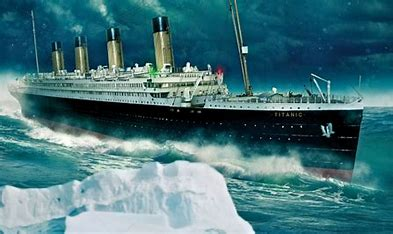

The Titanic Survival Prediction Project involves creating a model to predict the likelihood of passengers surviving the Titanic disaster based on various features such as age, gender, class and others. The goal is to leverage historical data to train a predictive model that can accurately classify whether a given passenger survived or not, using algorithms such as linear regression and random forests.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv("titanic_train.csv")

In [ ]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df = df.drop('Cabin',axis = 1)

In [ ]:
df = df.drop(['PassengerId','Ticket','Name'],axis = 1)

In [ ]:
df

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
print(object_columns)
print(numerical_columns)

['Sex', 'Embarked']
['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


IMPUTATION OF NULL VALUES

In [ ]:
for feature in numerical_columns:
    df[feature].fillna(df[feature].mean(), inplace=True)
for feature in object_columns:
    df[feature].fillna(df[feature].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df.info

<bound method DataFrame.info of      Survived  Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.000000      1      0   7.2500        S
1           1       1  female  38.000000      1      0  71.2833        C
2           1       3  female  26.000000      0      0   7.9250        S
3           1       1  female  35.000000      1      0  53.1000        S
4           0       3    male  35.000000      0      0   8.0500        S
..        ...     ...     ...        ...    ...    ...      ...      ...
886         0       2    male  27.000000      0      0  13.0000        S
887         1       1  female  19.000000      0      0  30.0000        S
888         0       3  female  29.699118      1      2  23.4500        S
889         1       1    male  26.000000      0      0  30.0000        C
890         0       3    male  32.000000      0      0   7.7500        Q

[891 rows x 8 columns]>

In [ ]:
df.describe

<bound method NDFrame.describe of      Survived  Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.000000      1      0   7.2500        S
1           1       1  female  38.000000      1      0  71.2833        C
2           1       3  female  26.000000      0      0   7.9250        S
3           1       1  female  35.000000      1      0  53.1000        S
4           0       3    male  35.000000      0      0   8.0500        S
..        ...     ...     ...        ...    ...    ...      ...      ...
886         0       2    male  27.000000      0      0  13.0000        S
887         1       1  female  19.000000      0      0  30.0000        S
888         0       3  female  29.699118      1      2  23.4500        S
889         1       1    male  26.000000      0      0  30.0000        C
890         0       3    male  32.000000      0      0   7.7500        Q

[891 rows x 8 columns]>

In [ ]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [ ]:
for i in object_columns:
  print(i)
  print(df[i].value_counts())
  print("\n")

Sex
male      577
female    314
Name: Sex, dtype: int64


Embarked
S    646
C    168
Q     77
Name: Embarked, dtype: int64




COUNT PLOT

Countplot for: Sex


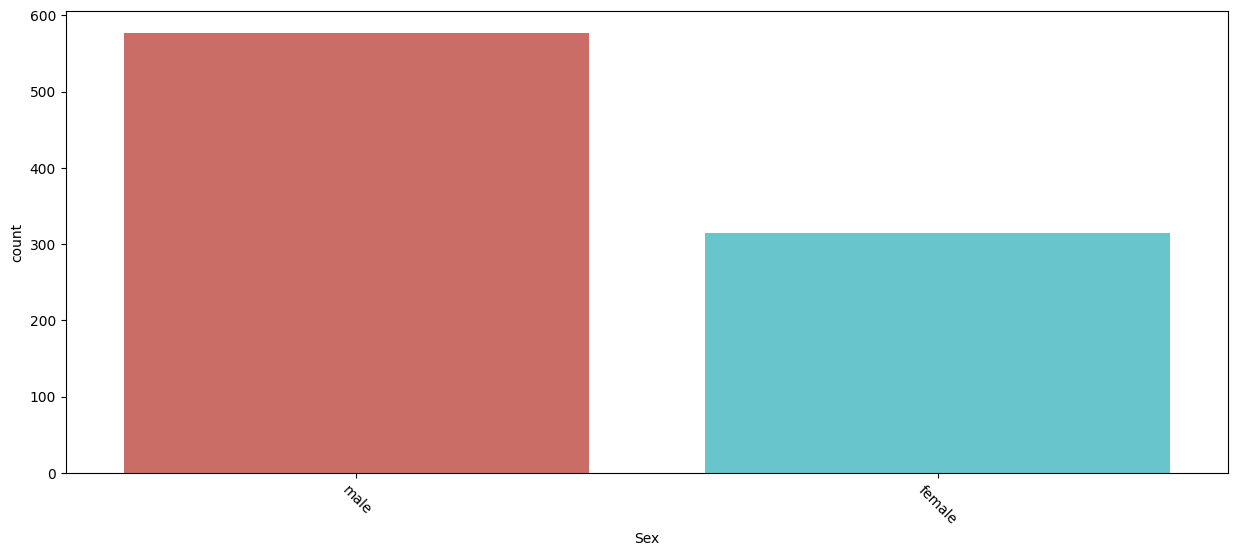



Countplot for: Embarked


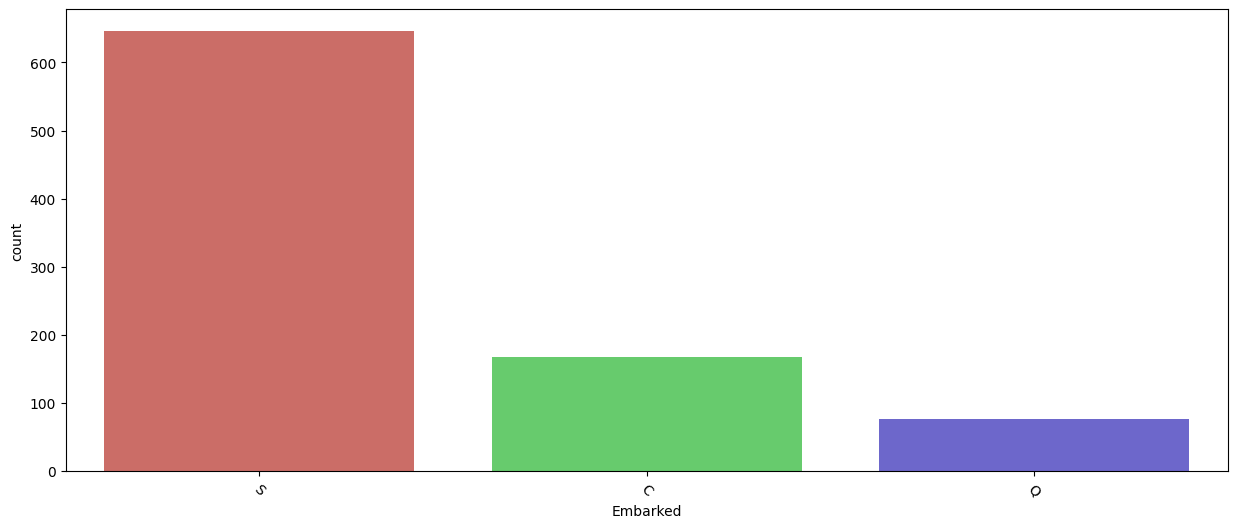

In [ ]:
for i in object_columns:
    print('Countplot for:', i)
    plt.figure(figsize=(15, 6))
    sns.countplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=-45)
    plt.show()
    print('\n')


PIE PLOT

Pieplot for: Sex


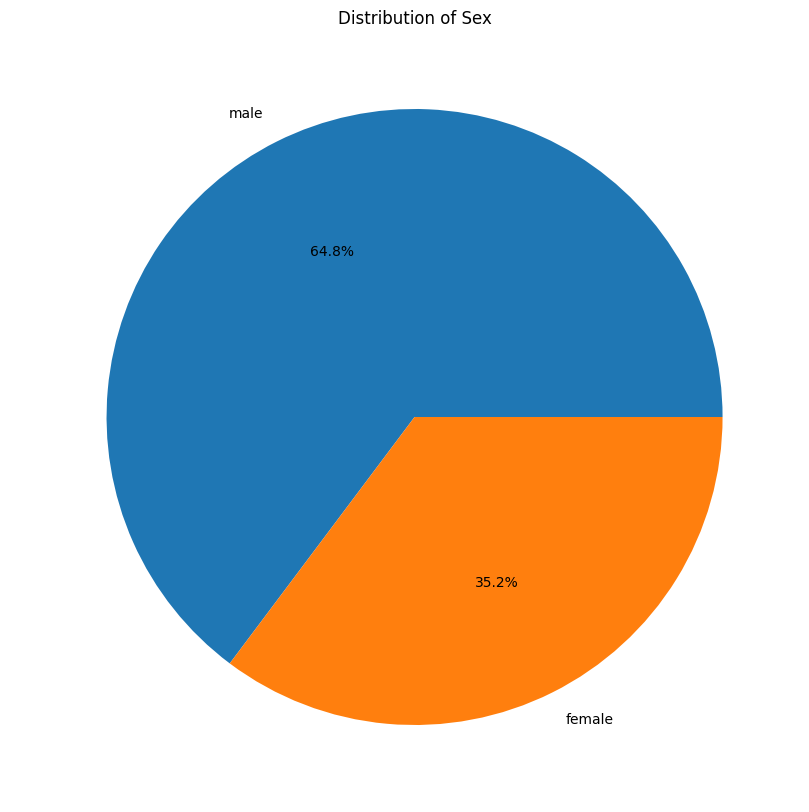



Pieplot for: Embarked


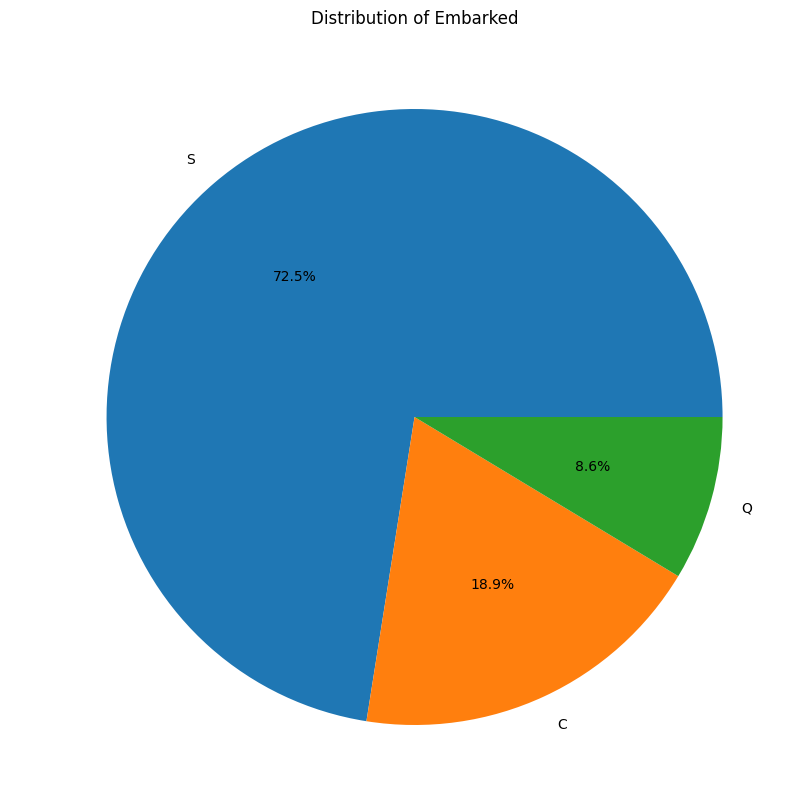

In [ ]:
for i in object_columns:
    print('Pieplot for:', i)
    plt.figure(figsize=(20, 10))
    df[i].value_counts().plot(kind = 'pie', autopct = "%1.1f%%" )
    plt.title('Distribution of ' + i)
    plt.ylabel(' ')
    plt.show()
    print('\n')

In [ ]:
for i in object_columns:
  fig = go.Figure(data = [go.Bar(x = df[i].value_counts().index, y = df[i].value_counts() )])
  fig.update_layout(
      title = i,
      xaxis_title = i,
      yaxis_title = "count")
  fig.show()

In [ ]:
for i in object_columns:
  print('pie plot for: ', i)
  fig = px.pie(df,names = i, title = 'Distribution of' + i)
  fig.show()

pie plot for:  Sex


pie plot for:  Embarked


HIST PLOT

<ipython-input-27-cc7a23520235>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



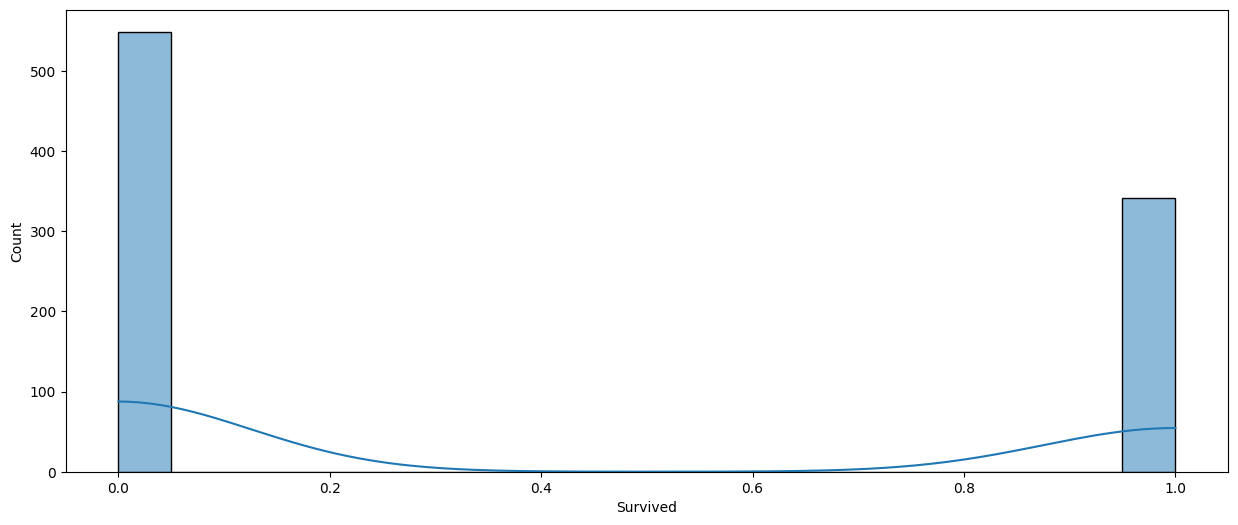

<ipython-input-27-cc7a23520235>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



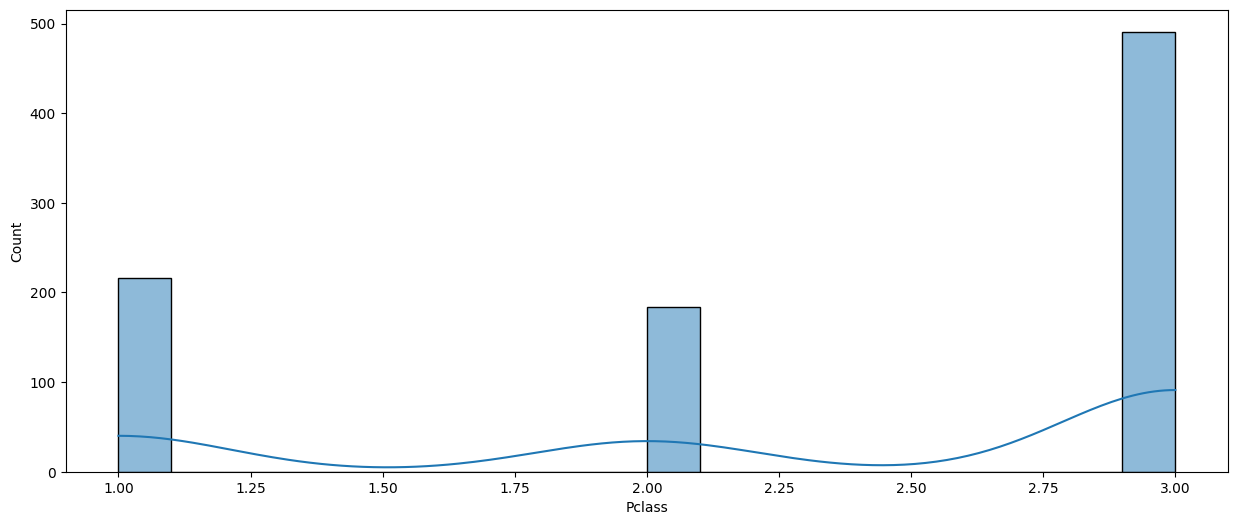

<ipython-input-27-cc7a23520235>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



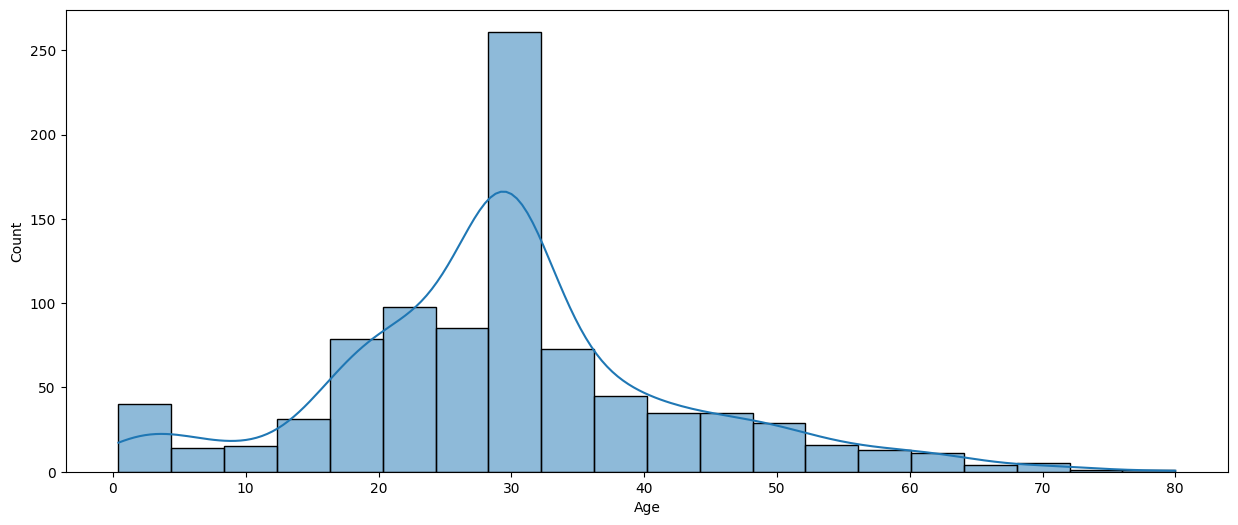

<ipython-input-27-cc7a23520235>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



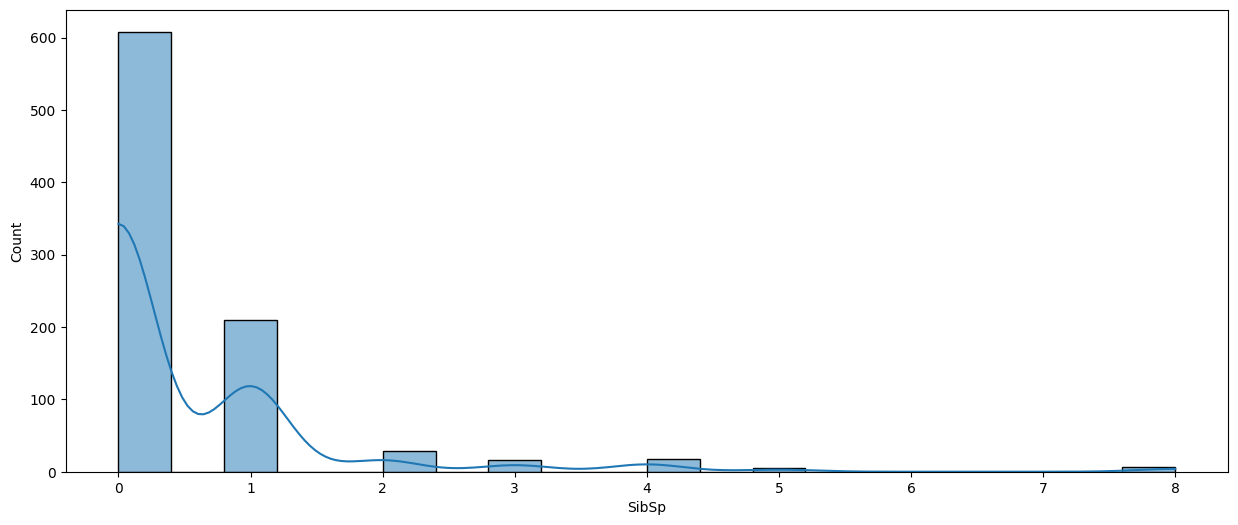

<ipython-input-27-cc7a23520235>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



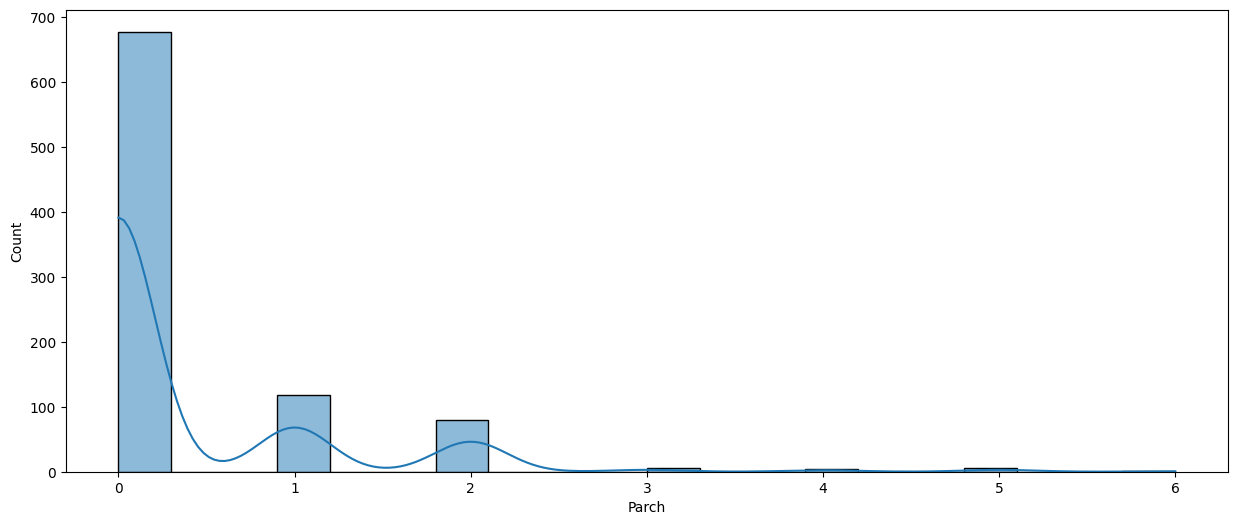

<ipython-input-27-cc7a23520235>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



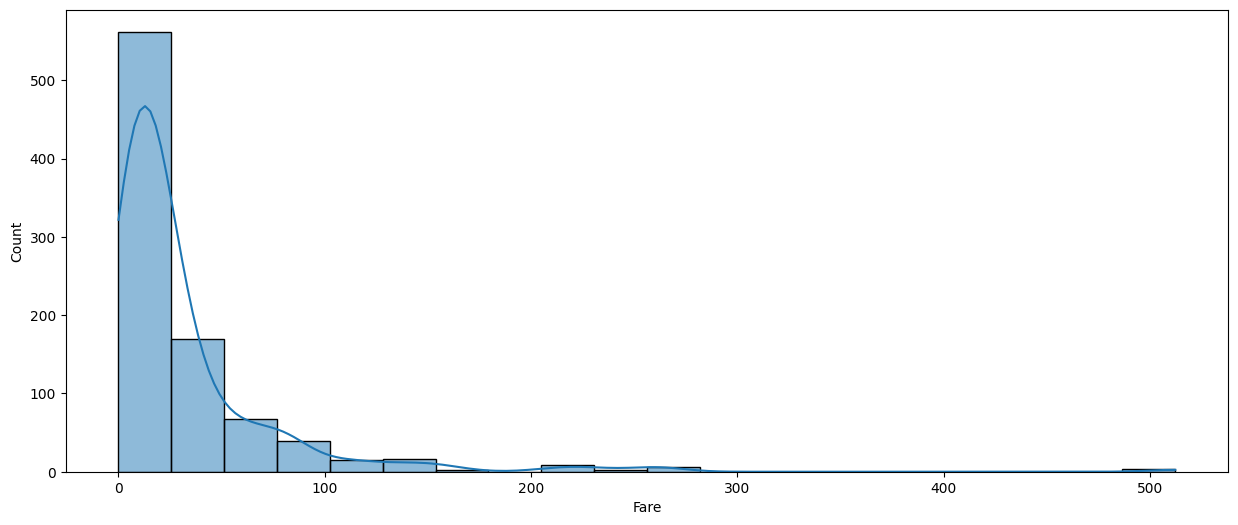

In [ ]:
for i in numerical_columns:
  plt.figure(figsize =(15,6))
  sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
  plt.xticks(rotation = 0)
  plt.show()

DIST PLOT

<ipython-input-28-224e527167b7>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




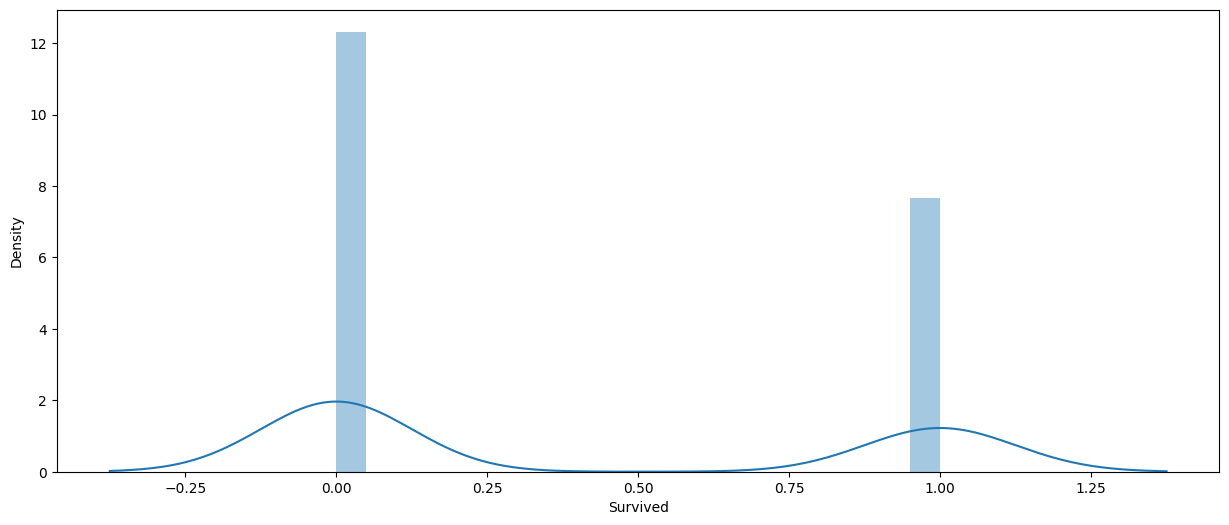

<ipython-input-28-224e527167b7>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




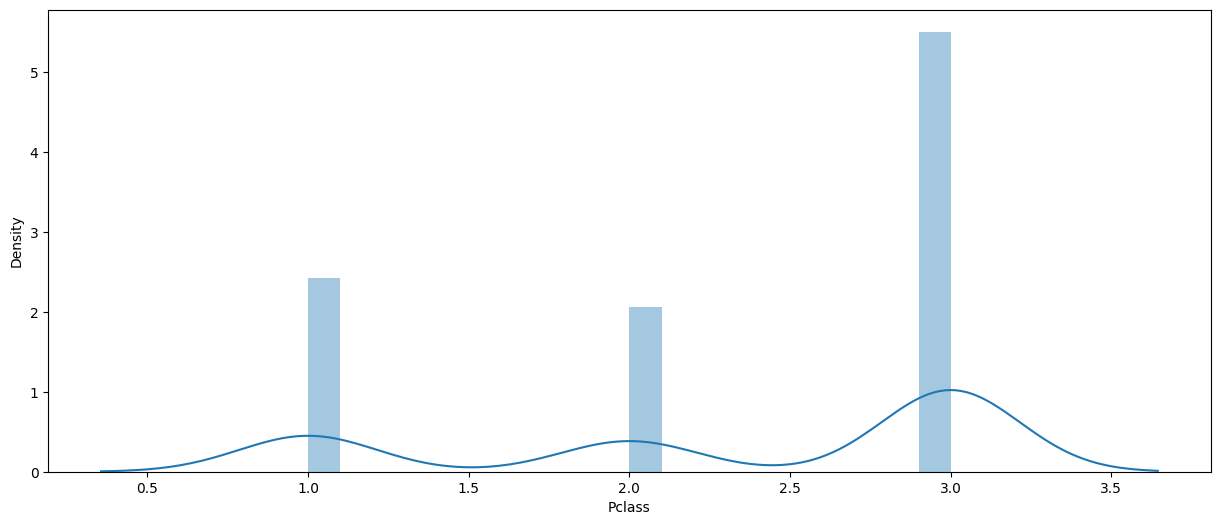

<ipython-input-28-224e527167b7>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




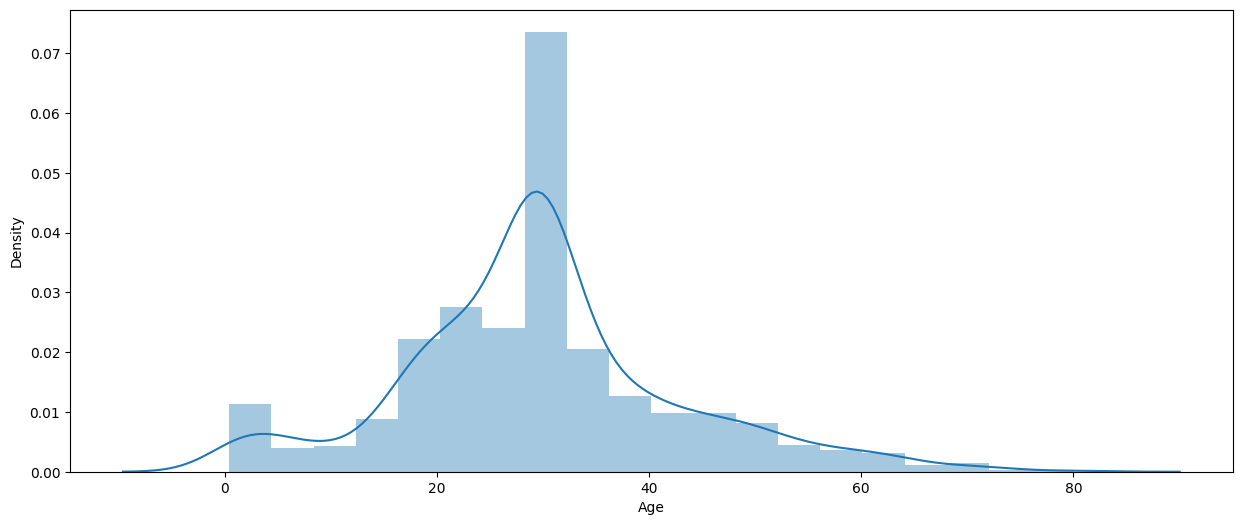

<ipython-input-28-224e527167b7>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




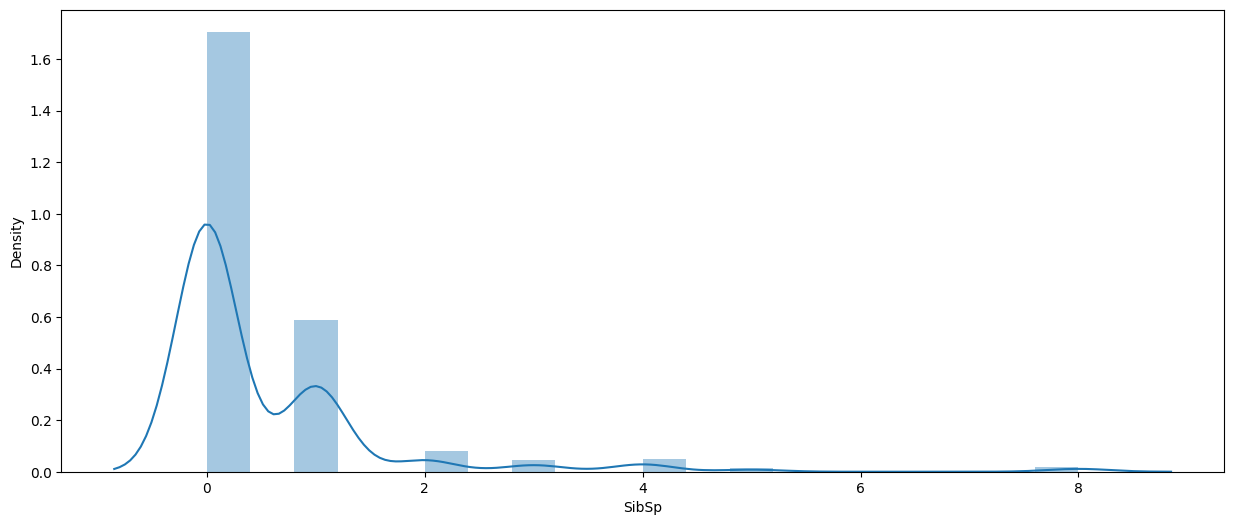

<ipython-input-28-224e527167b7>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




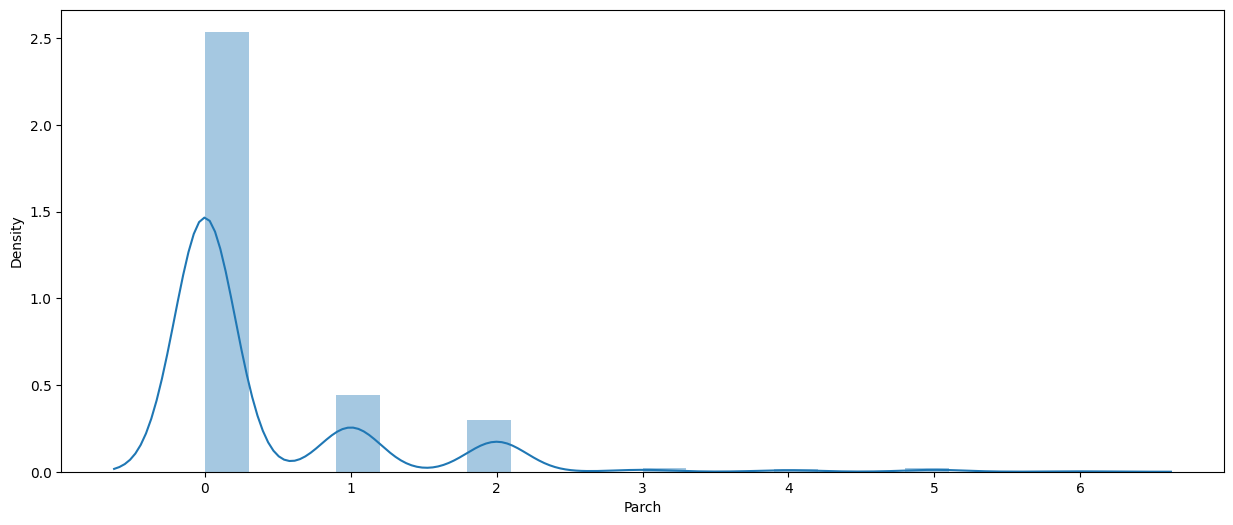

<ipython-input-28-224e527167b7>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




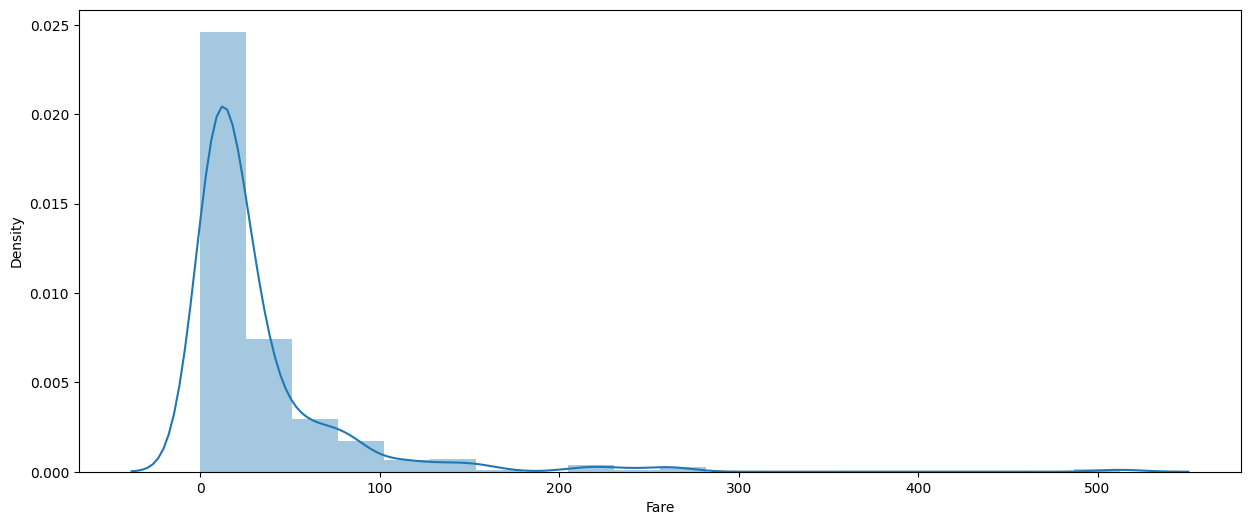

In [ ]:
for i in numerical_columns:
  plt.figure(figsize =(15,6))
  sns.distplot(df[i], kde = True, bins = 20)
  plt.xticks(rotation = 0)
  plt.show()

BOX PLOT

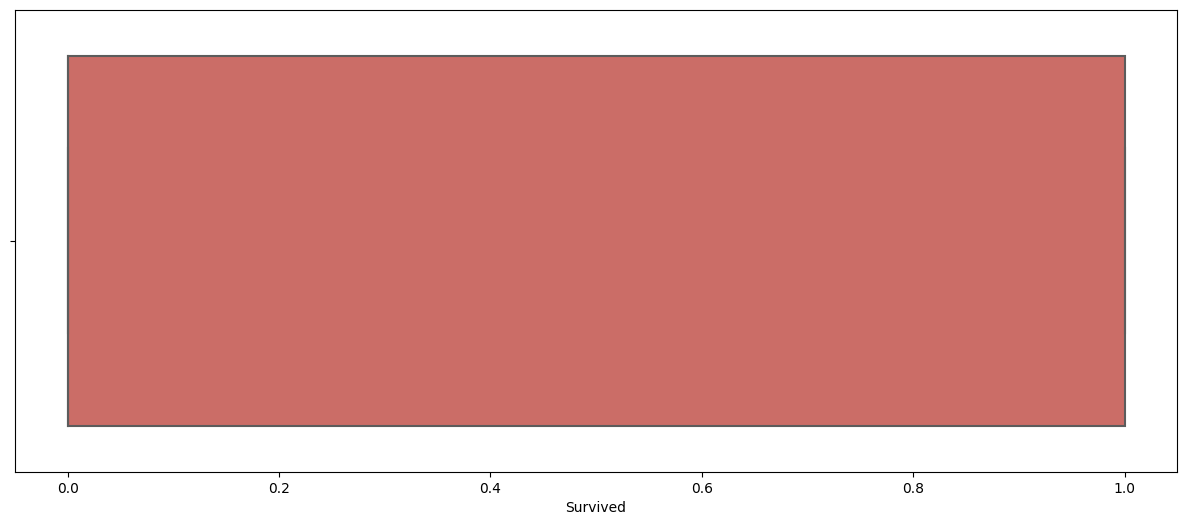

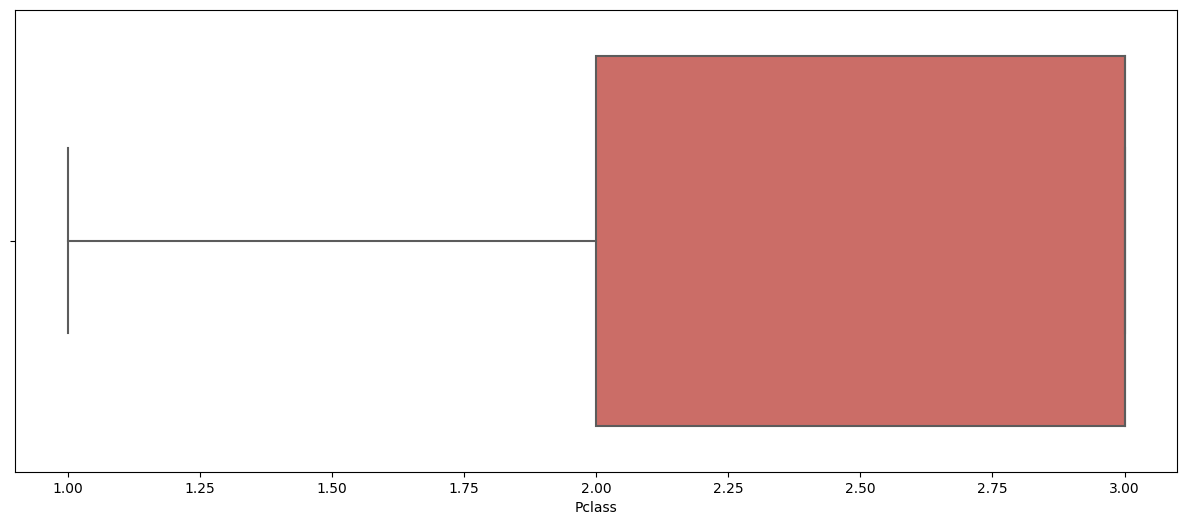

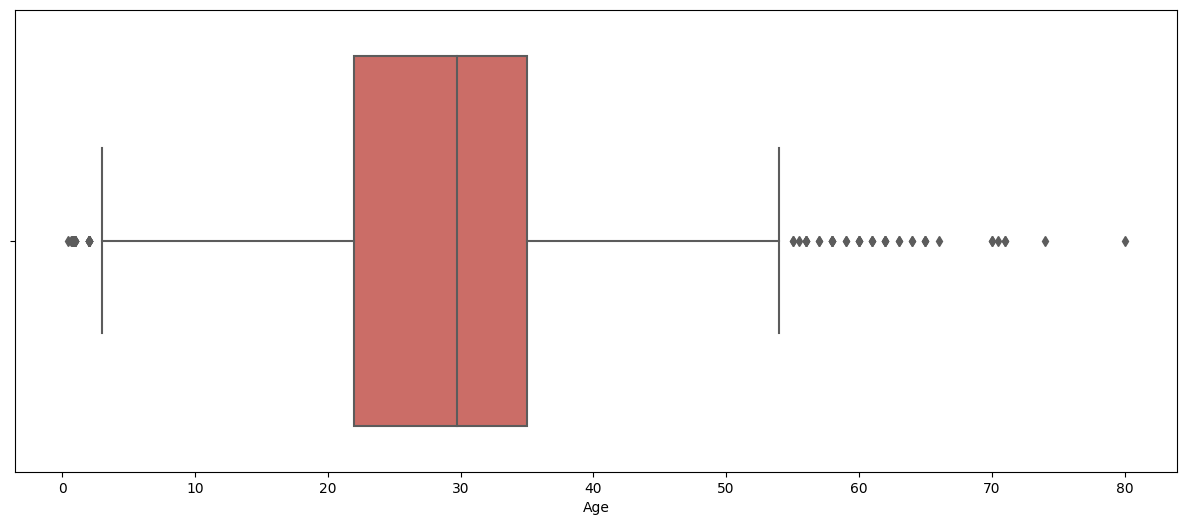

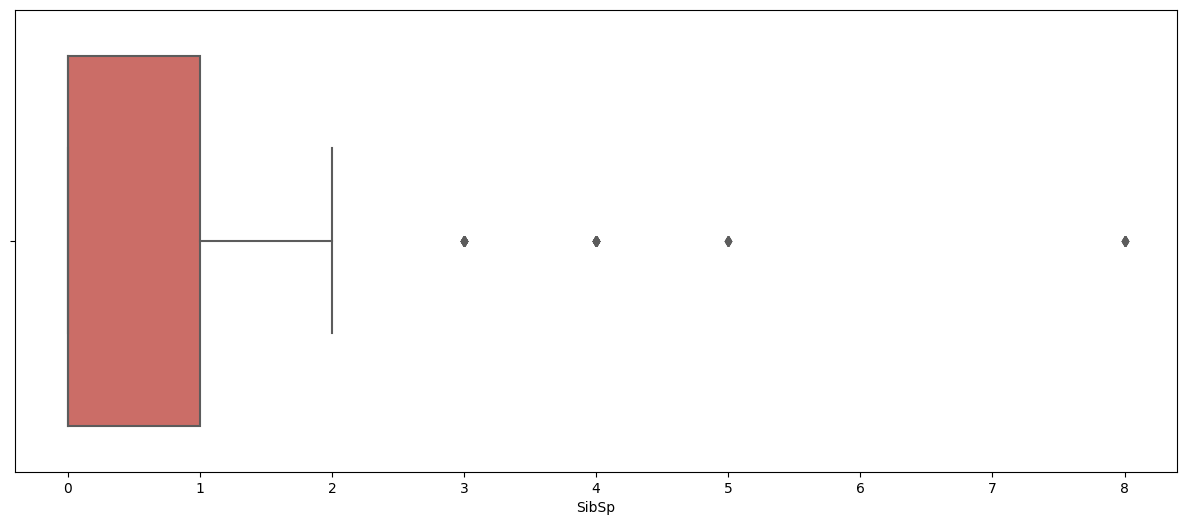

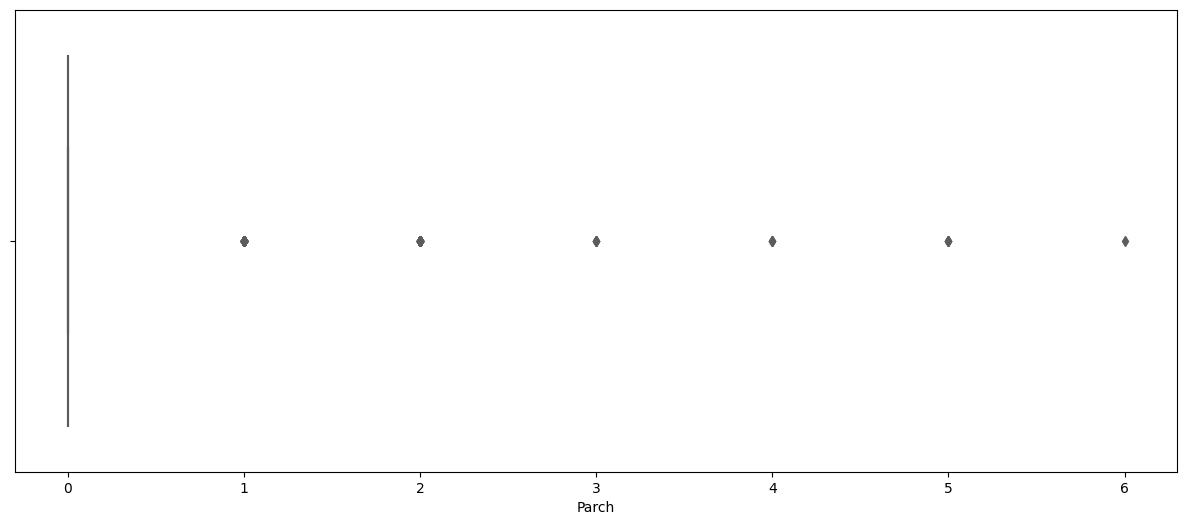

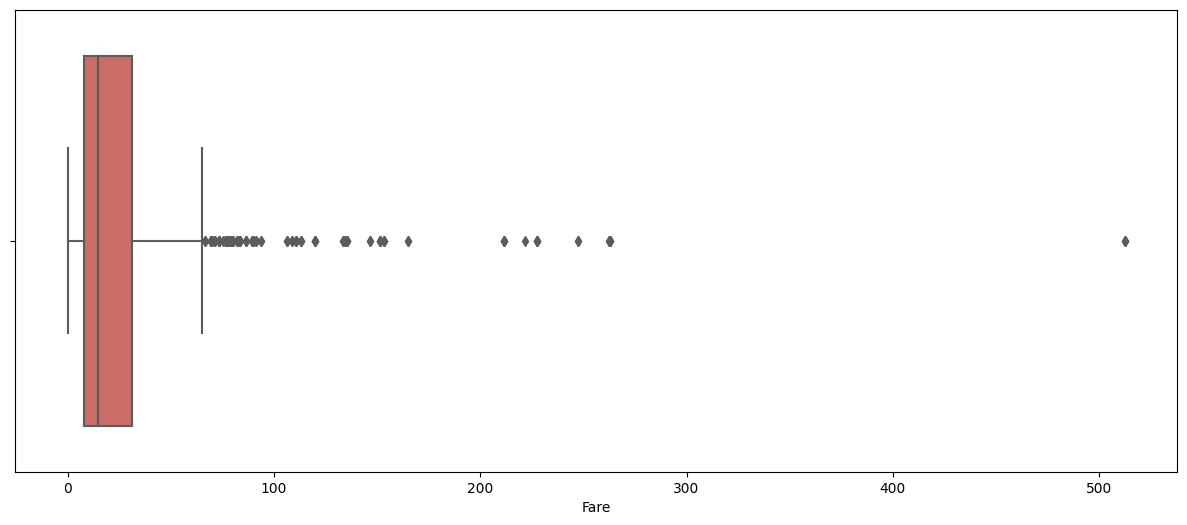

In [ ]:
for i in numerical_columns:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=0)
    plt.show()

VIOLIN PLOT

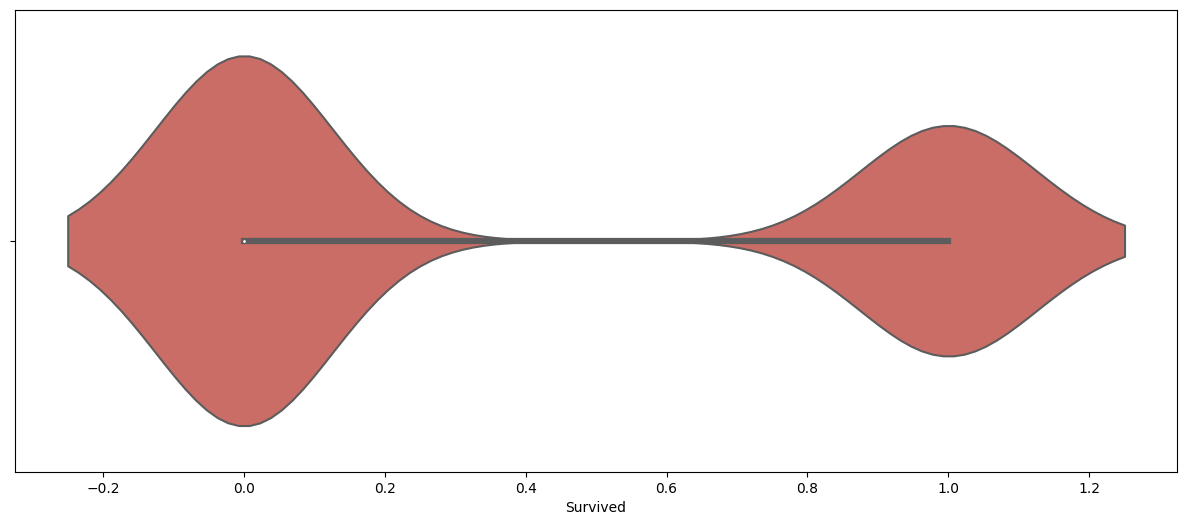

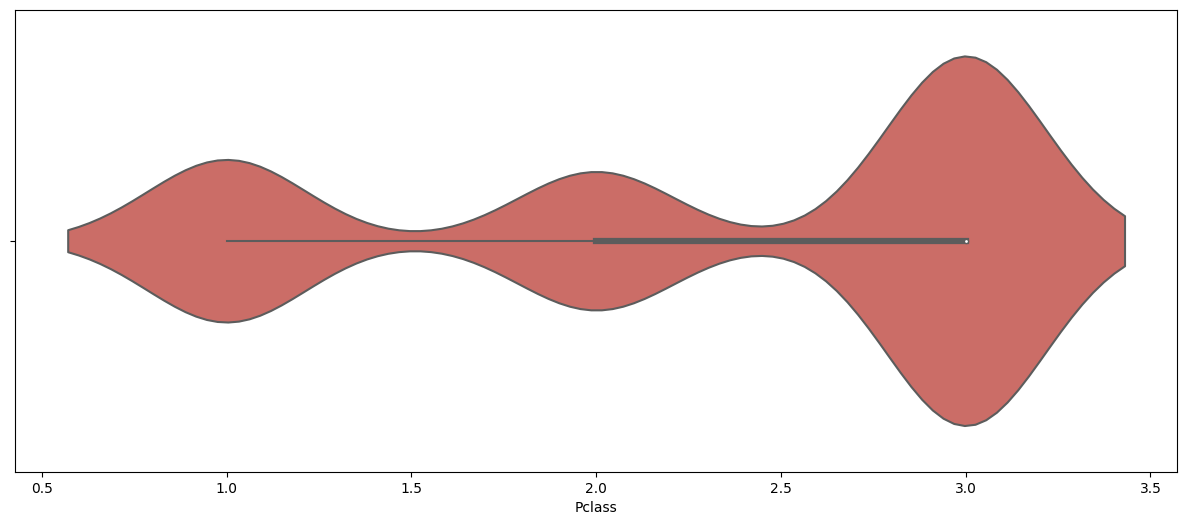

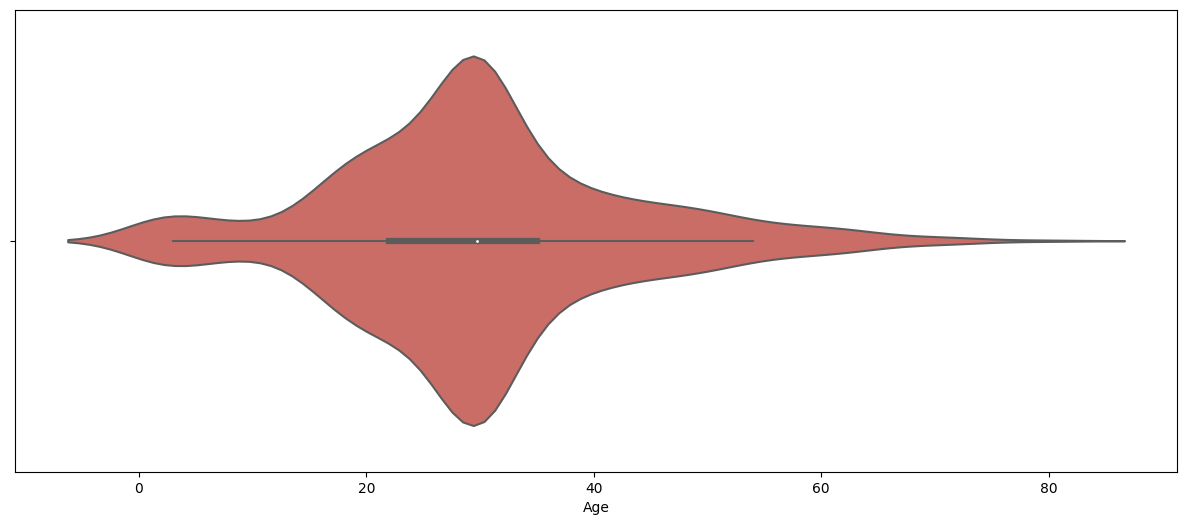

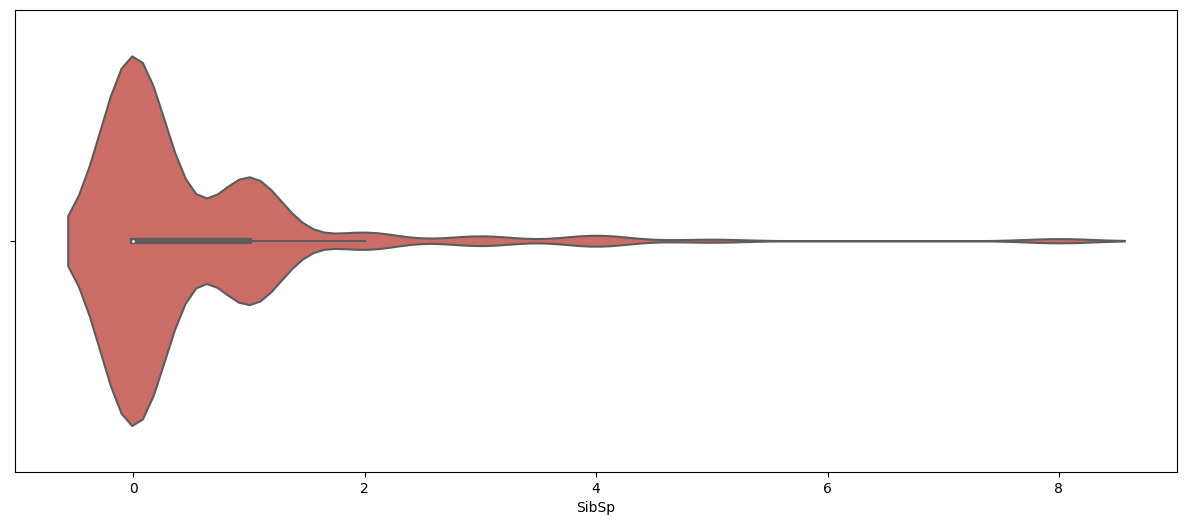

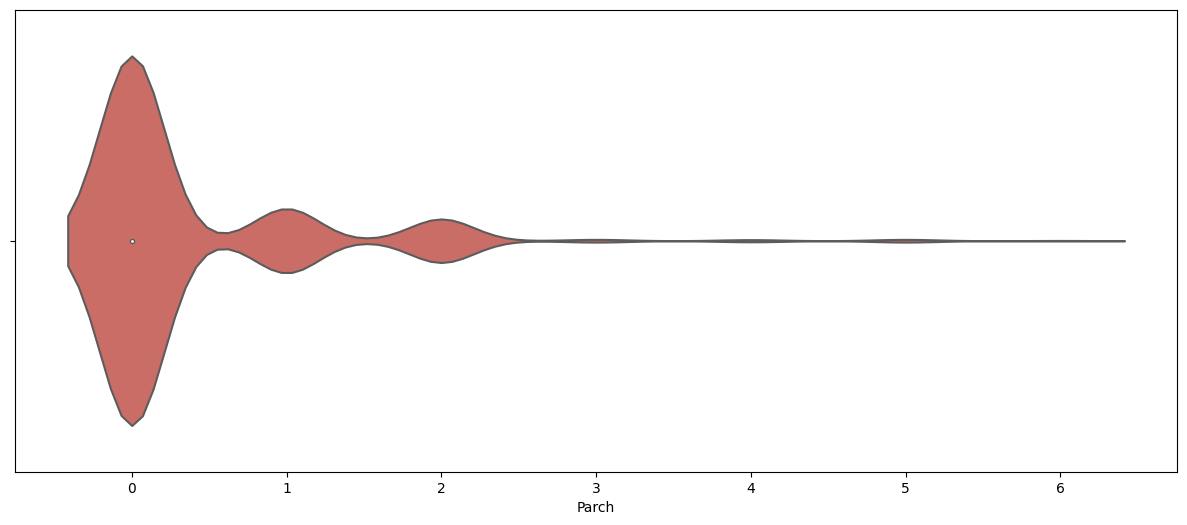

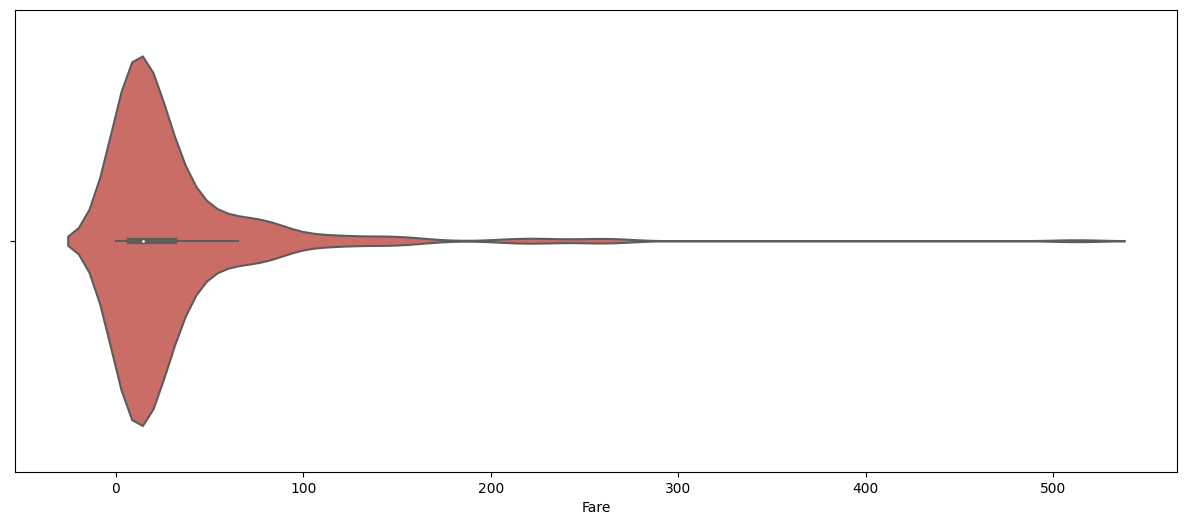

In [ ]:
for i in numerical_columns:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=0)
    plt.show()

HIST PLOT

In [ ]:
for i in numerical_columns:
    fig = go.Figure(data=[go.Histogram(x=df[i], nbinsx=20)])
    fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Count"
    )
    fig.show()

In [ ]:
for i in numerical_columns:
    fig = go.Figure(data=[go.Box(x=df[i])])
    fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Count"
    )
    fig.show()

In [ ]:
for i in numerical_columns:
    fig = go.Figure(data=[go.Violin(x=df[i])])
    fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Count"
    )
    fig.show()

BIVARIATE BARPLOT

<ipython-input-34-73a6fe3d2935>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




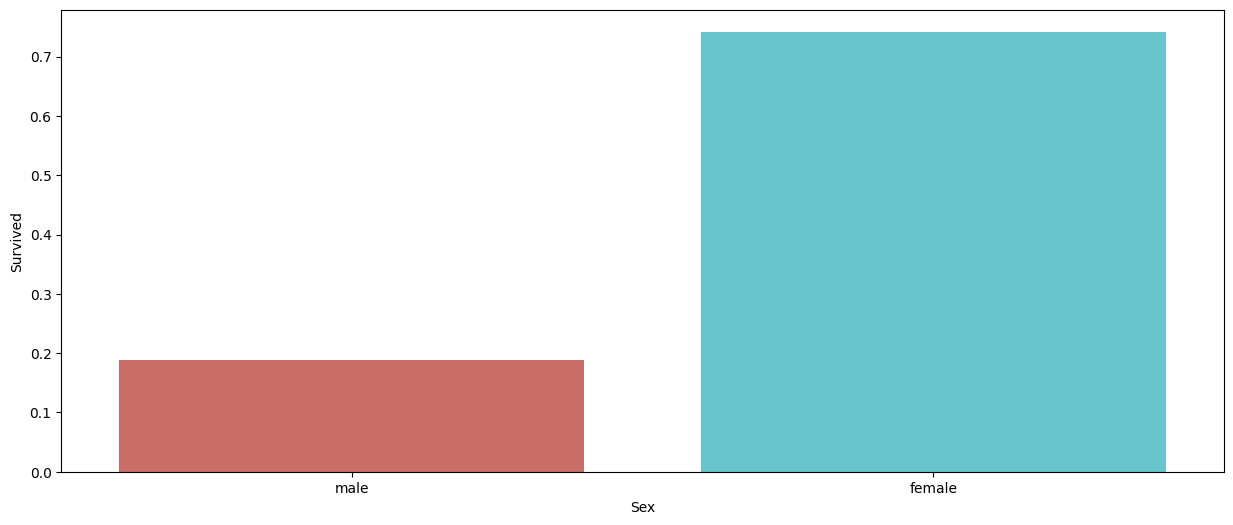

<ipython-input-34-73a6fe3d2935>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




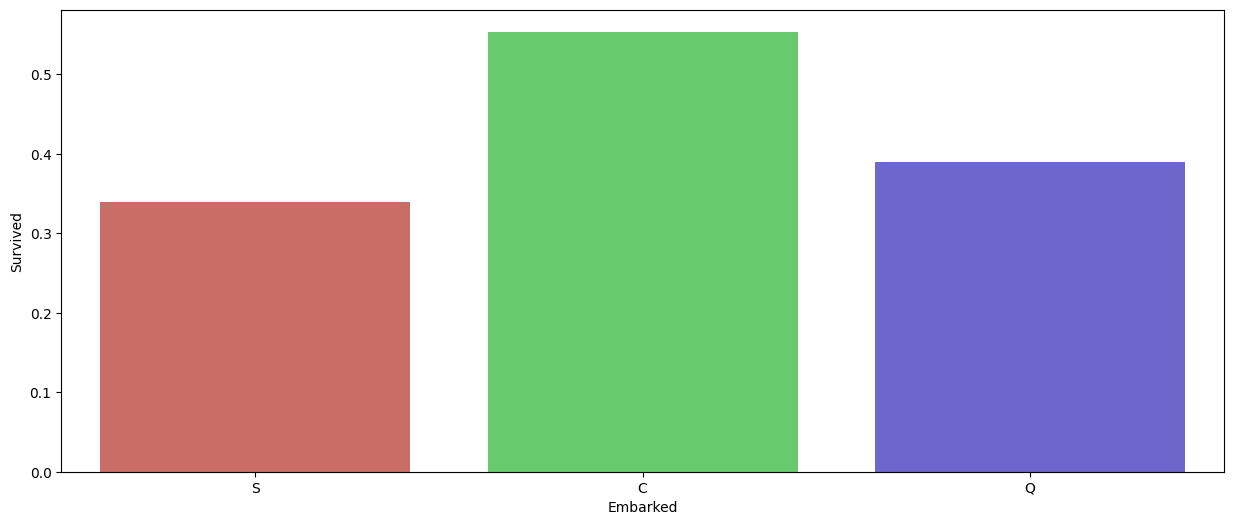

<ipython-input-34-73a6fe3d2935>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




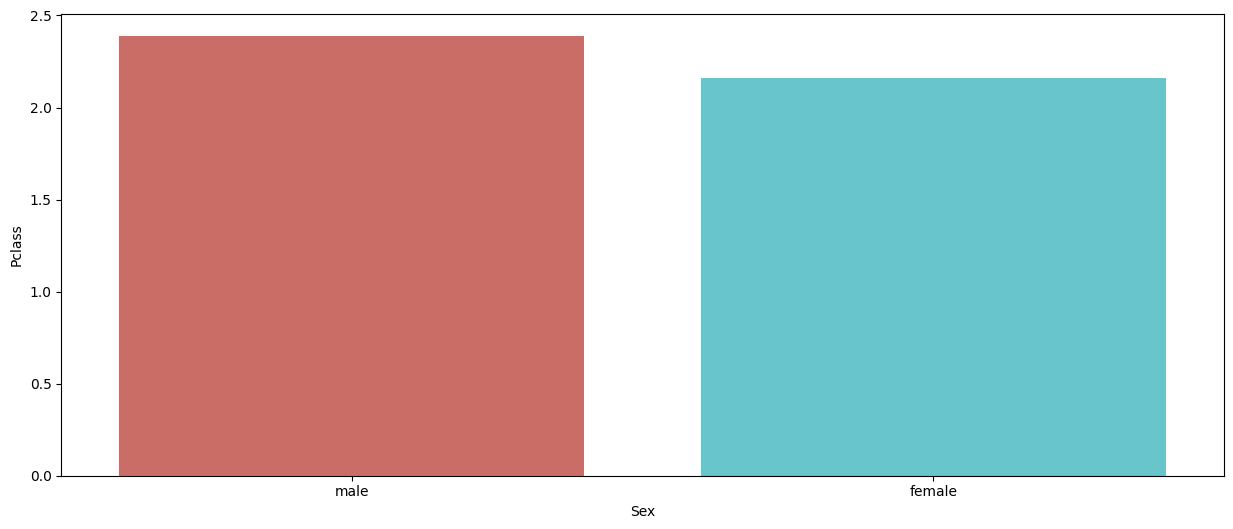

<ipython-input-34-73a6fe3d2935>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




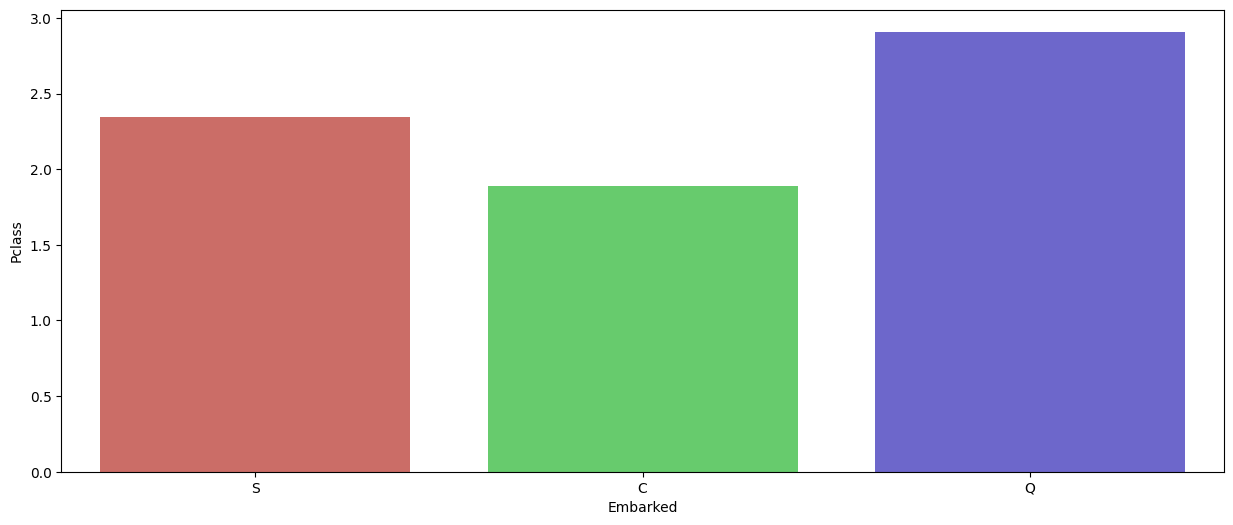

<ipython-input-34-73a6fe3d2935>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




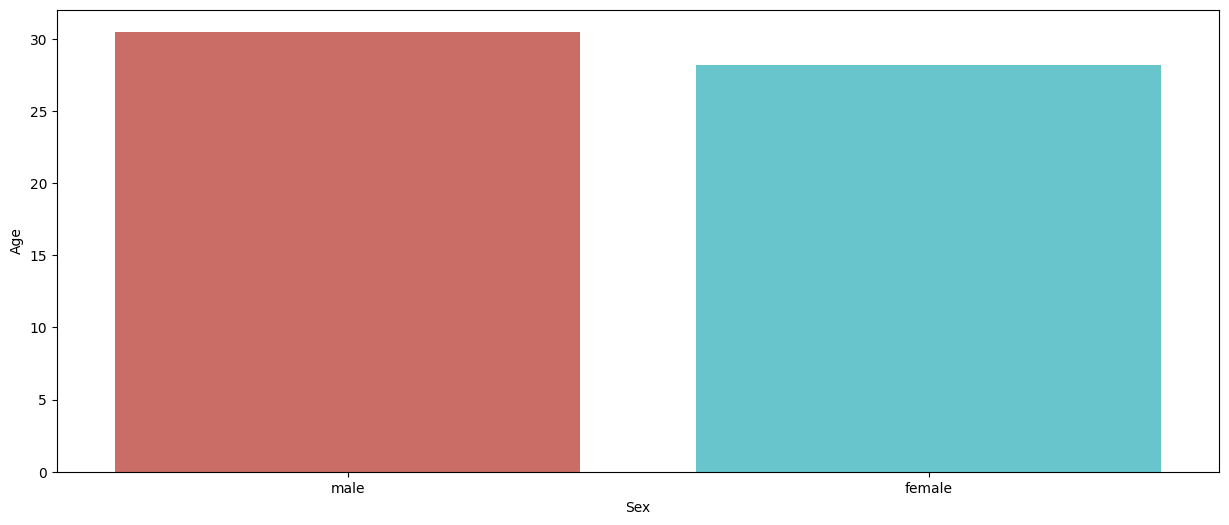

<ipython-input-34-73a6fe3d2935>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




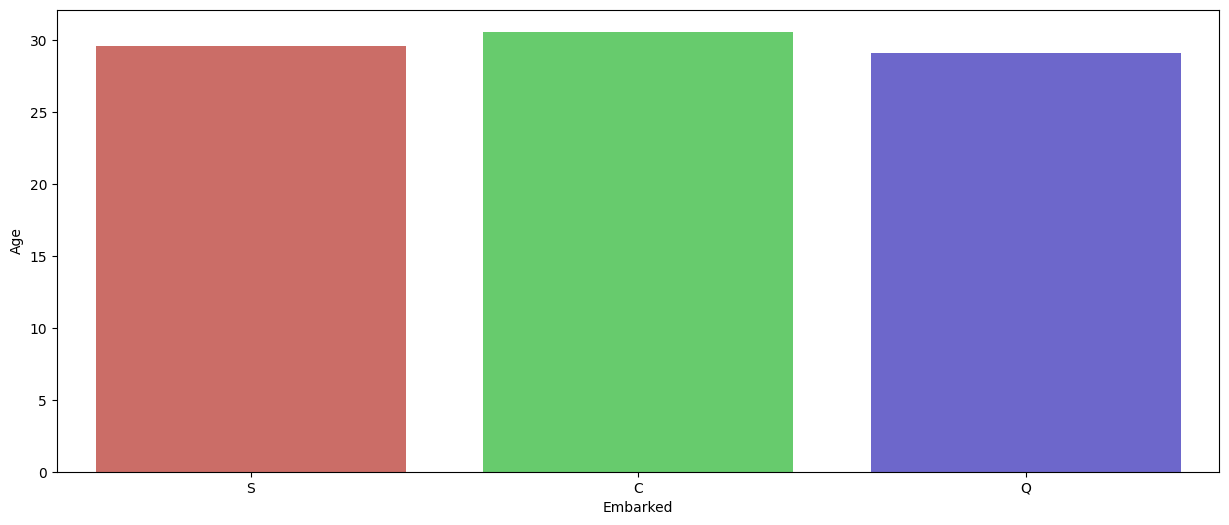

<ipython-input-34-73a6fe3d2935>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




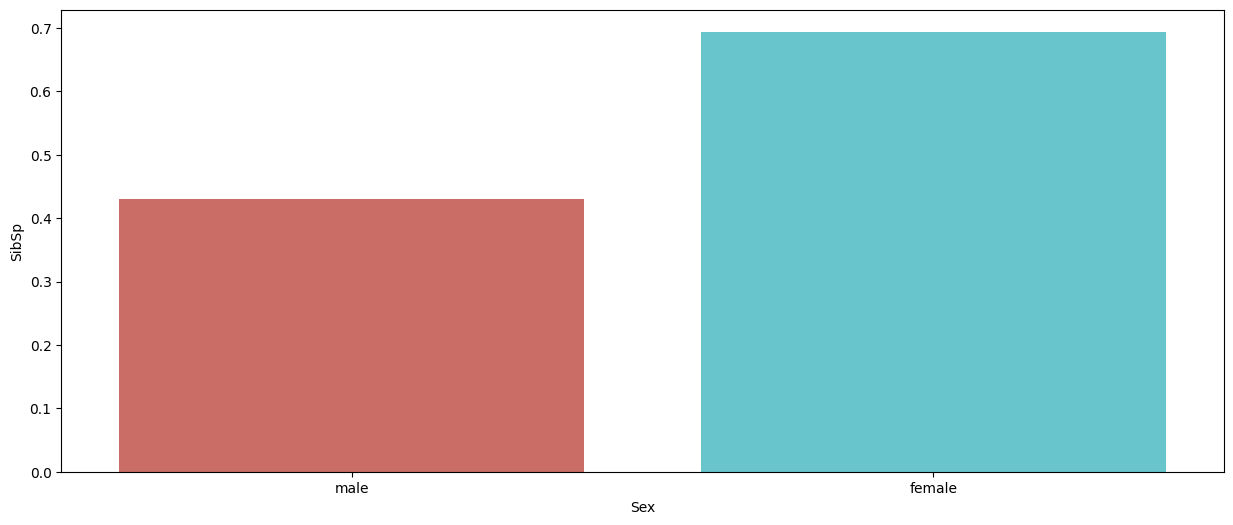

<ipython-input-34-73a6fe3d2935>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




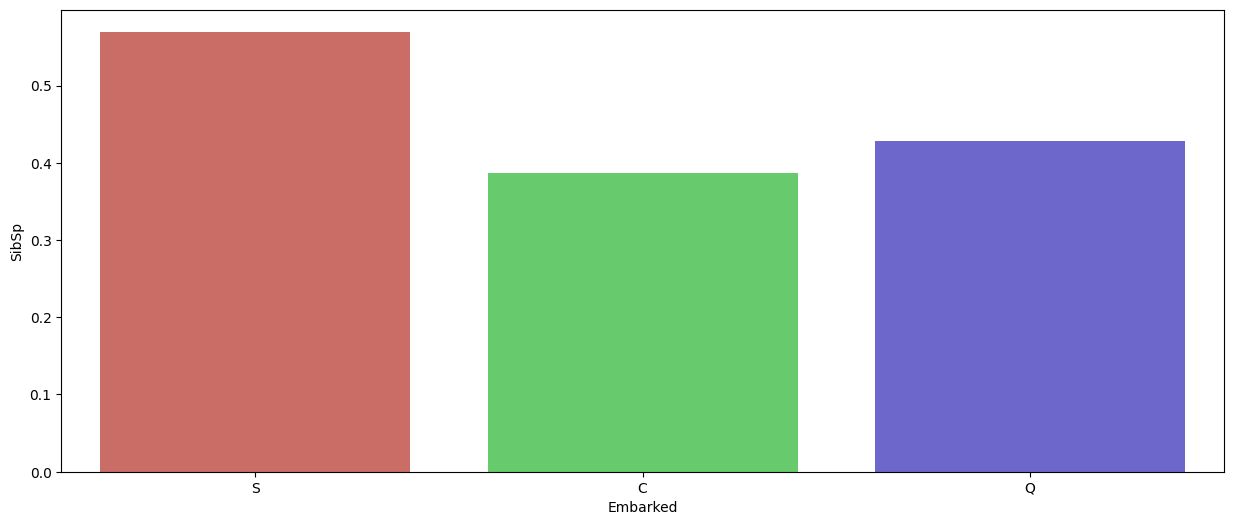

<ipython-input-34-73a6fe3d2935>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




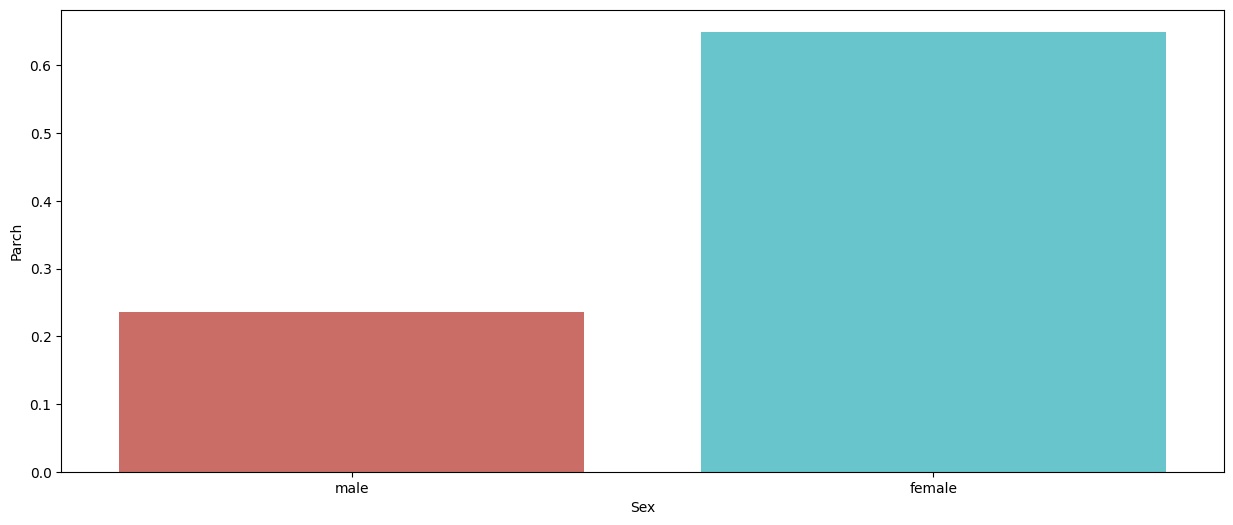

<ipython-input-34-73a6fe3d2935>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




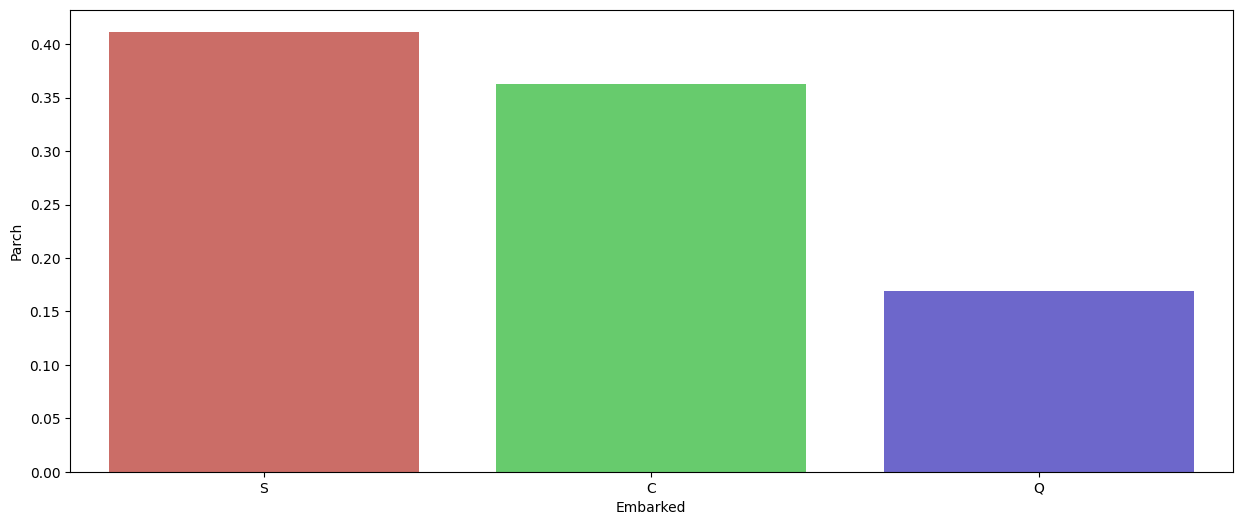

<ipython-input-34-73a6fe3d2935>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




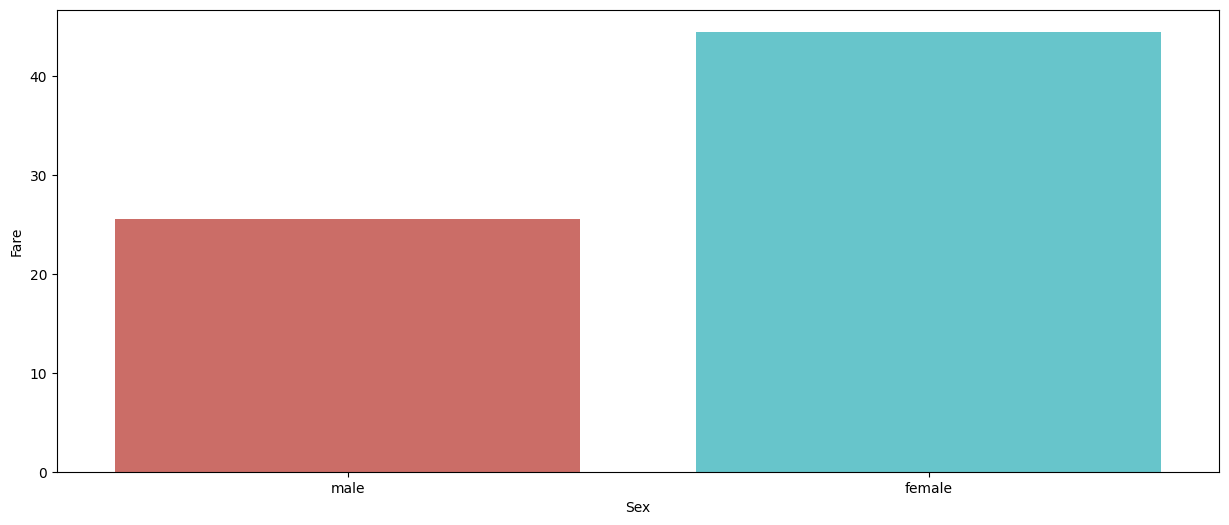

<ipython-input-34-73a6fe3d2935>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




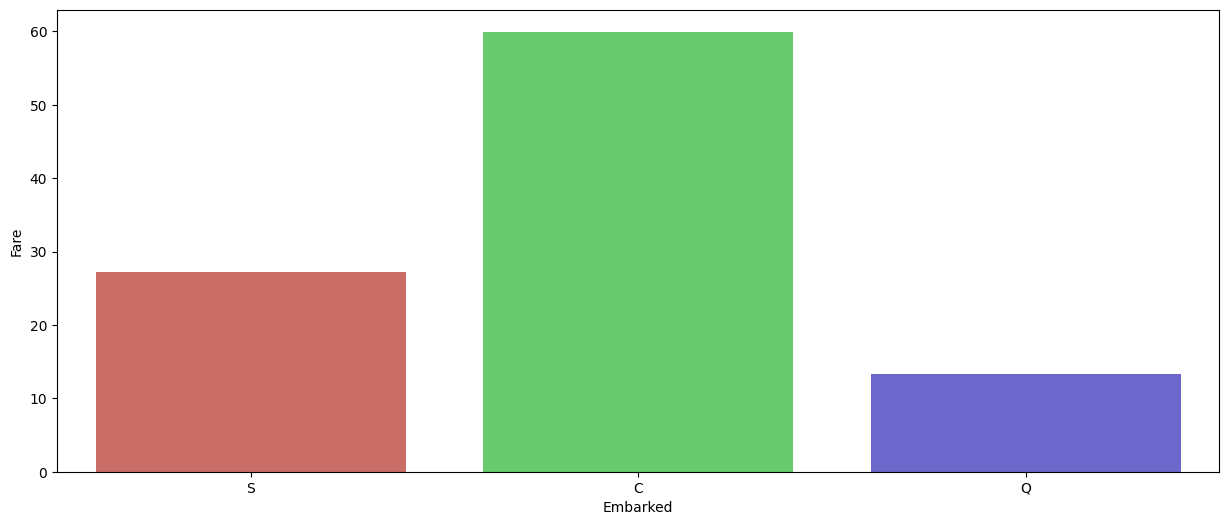

In [ ]:
for i in numerical_columns:
  for j in object_columns:
    plt.figure(figsize = (15,6))
    sns.barplot(x = df[j], y = df[i], data =df, ci = None, palette = 'hls')
    plt.show()

<ipython-input-35-209690ca2495>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




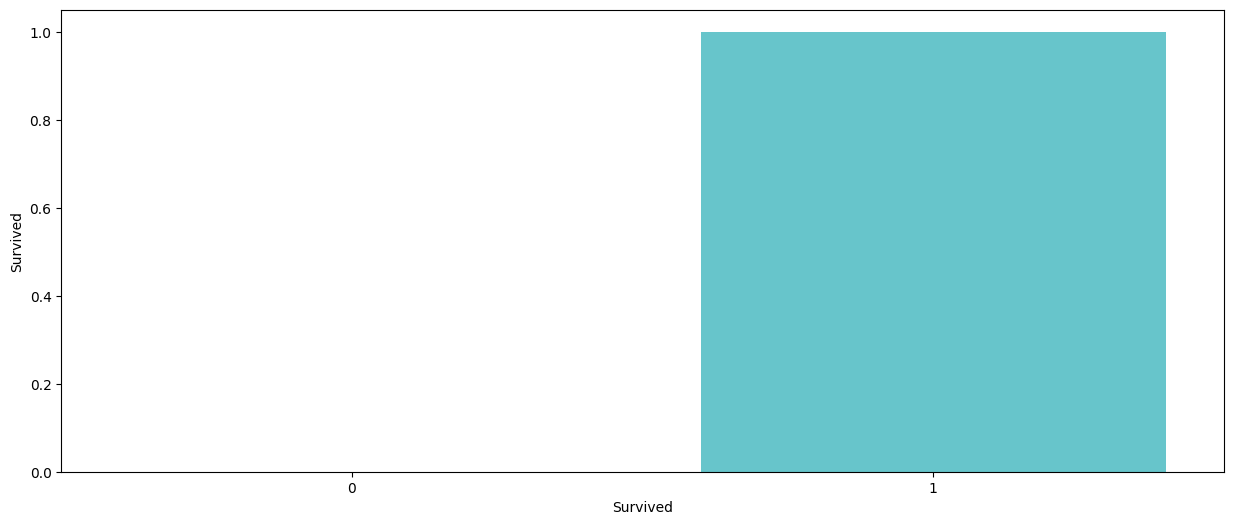

<ipython-input-35-209690ca2495>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




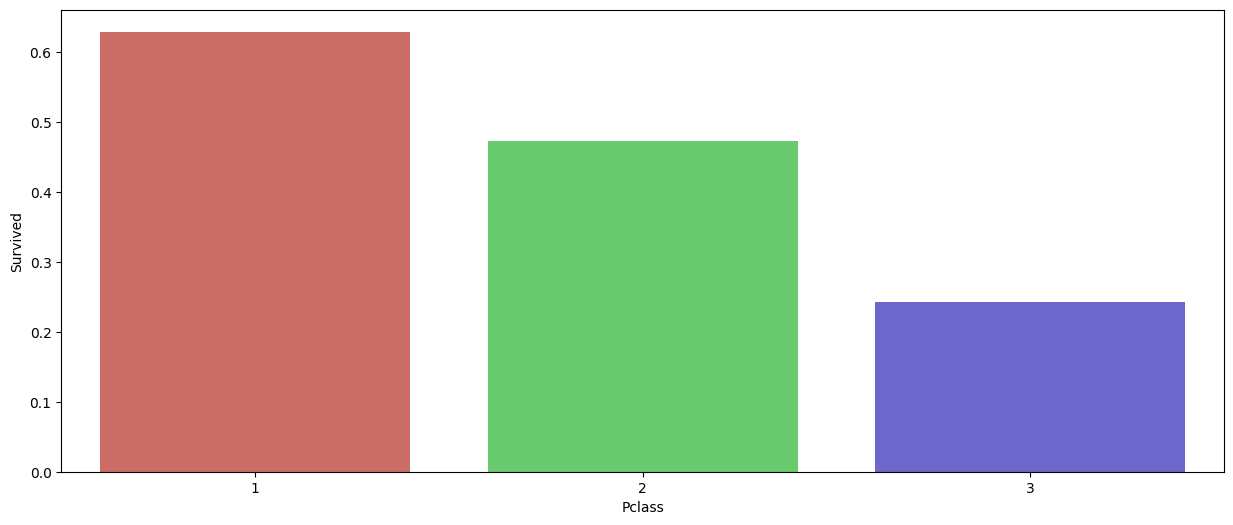

<ipython-input-35-209690ca2495>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




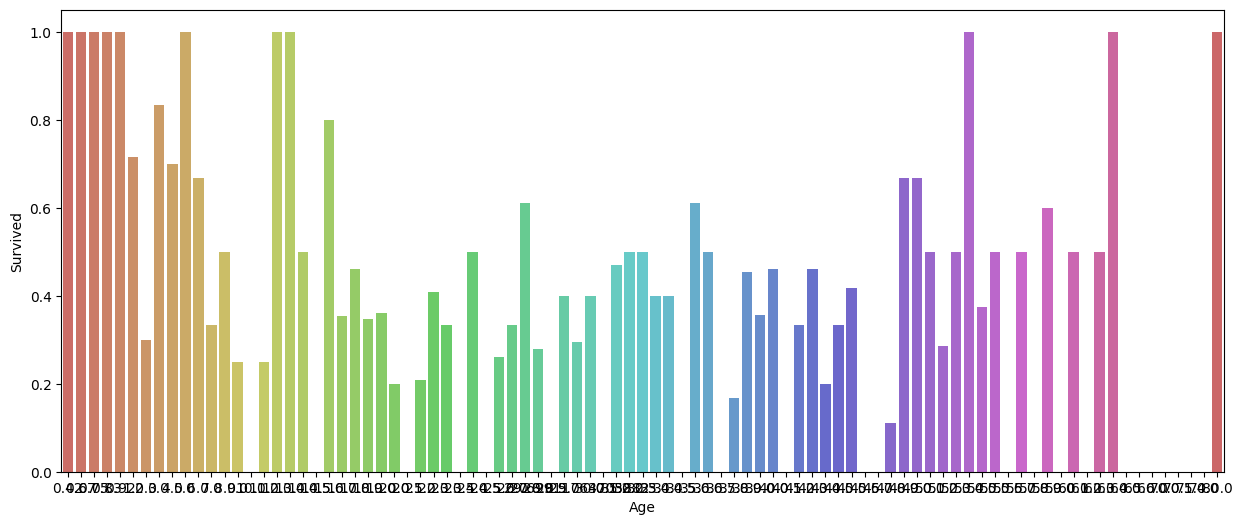

<ipython-input-35-209690ca2495>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




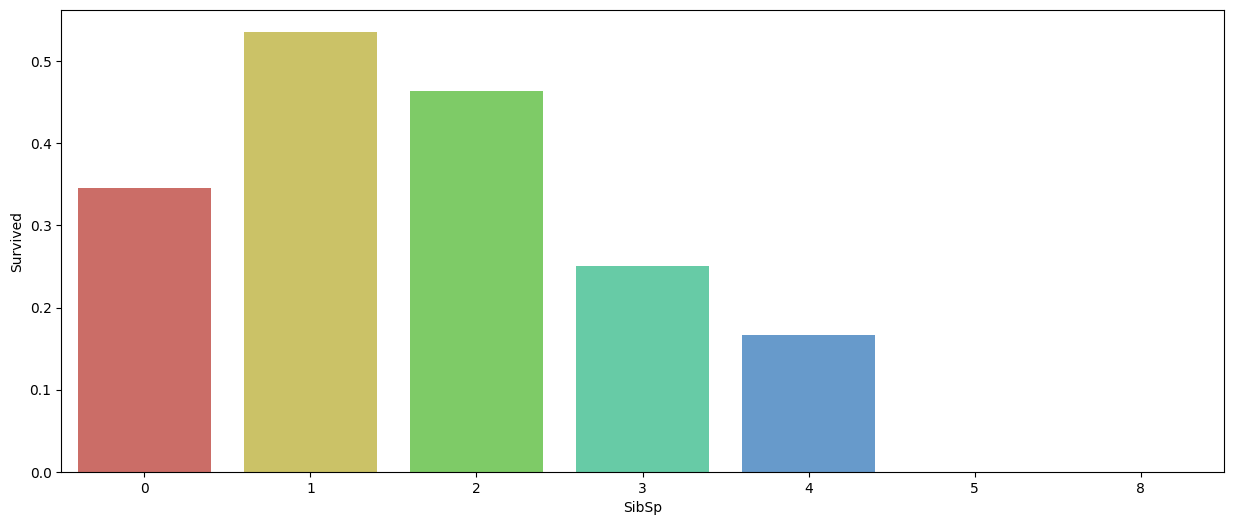

<ipython-input-35-209690ca2495>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




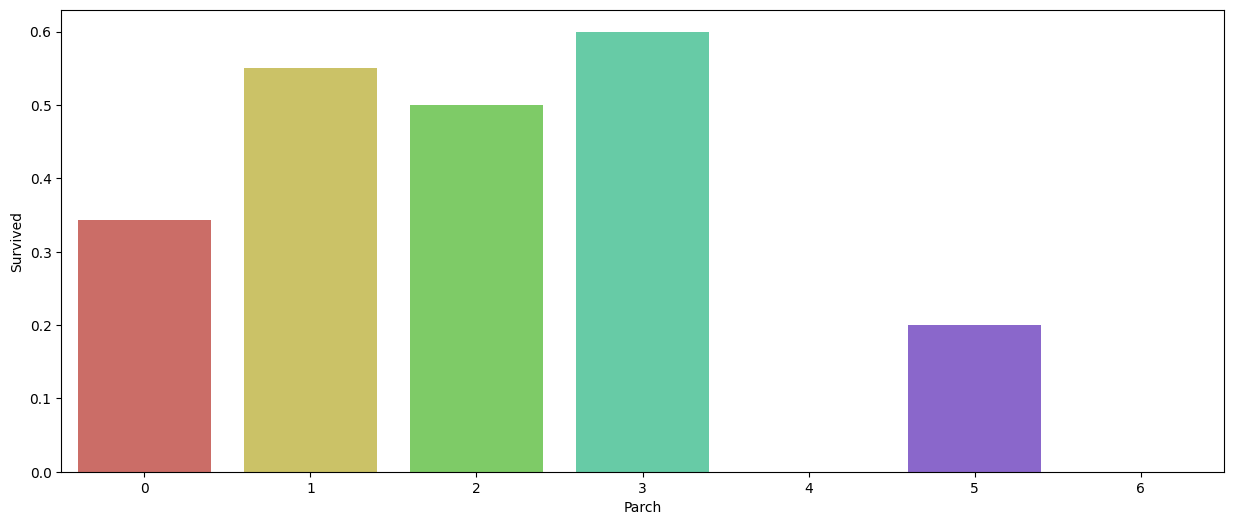

<ipython-input-35-209690ca2495>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




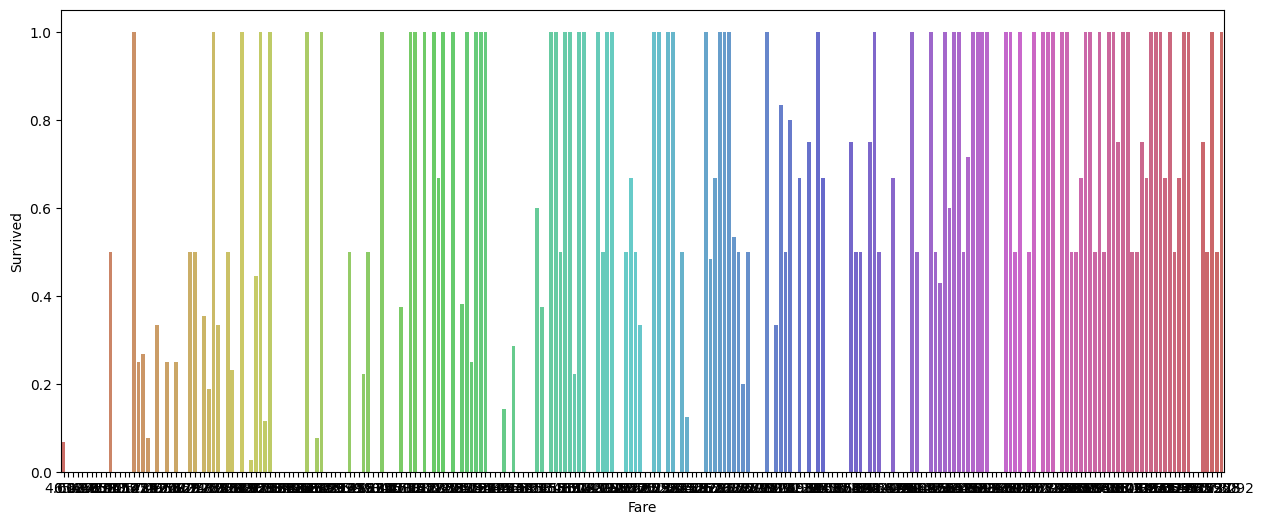

In [ ]:
for i in numerical_columns:
    plt.figure(figsize = (15,6))
    sns.barplot(x = df[i], y = df['Survived'], data =df, ci = None, palette = 'hls')
    plt.show()

BIVARIATE VIOLIN PLOT

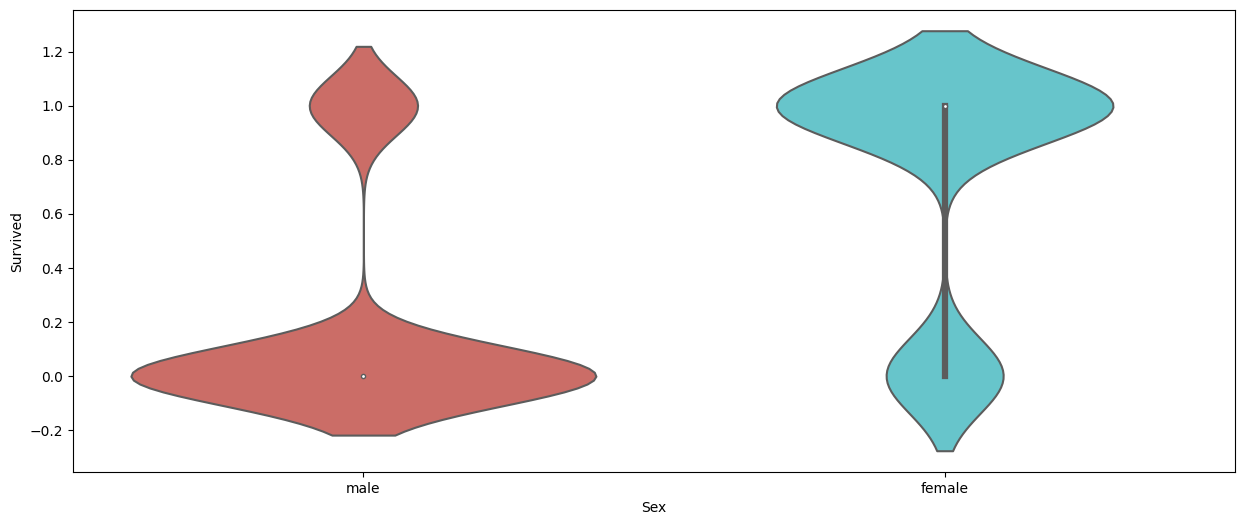

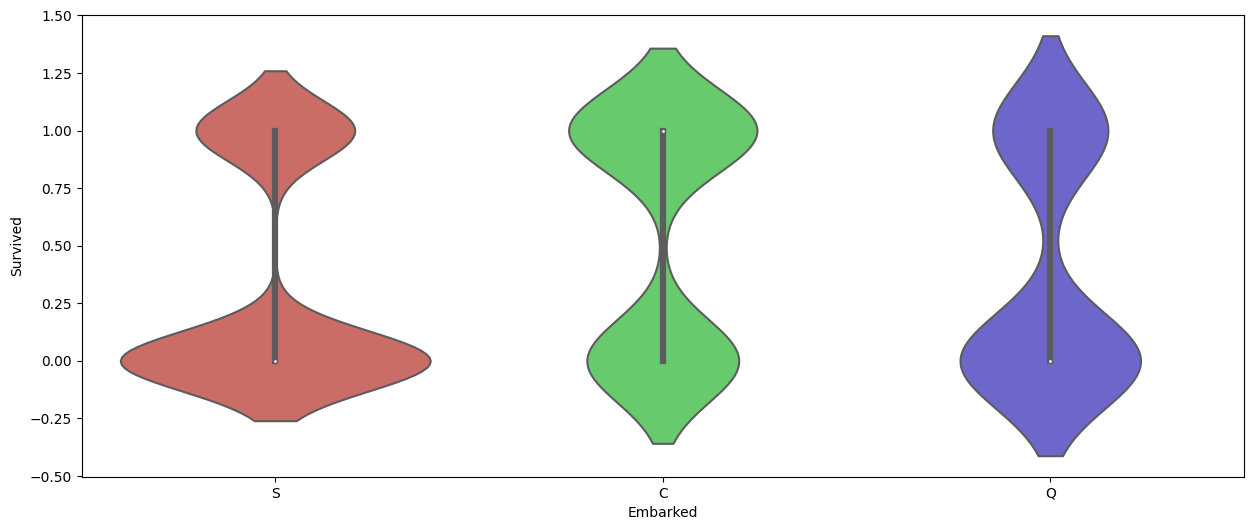

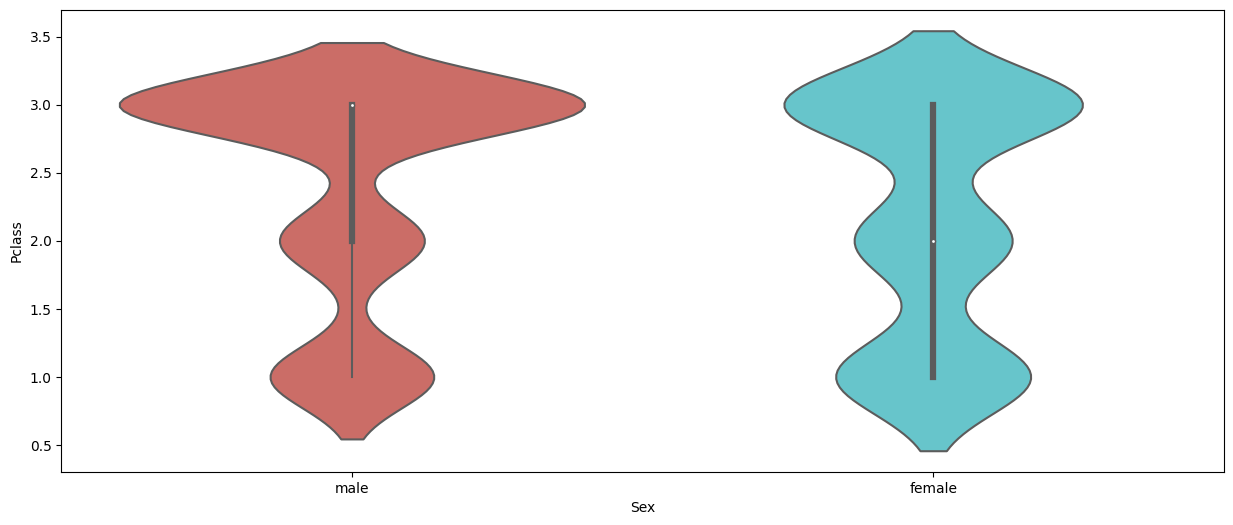

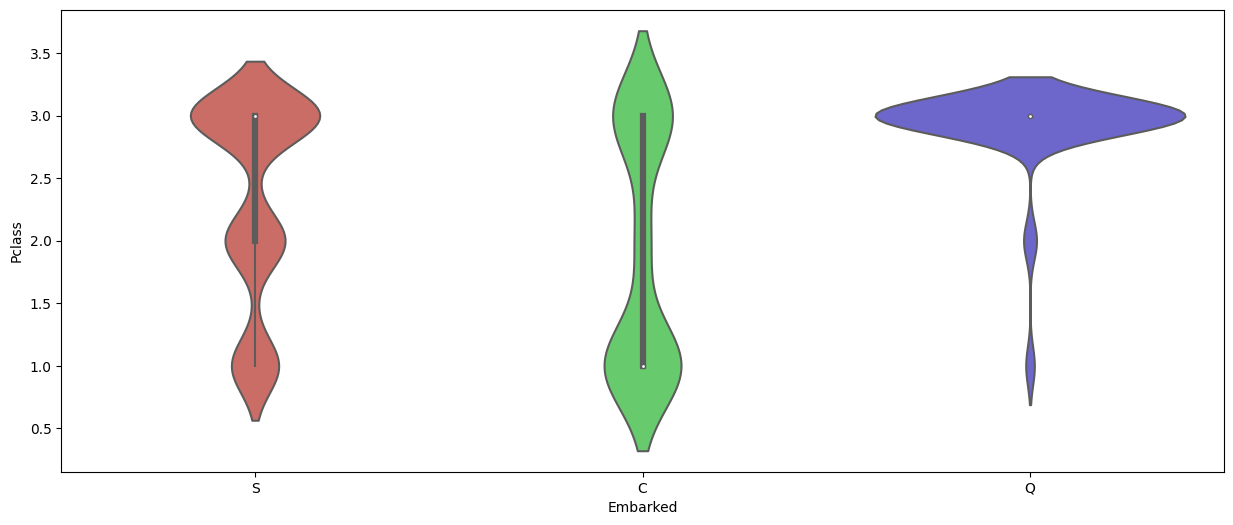

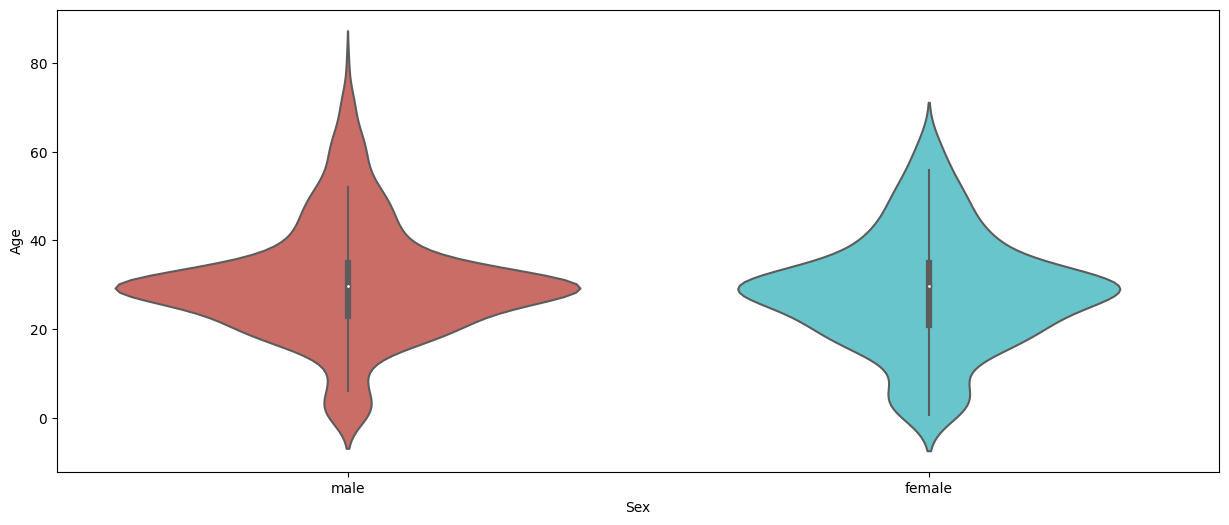

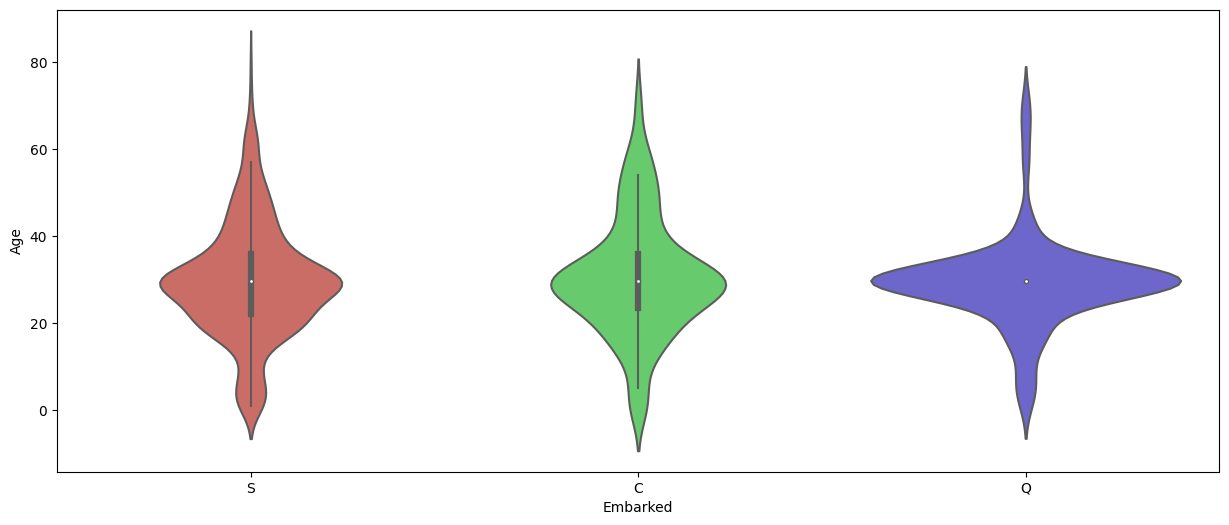

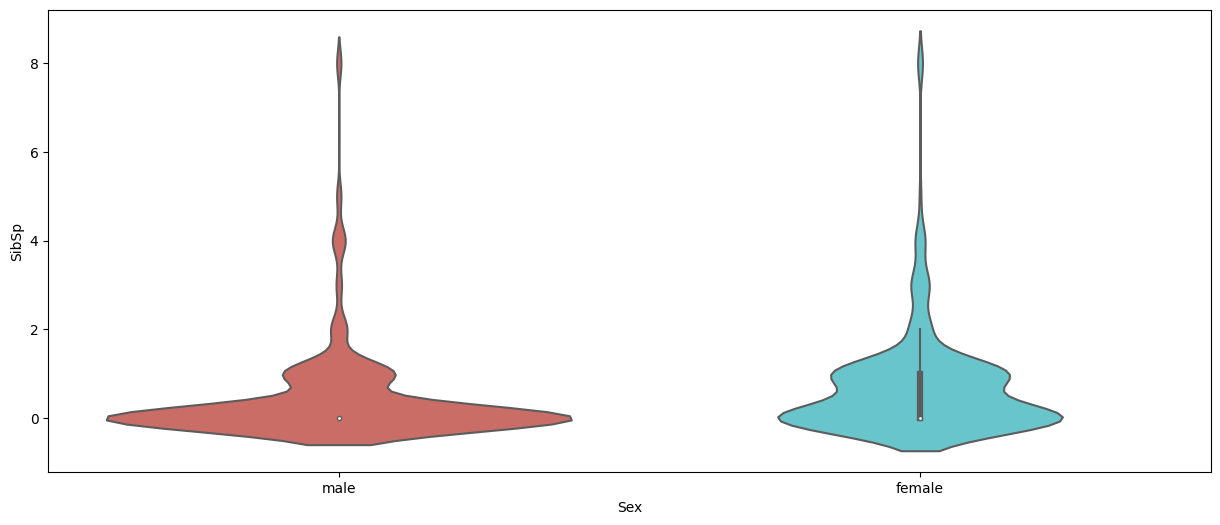

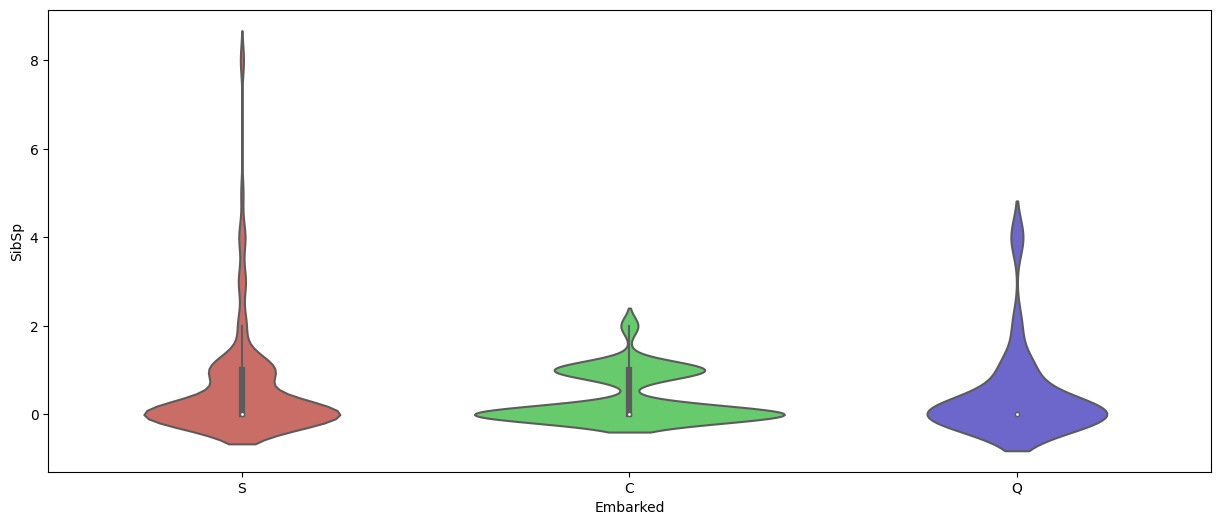

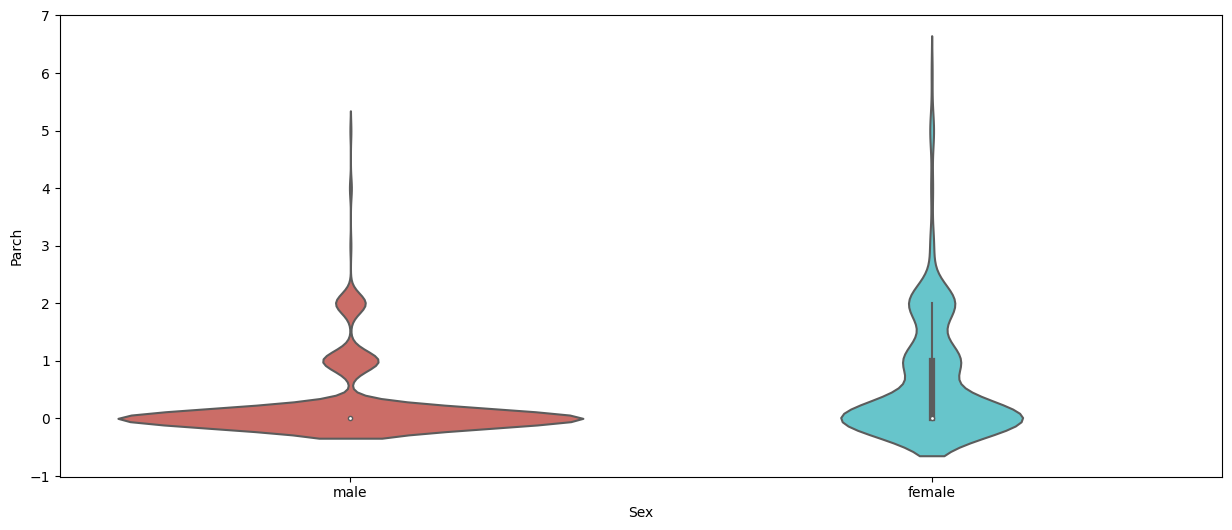

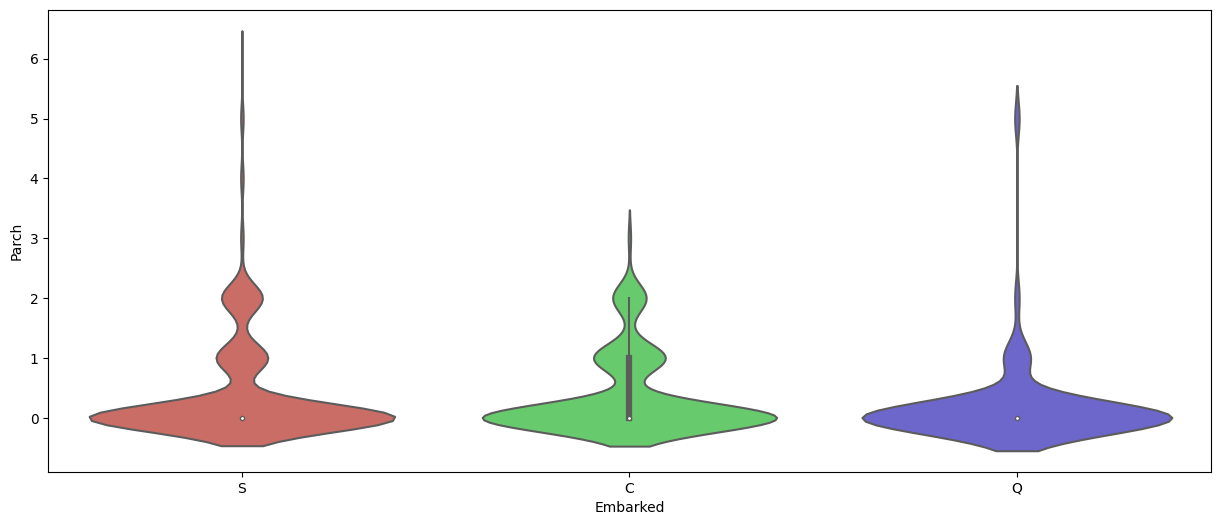

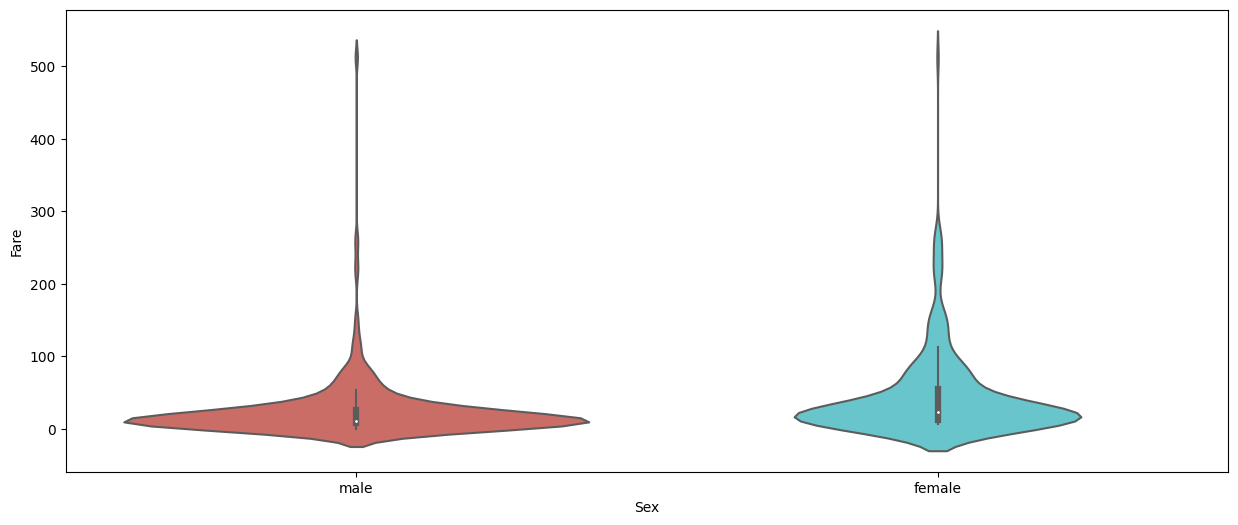

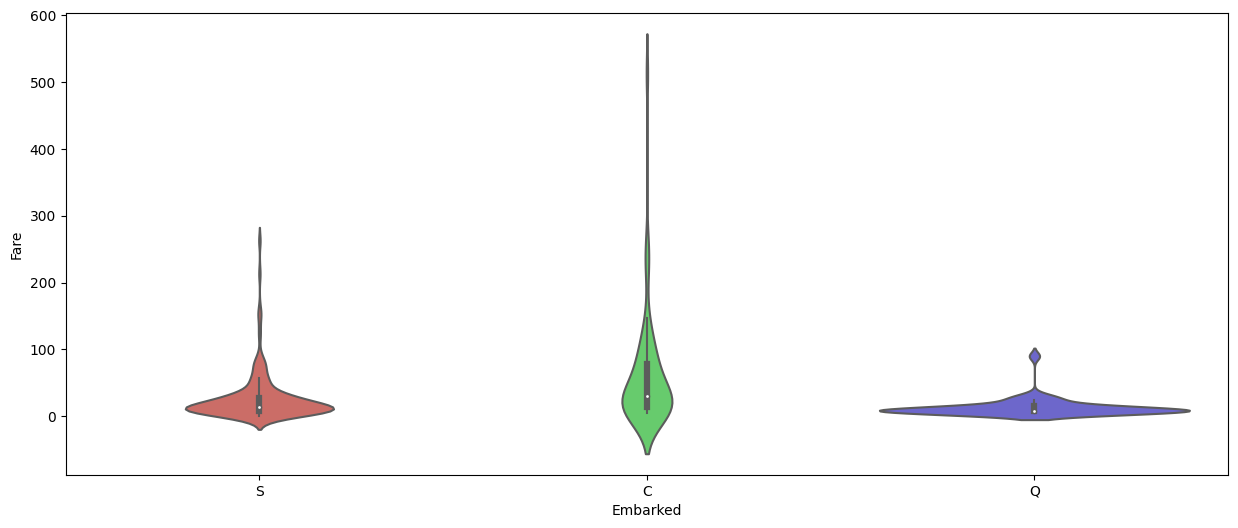

In [ ]:
for i in numerical_columns:
  for j in object_columns:
    plt.figure(figsize = (15,6))
    sns.violinplot(x = df[j], y = df[i], data =df,palette = 'hls')
    plt.show()

BIVARIATE LINE PLOT

<ipython-input-37-c6f2311e3411>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



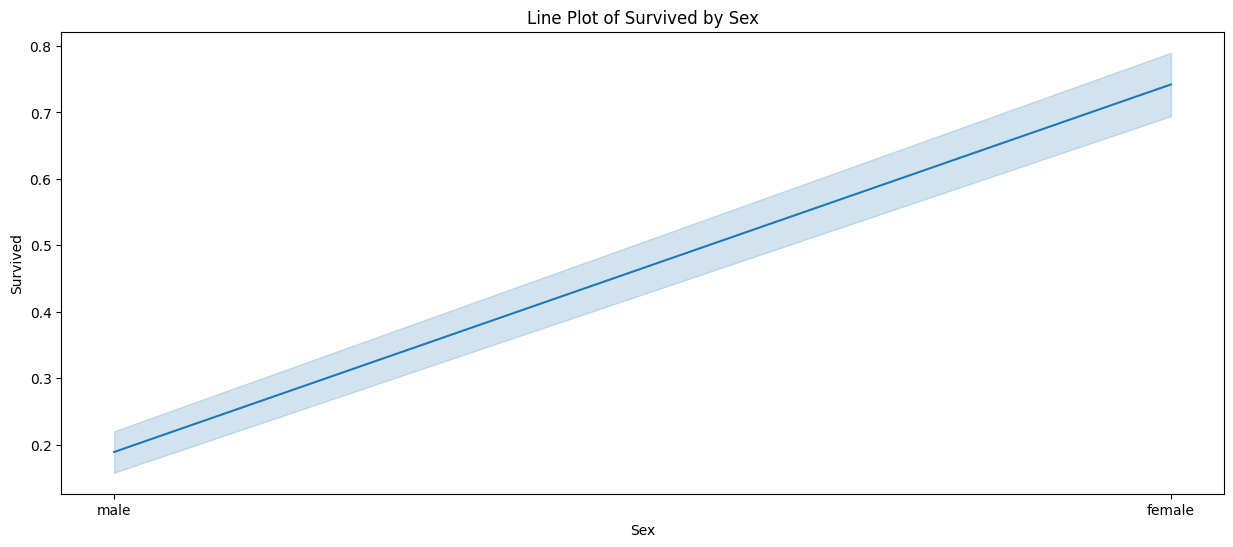

<ipython-input-37-c6f2311e3411>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



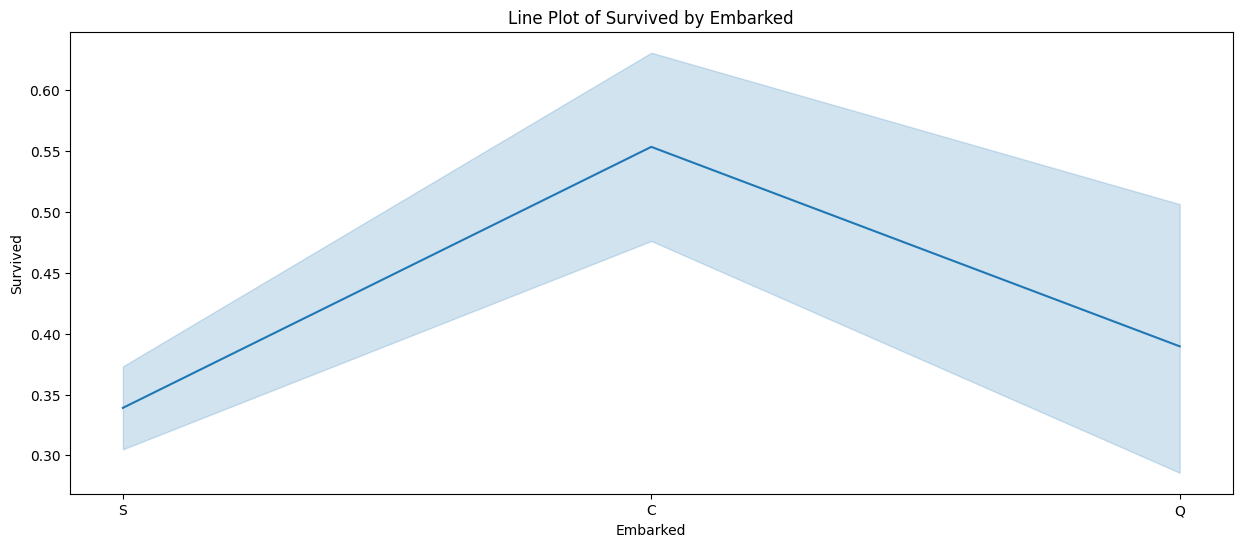

<ipython-input-37-c6f2311e3411>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



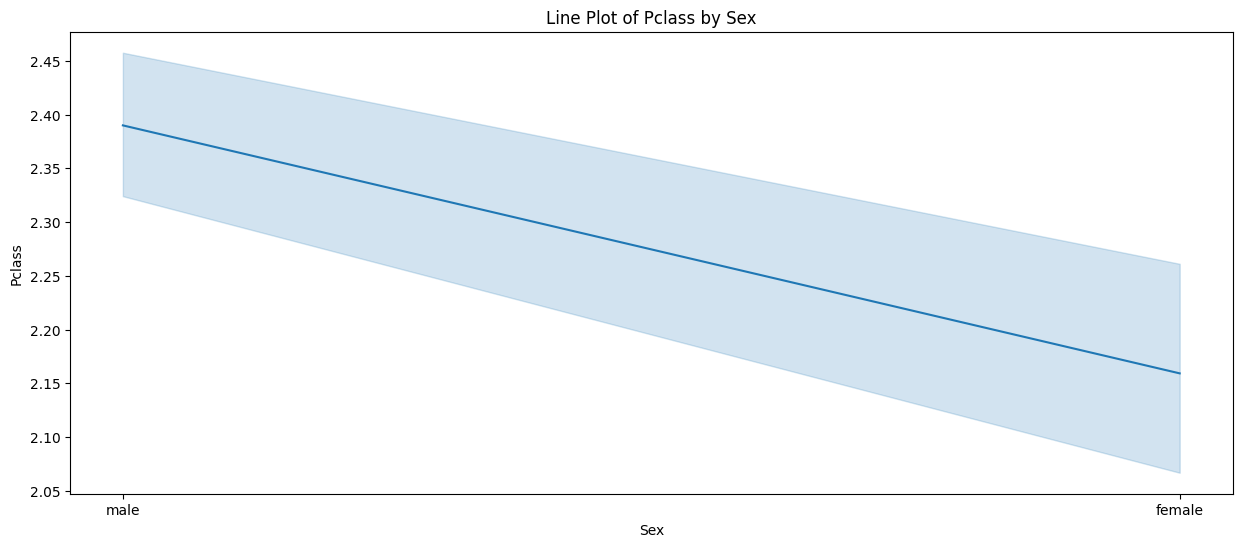

<ipython-input-37-c6f2311e3411>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



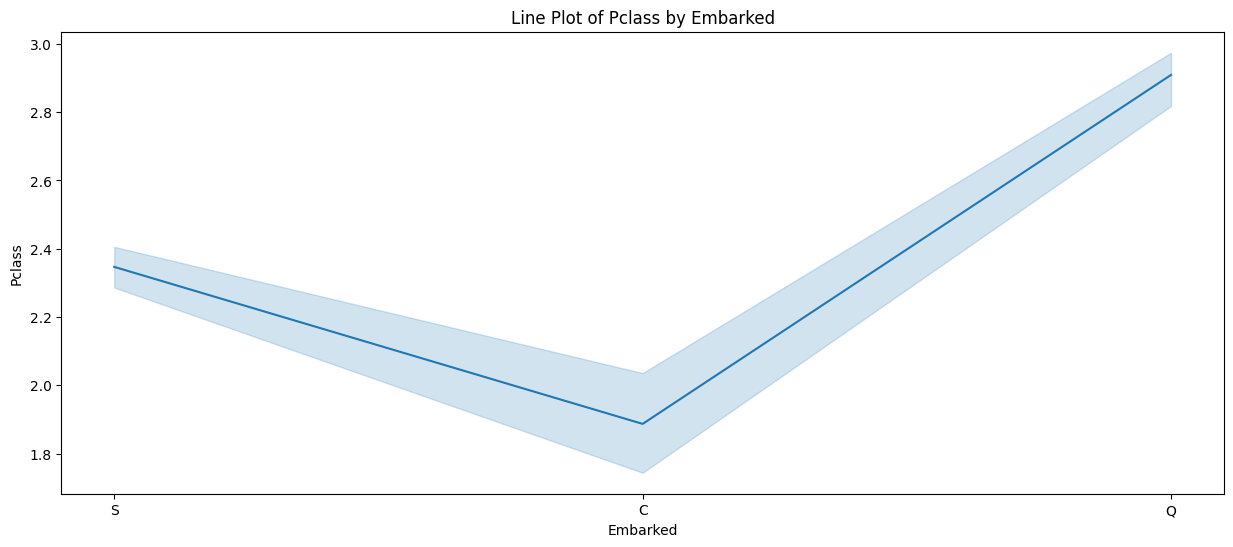

<ipython-input-37-c6f2311e3411>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



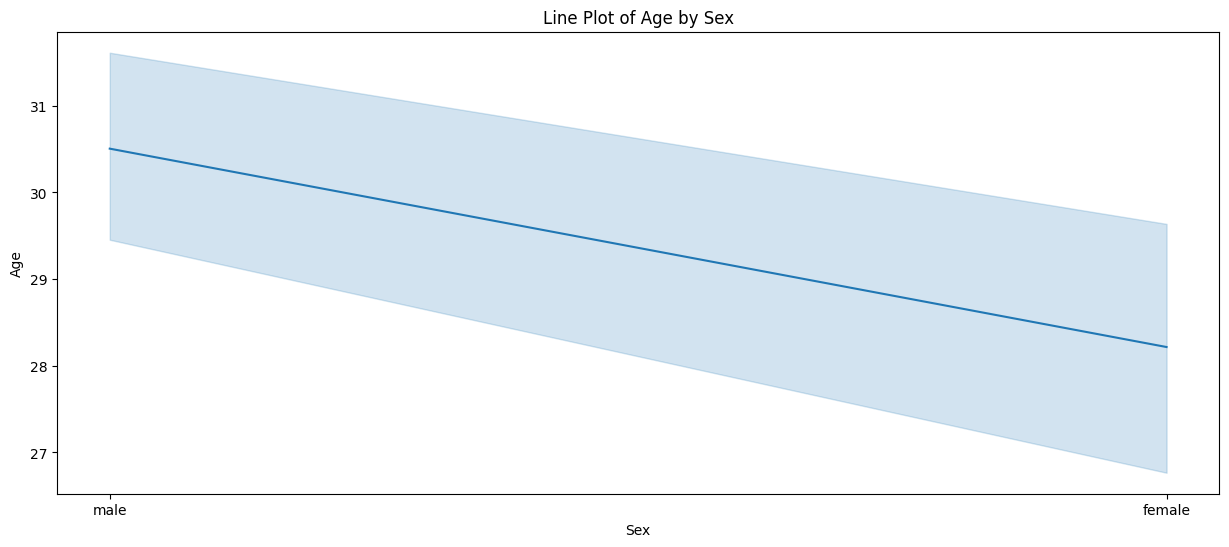

<ipython-input-37-c6f2311e3411>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



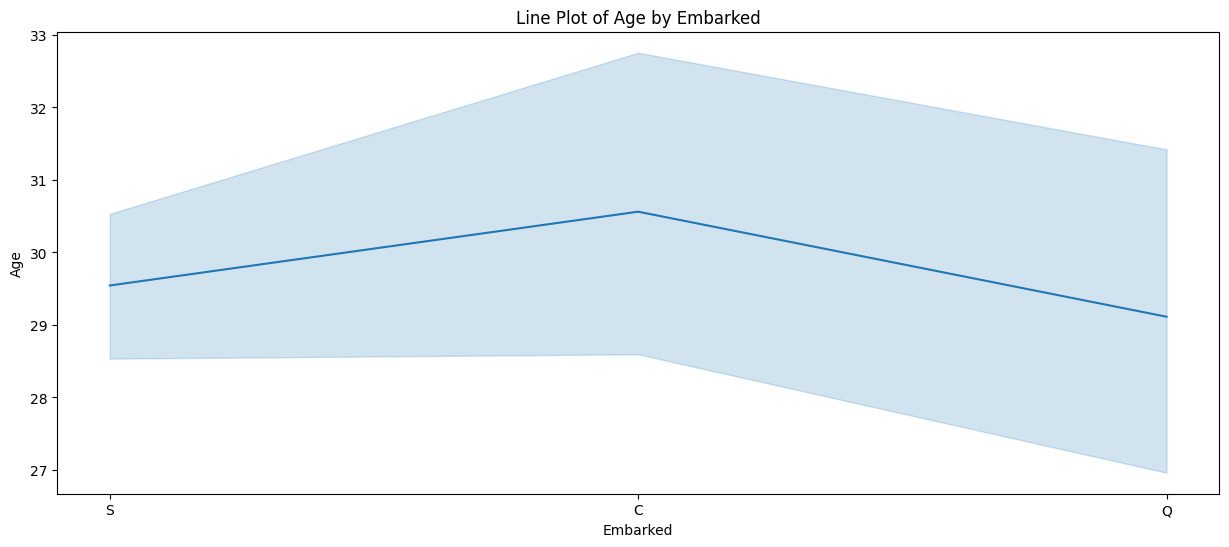

<ipython-input-37-c6f2311e3411>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



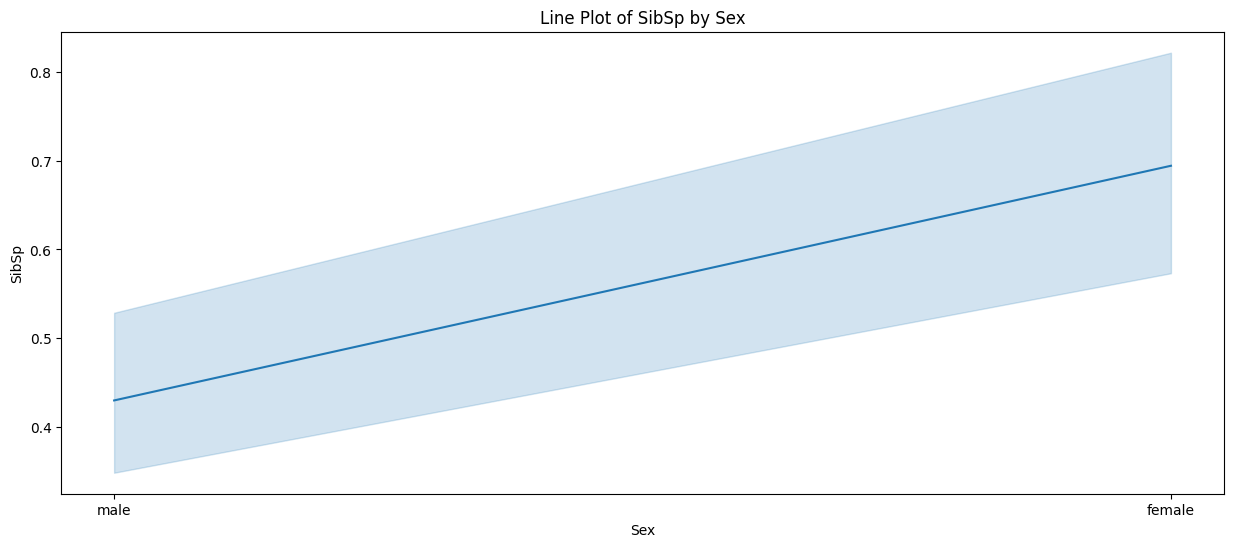

<ipython-input-37-c6f2311e3411>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



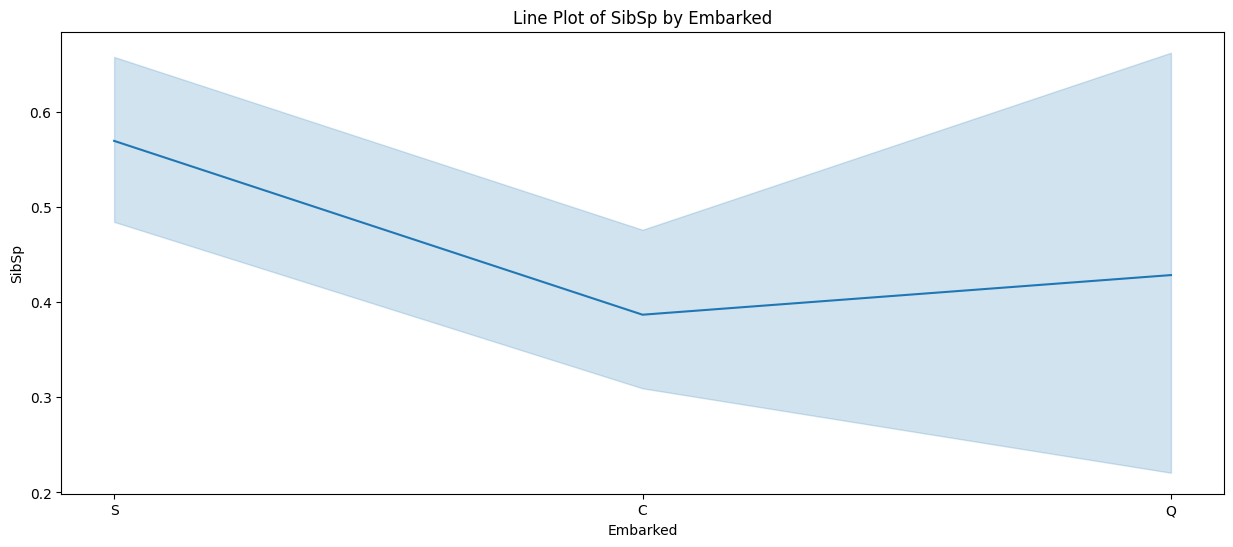

<ipython-input-37-c6f2311e3411>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



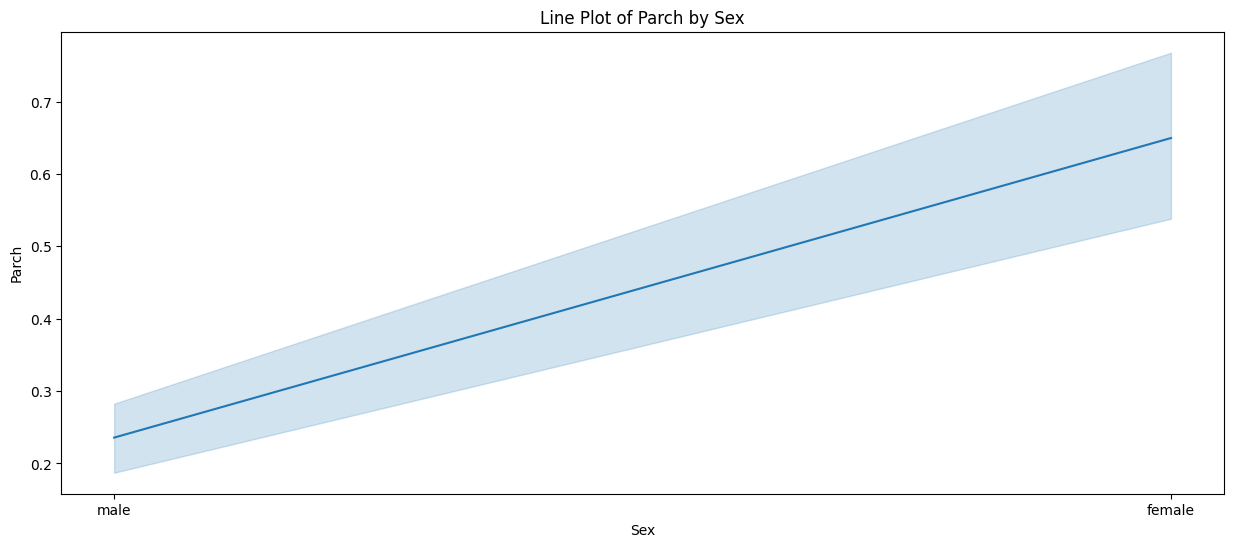

<ipython-input-37-c6f2311e3411>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



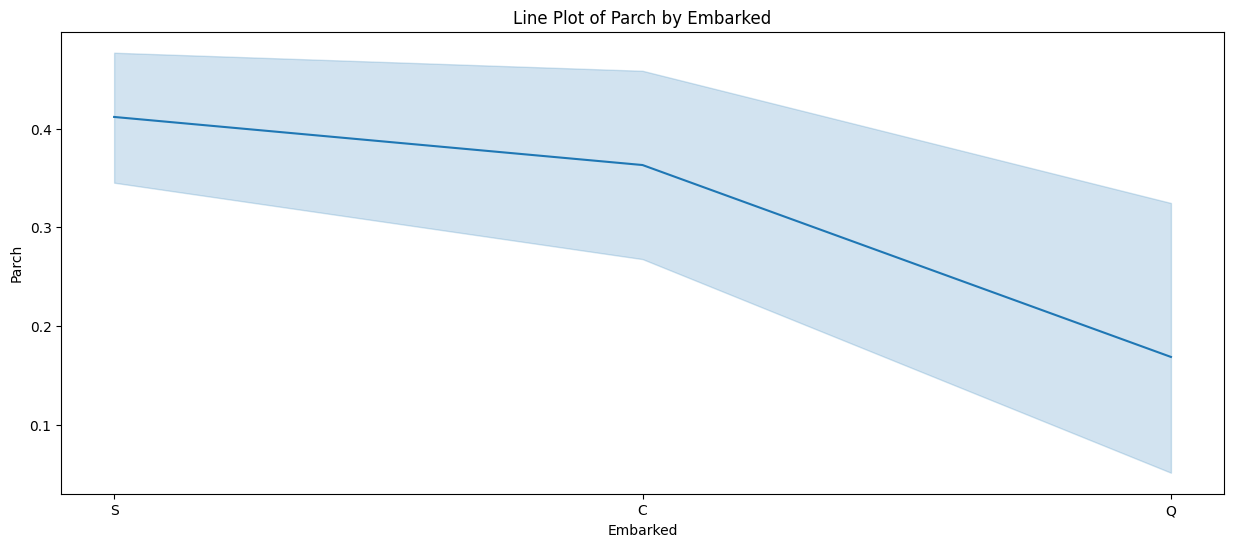

<ipython-input-37-c6f2311e3411>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



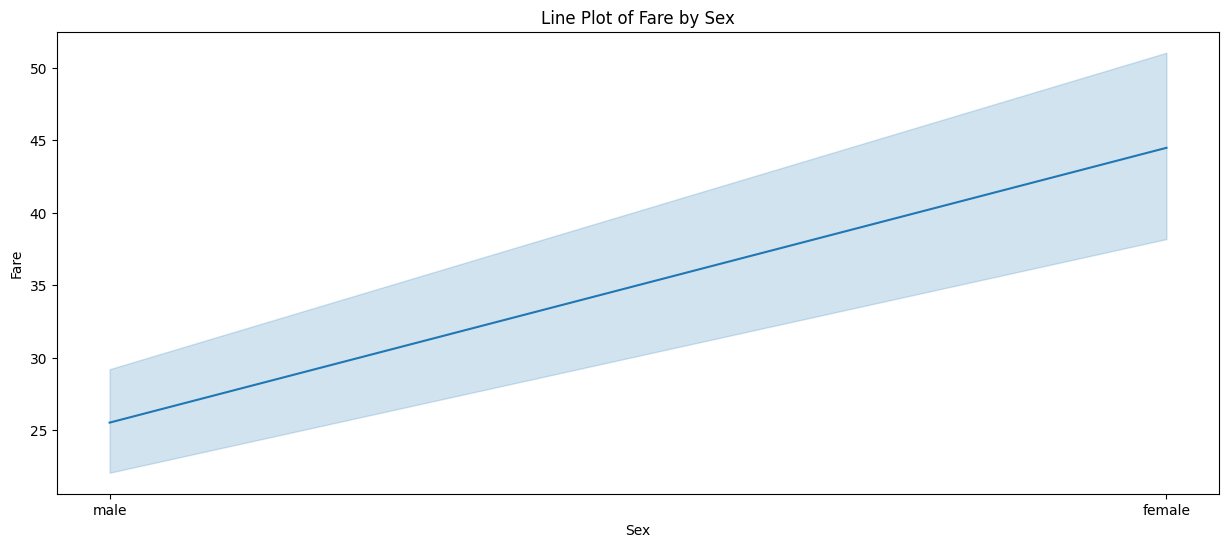

<ipython-input-37-c6f2311e3411>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



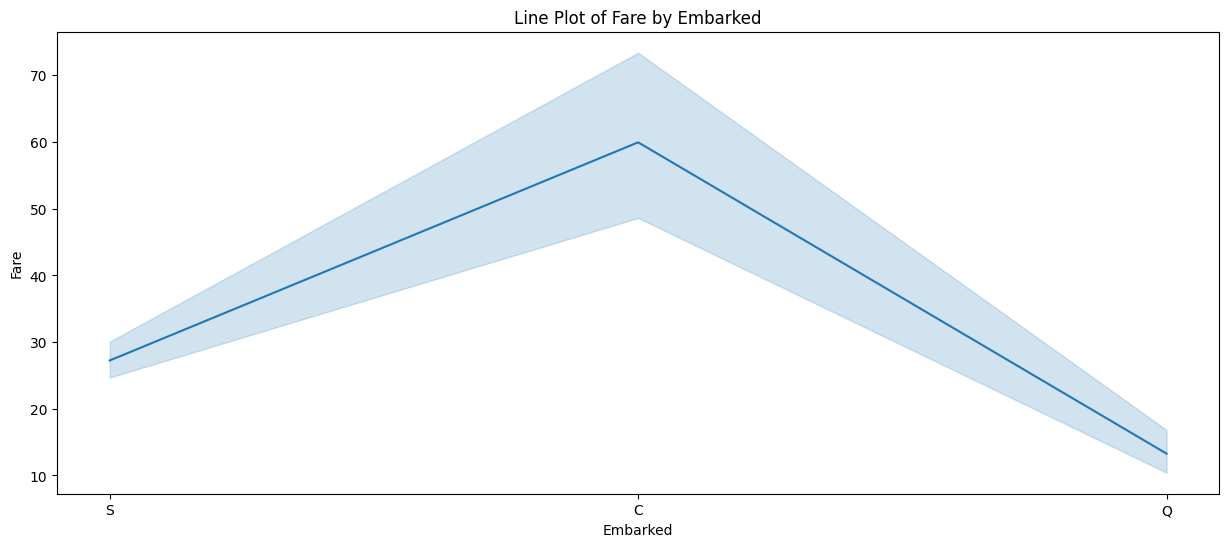

In [ ]:
for i in numerical_columns:
    for j in object_columns:
        plt.figure(figsize=(15, 6))
        sns.lineplot(x=df[j], y=df[i], palette='hls')
        plt.xticks(rotation=0)
        plt.title(f'Line Plot of {i} by {j}')
        plt.xlabel(j)
        plt.ylabel(i)
        plt.show()

BIVARIATE SCATTER PLOT

<ipython-input-38-92c0191aa719>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



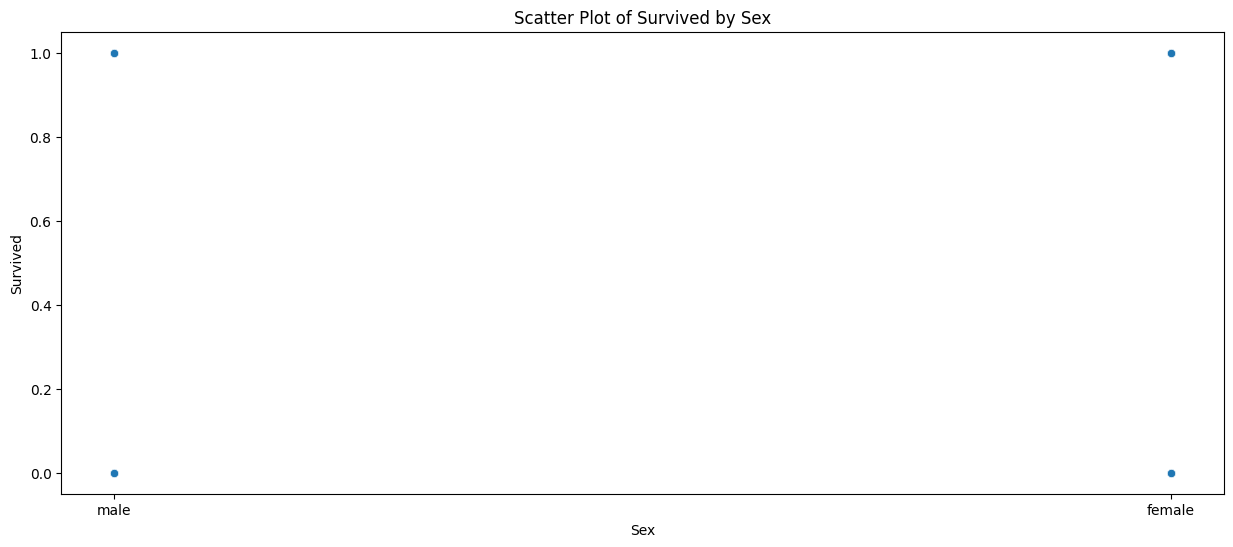

<ipython-input-38-92c0191aa719>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



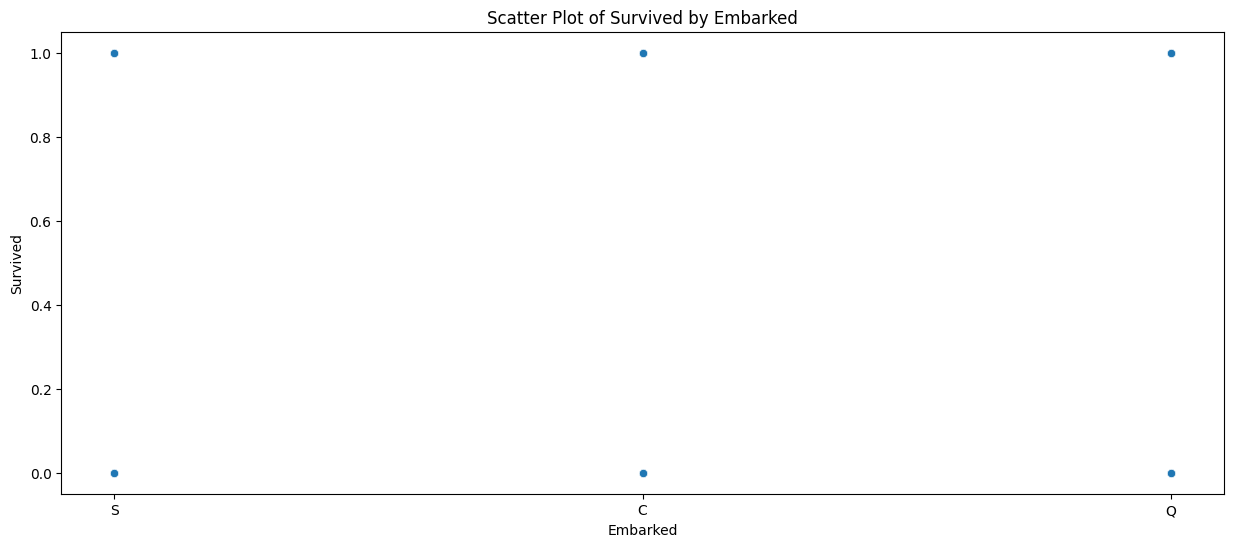

<ipython-input-38-92c0191aa719>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



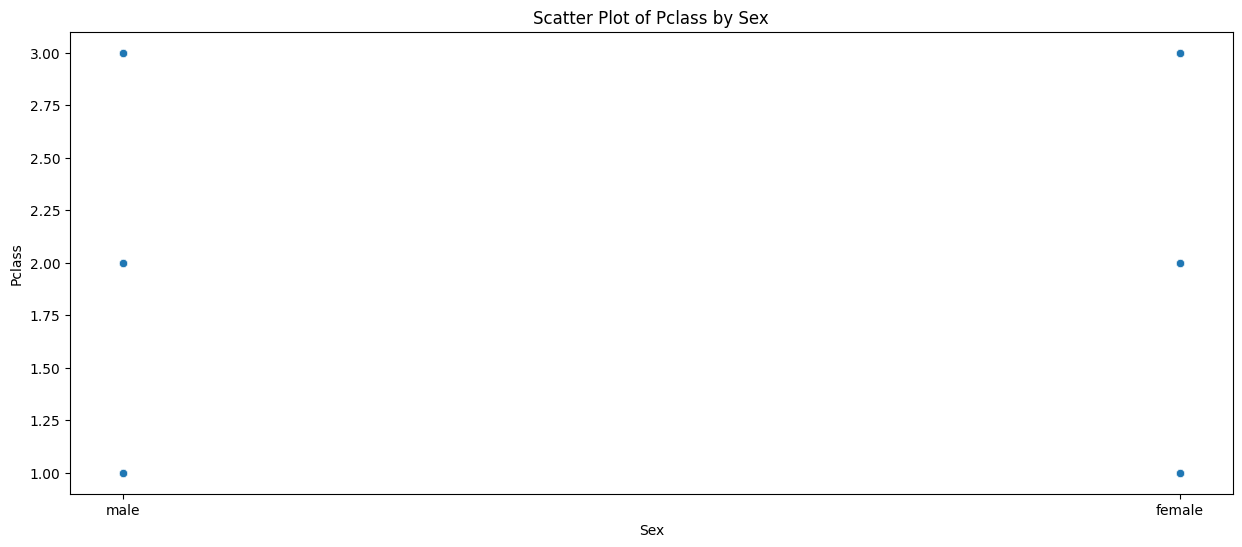

<ipython-input-38-92c0191aa719>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



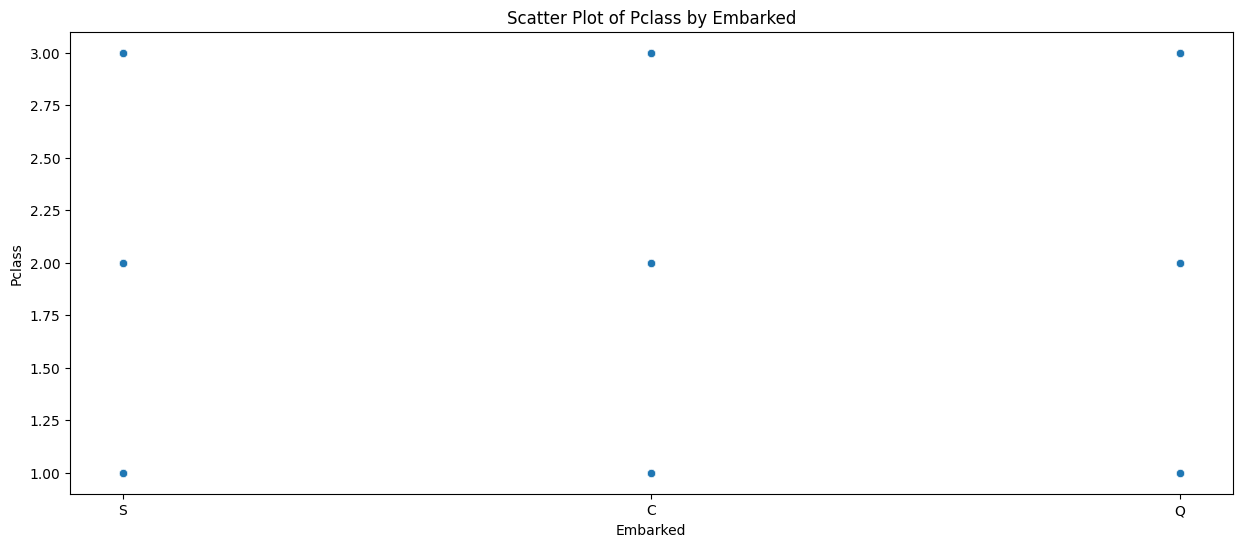

<ipython-input-38-92c0191aa719>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



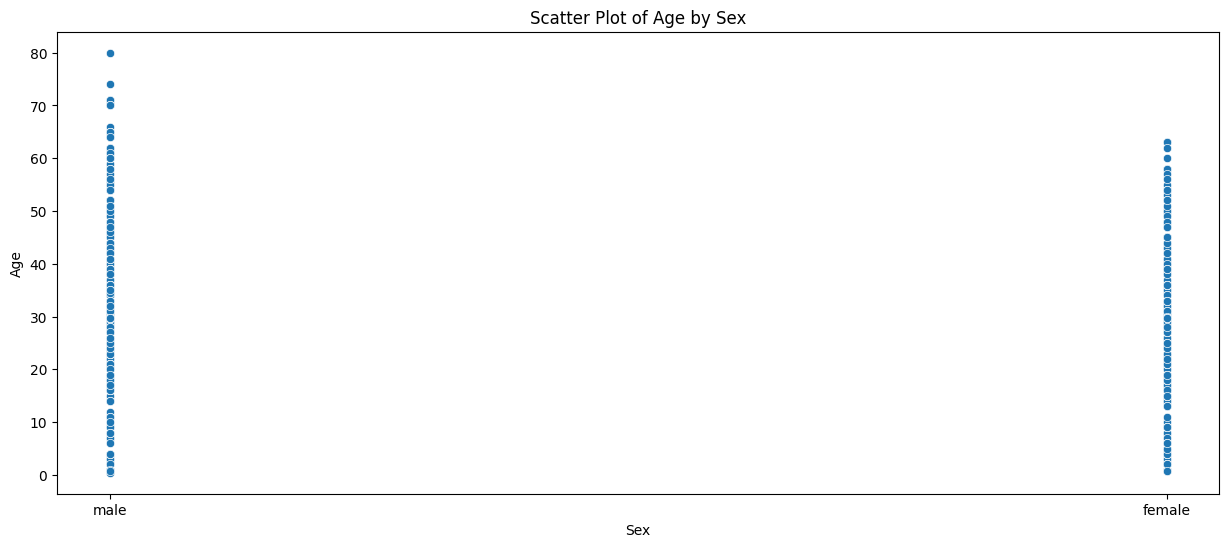

<ipython-input-38-92c0191aa719>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



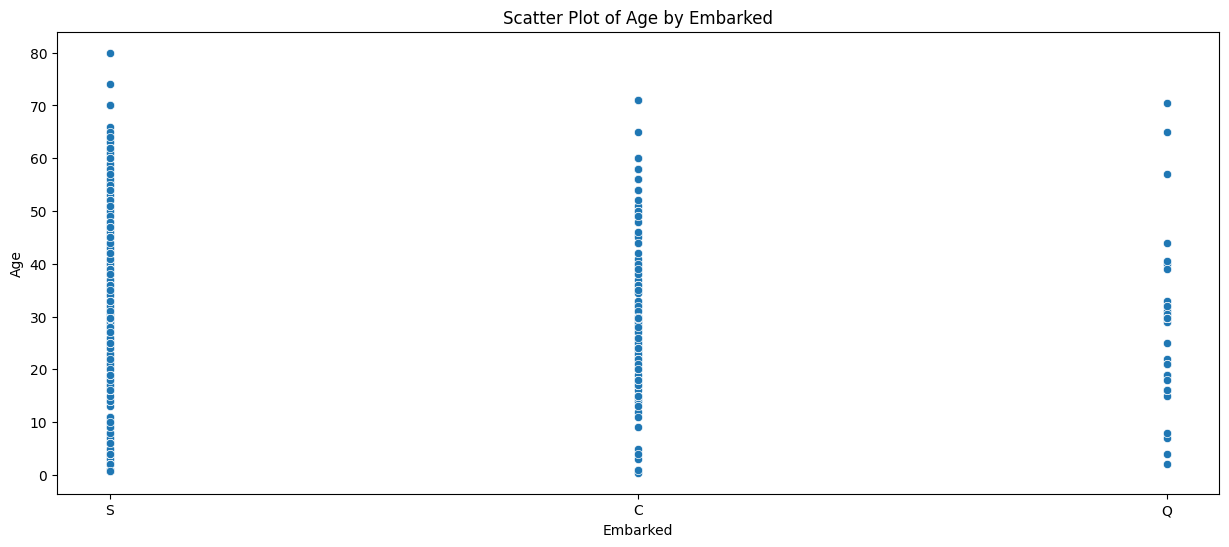

<ipython-input-38-92c0191aa719>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



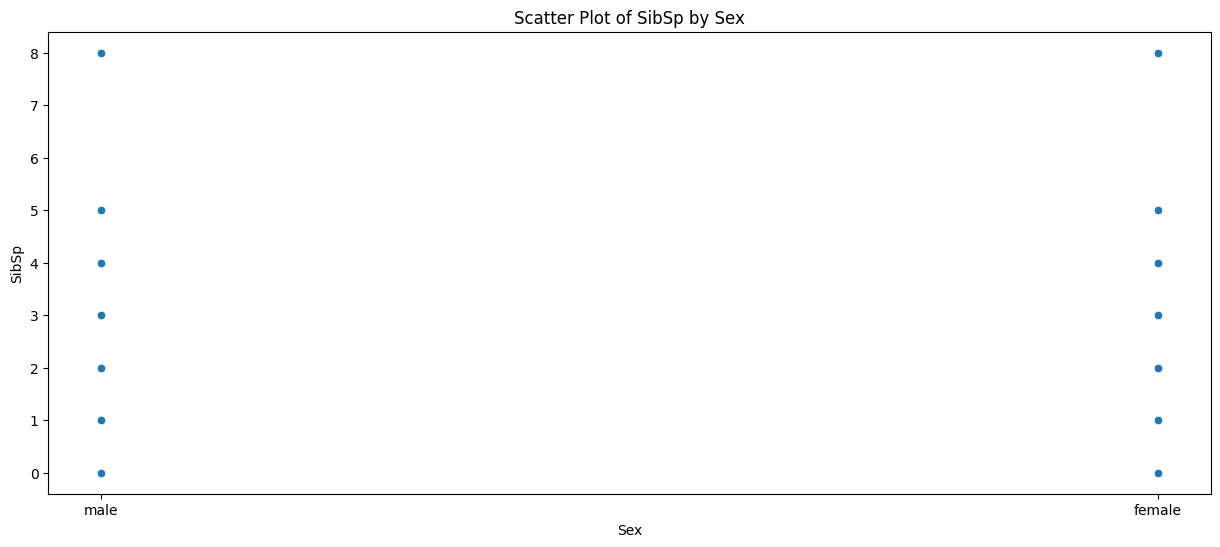

<ipython-input-38-92c0191aa719>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



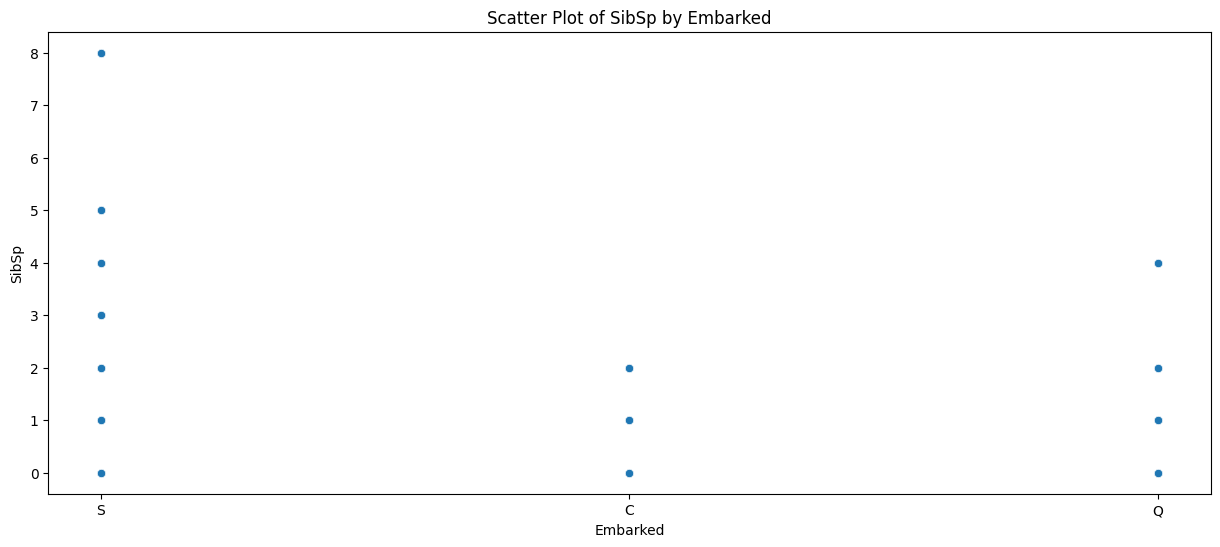

<ipython-input-38-92c0191aa719>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



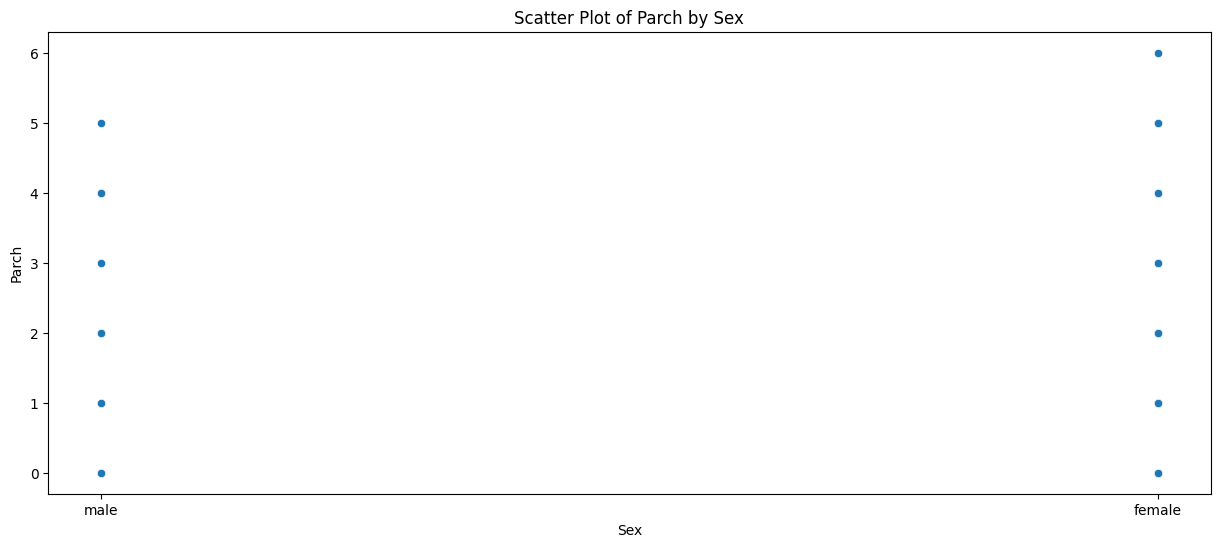

<ipython-input-38-92c0191aa719>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



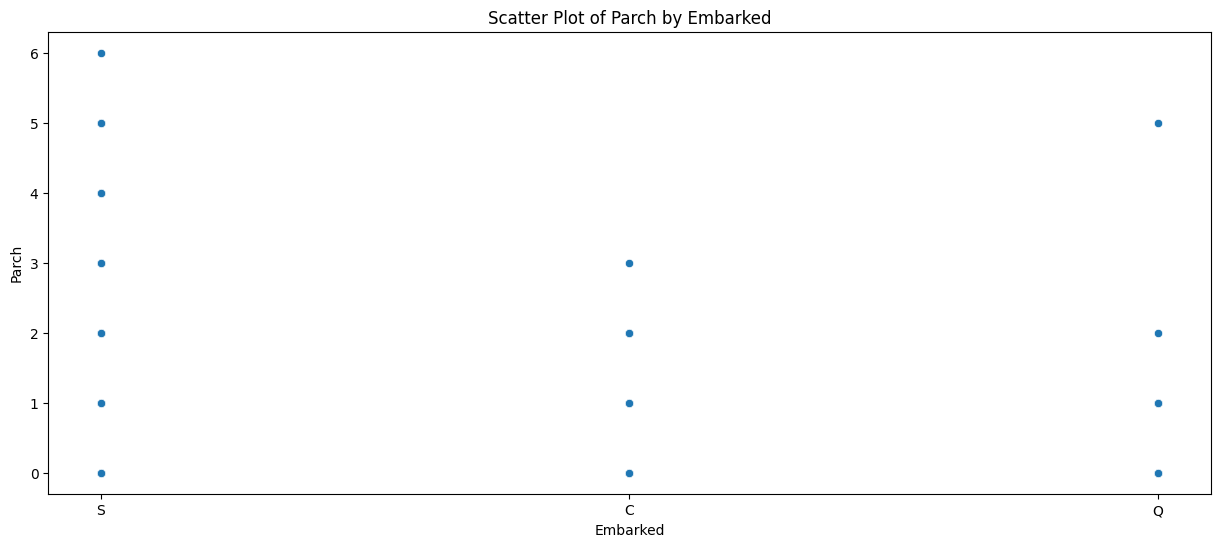

<ipython-input-38-92c0191aa719>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



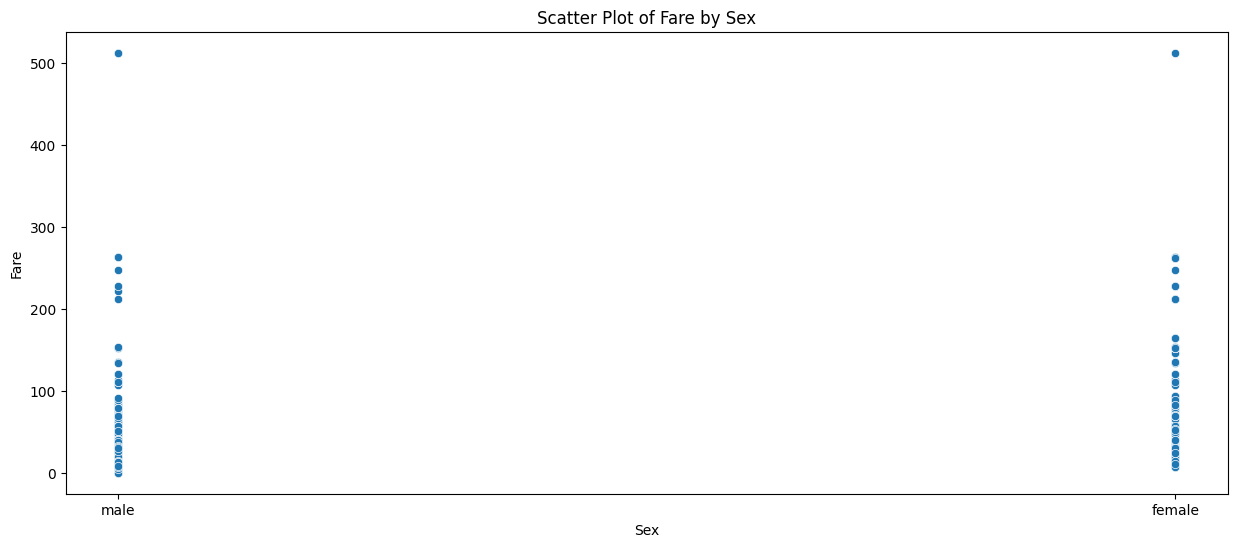

<ipython-input-38-92c0191aa719>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



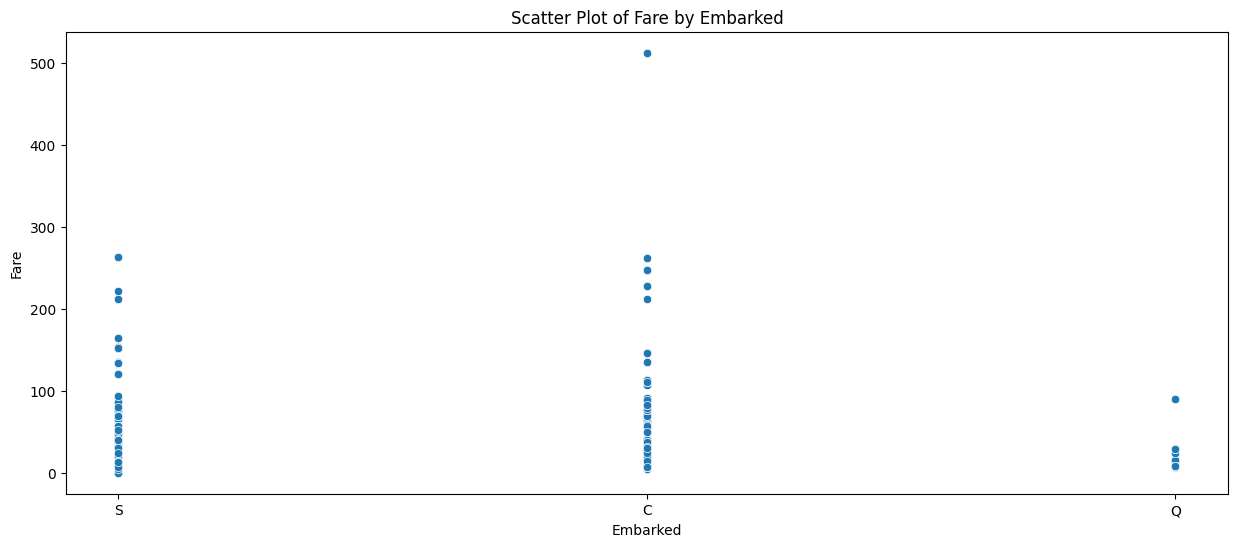

In [ ]:
for i in numerical_columns:
    for j in object_columns:
        plt.figure(figsize=(15, 6))
        sns.scatterplot(x=df[j], y=df[i], palette='hls')
        plt.xticks(rotation=0)
        plt.title(f'Scatter Plot of {i} by {j}')
        plt.xlabel(j)
        plt.ylabel(i)
        plt.show()

UNIVARIATE SCATTER PLOT

<ipython-input-39-956daa18cfa0>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



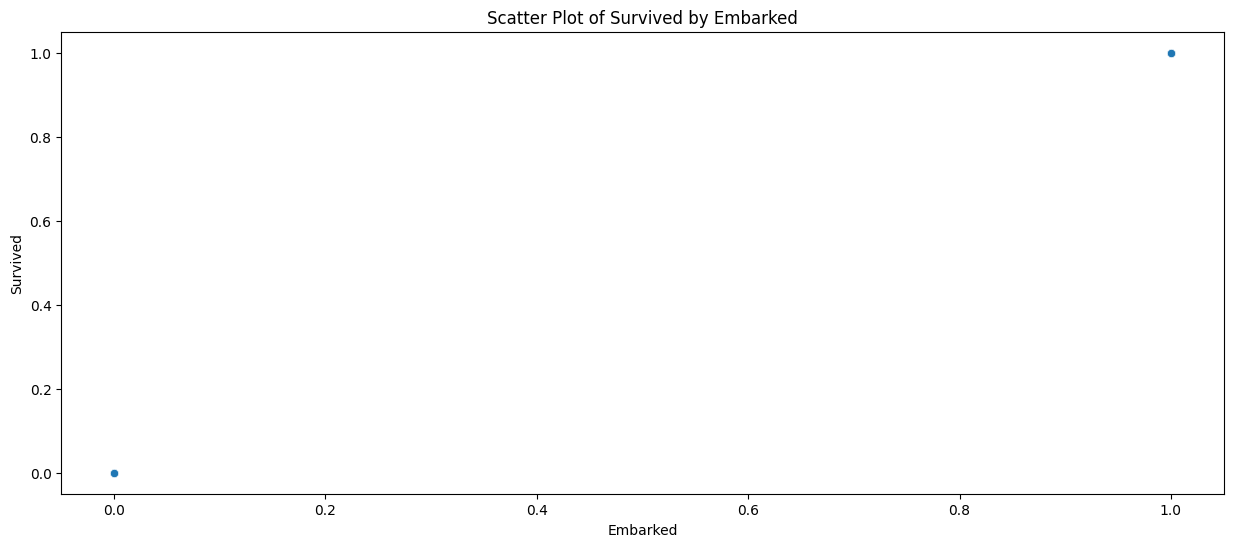

<ipython-input-39-956daa18cfa0>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



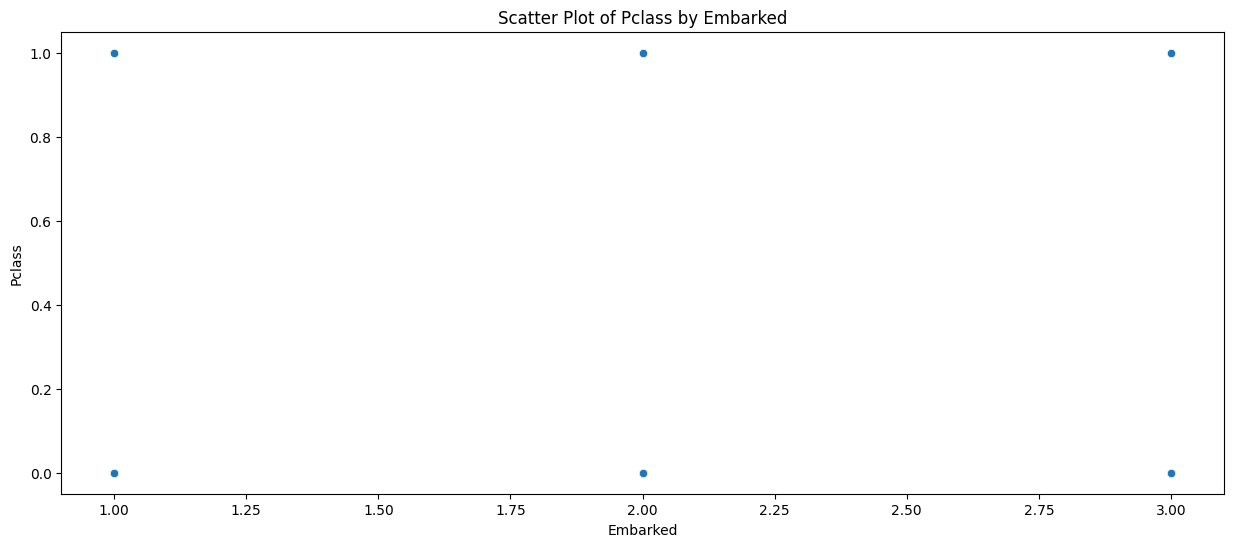

<ipython-input-39-956daa18cfa0>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



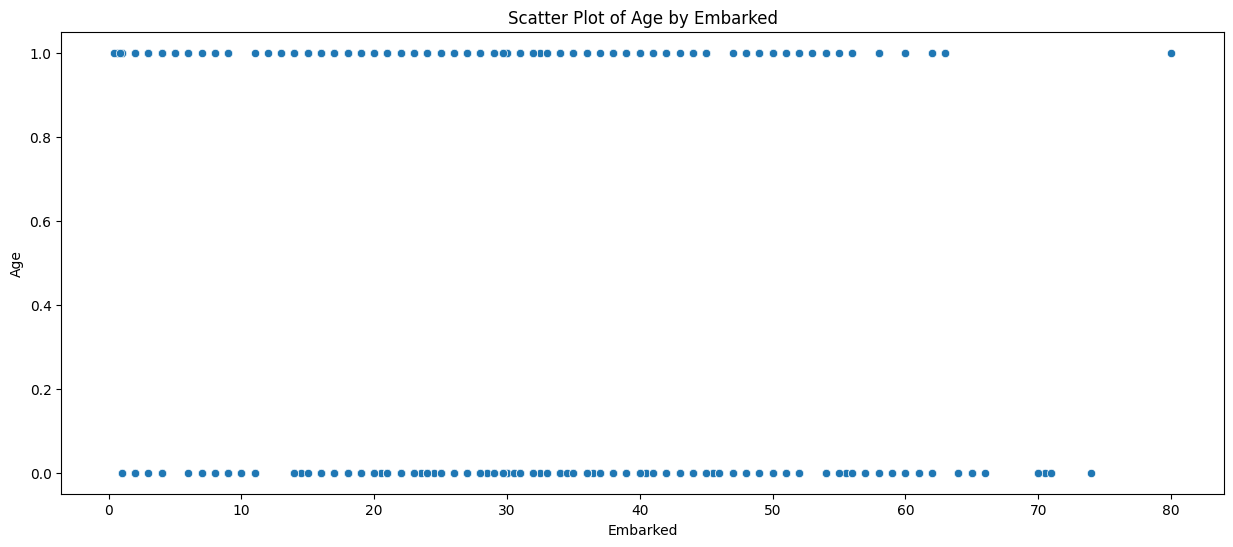

<ipython-input-39-956daa18cfa0>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



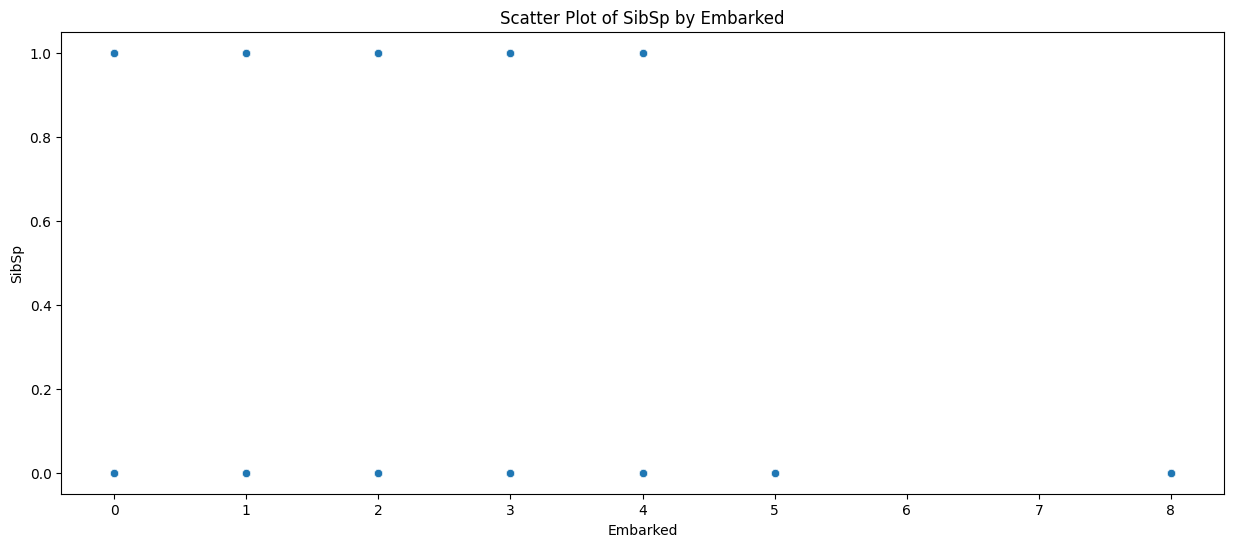

<ipython-input-39-956daa18cfa0>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



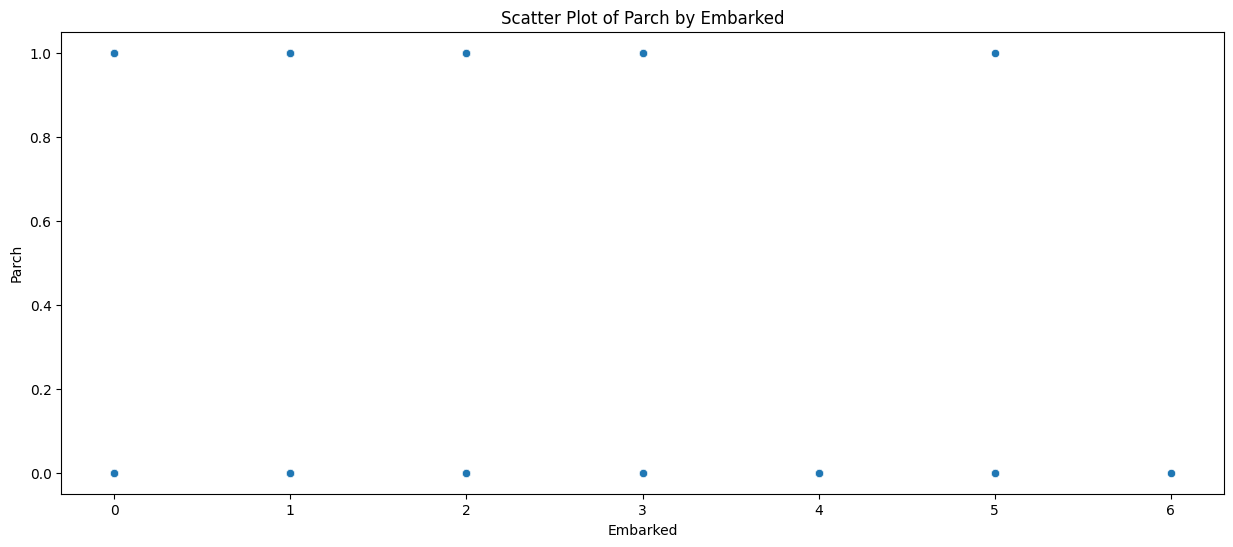

<ipython-input-39-956daa18cfa0>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



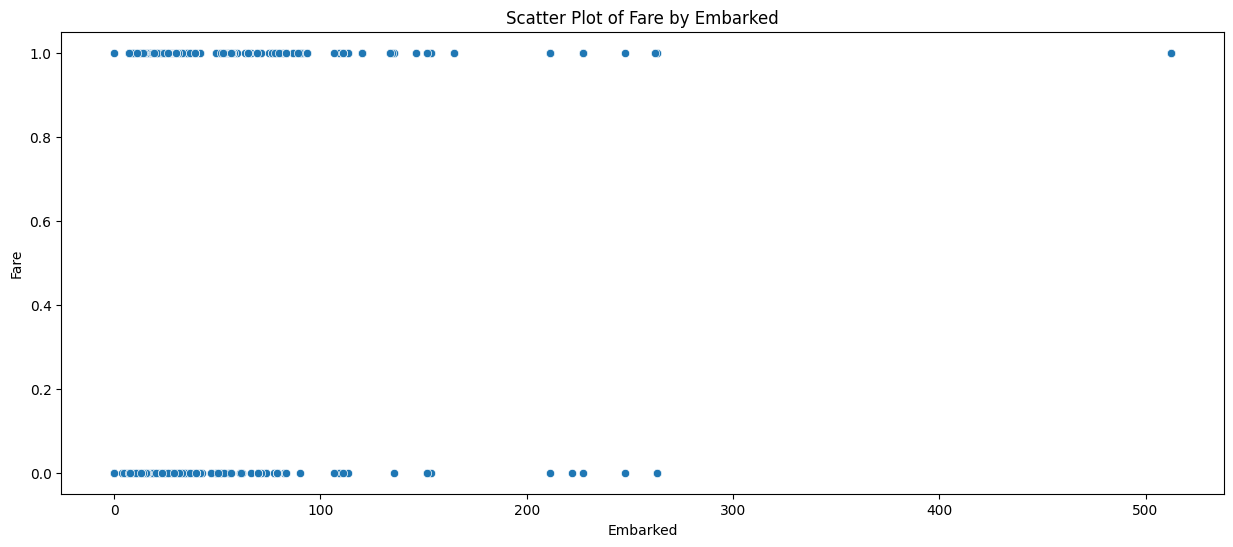

In [ ]:
for i in numerical_columns:
        plt.figure(figsize=(15, 6))
        sns.scatterplot(x=df[i], y=df['Survived'], data = df, palette='hls')
        plt.xticks(rotation=0)
        plt.title(f'Scatter Plot of {i} by {j}')
        plt.xlabel(j)
        plt.ylabel(i)
        plt.show()

In [ ]:
df1 = df.copy()

<ipython-input-41-7a11af24089a>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



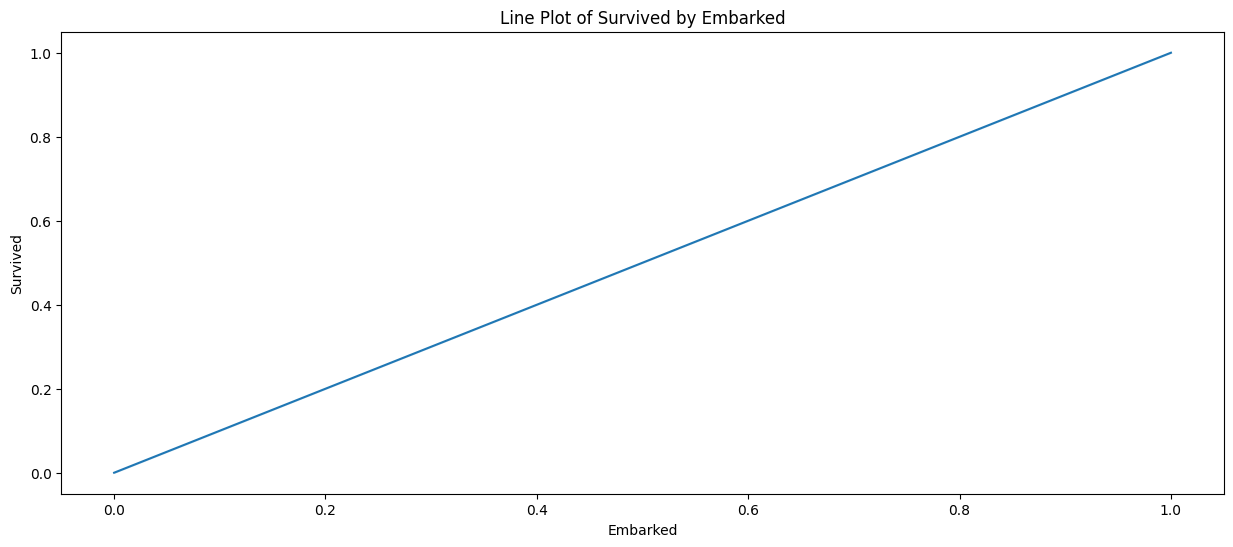

<ipython-input-41-7a11af24089a>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



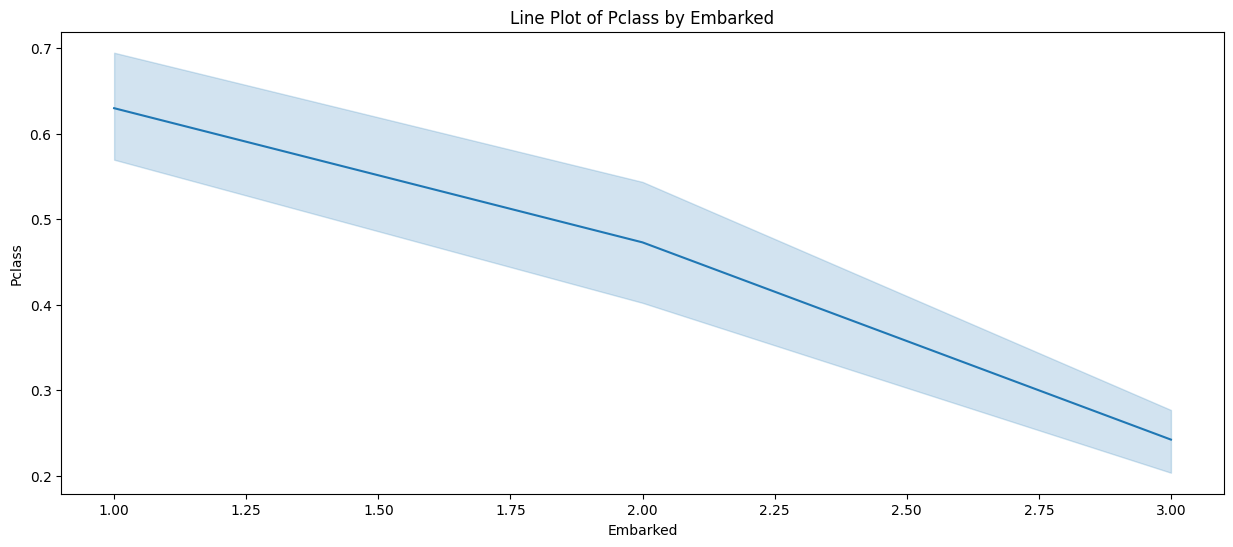

<ipython-input-41-7a11af24089a>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



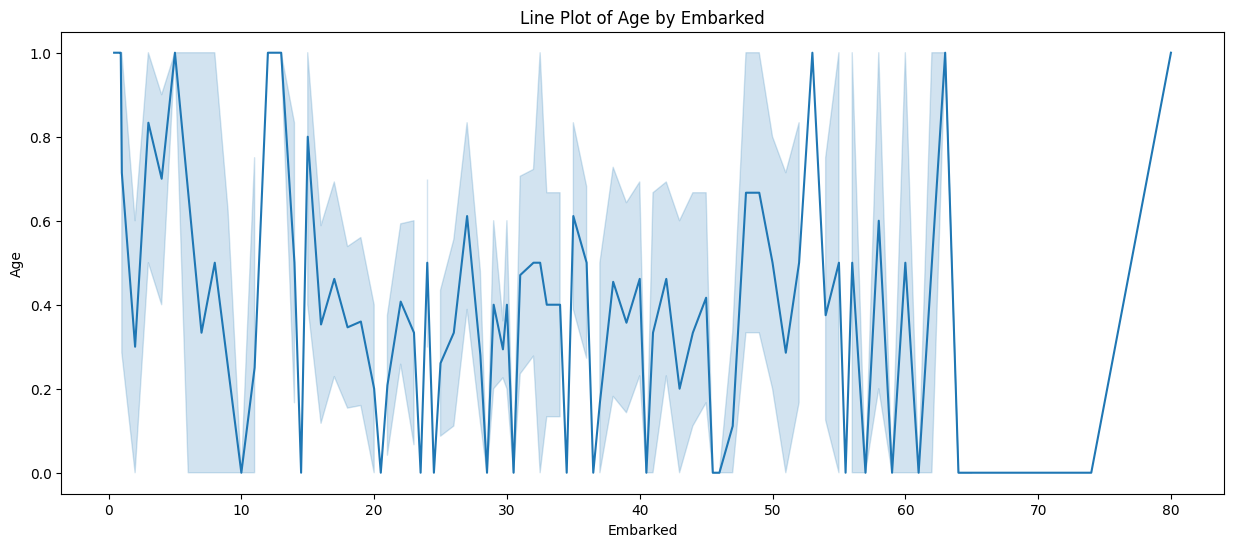

<ipython-input-41-7a11af24089a>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



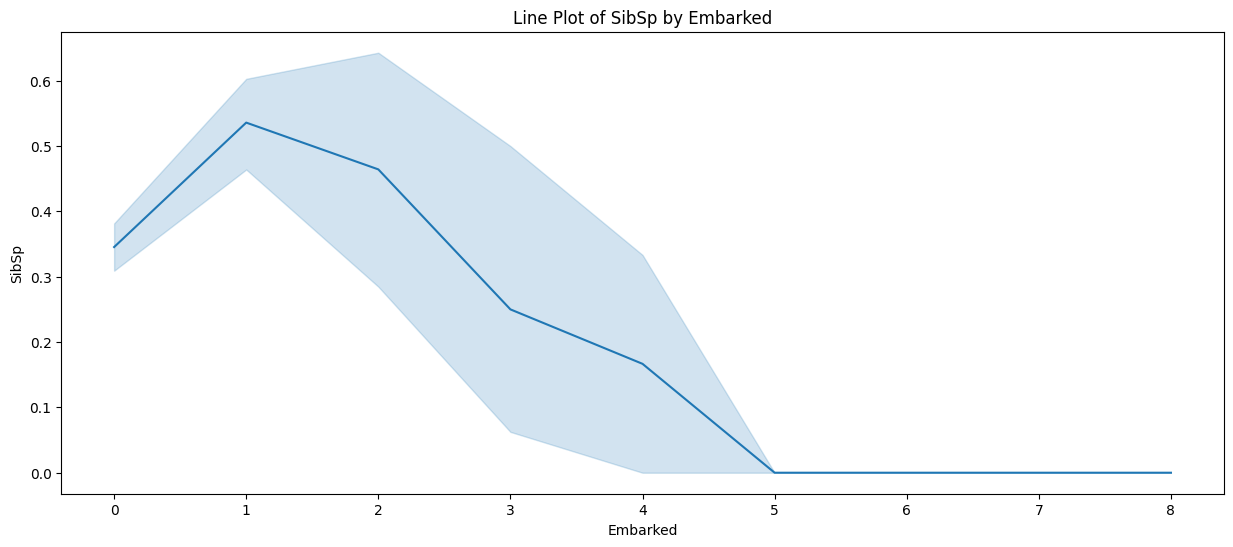

<ipython-input-41-7a11af24089a>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



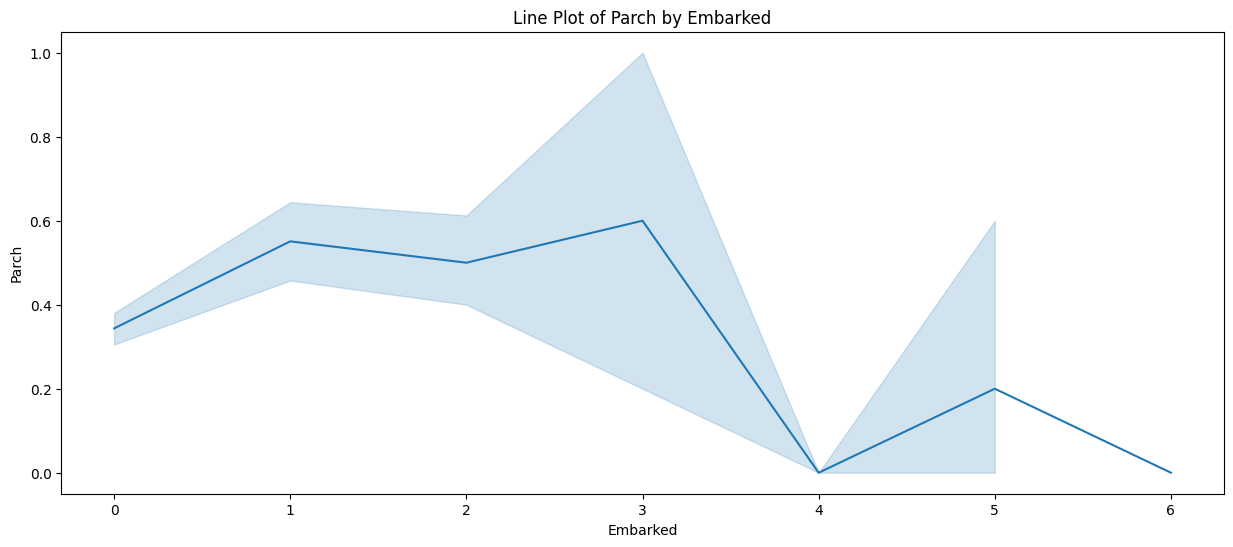

<ipython-input-41-7a11af24089a>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



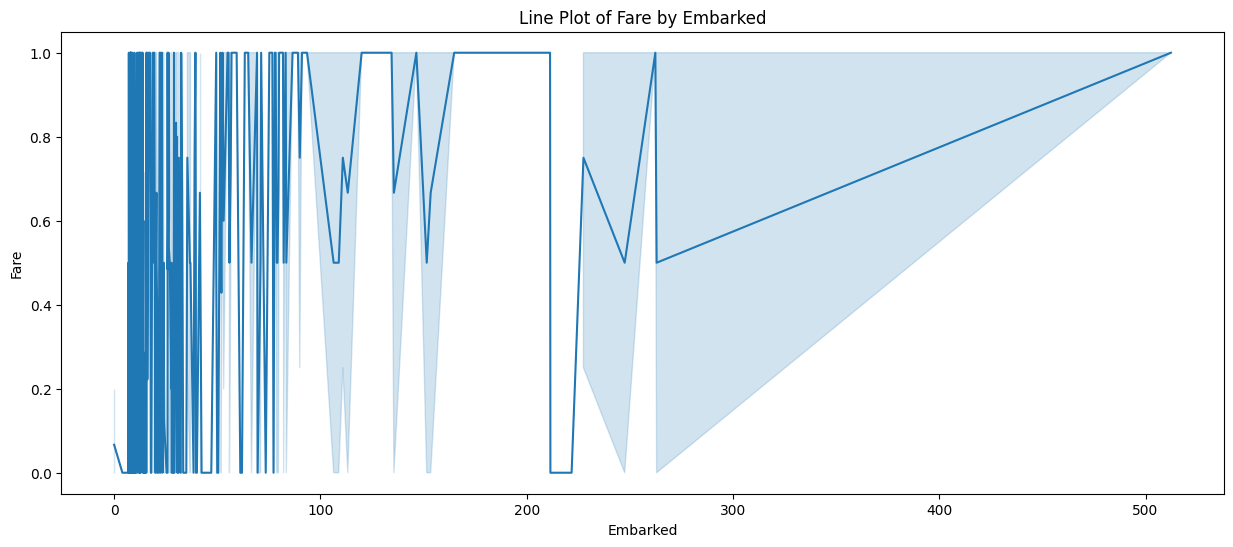

In [ ]:
for i in numerical_columns:
        plt.figure(figsize=(15, 6))
        sns.lineplot(x=df1[i], y=df1['Survived'], data = df1, palette='hls')
        plt.xticks(rotation=0)
        plt.title(f'Line Plot of {i} by {j}')
        plt.xlabel(j)
        plt.ylabel(i)
        plt.show()

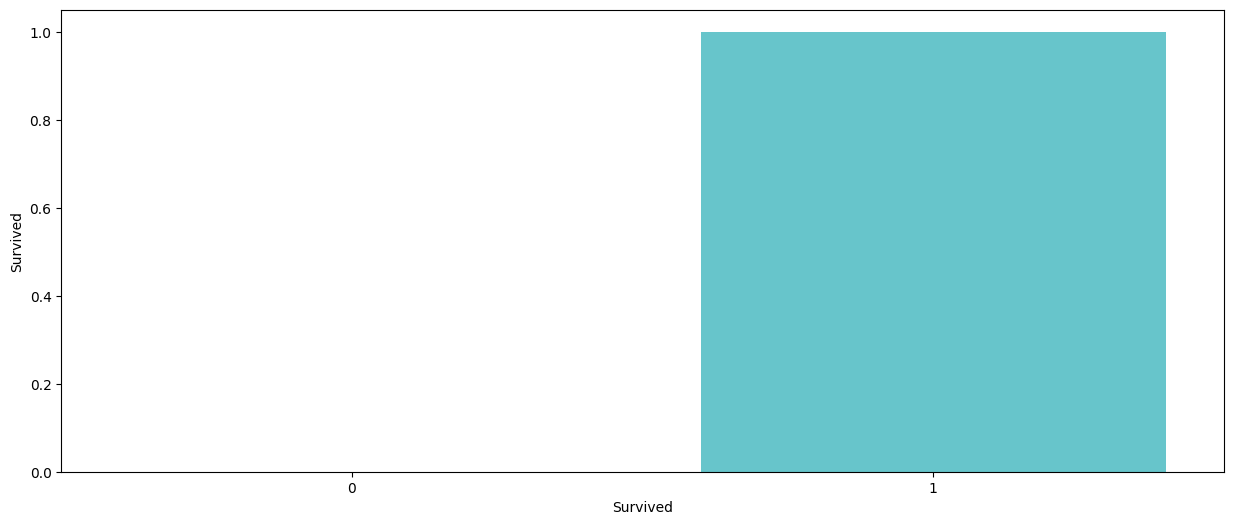

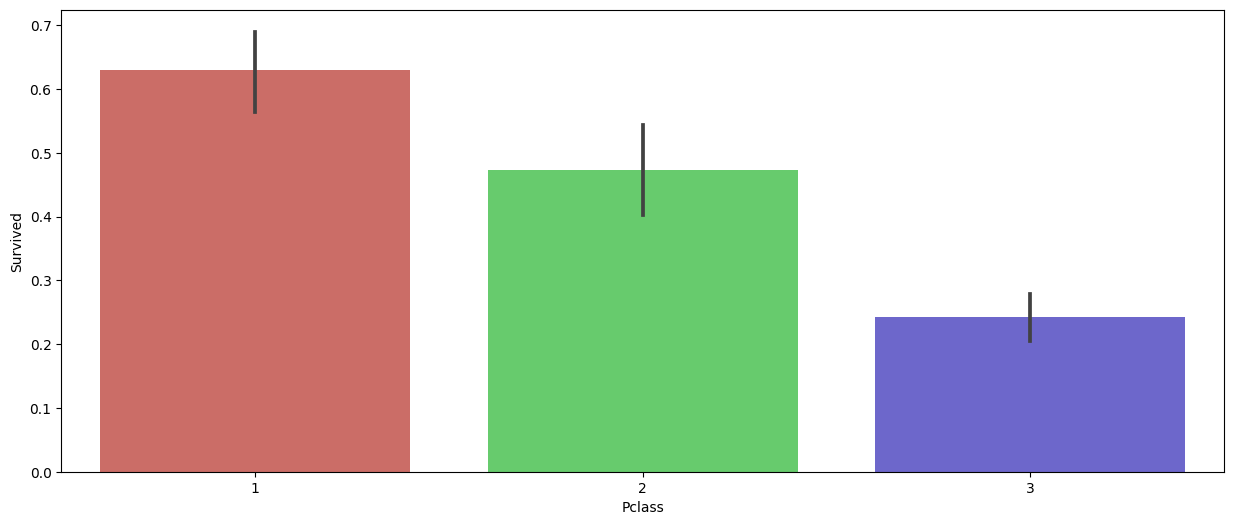

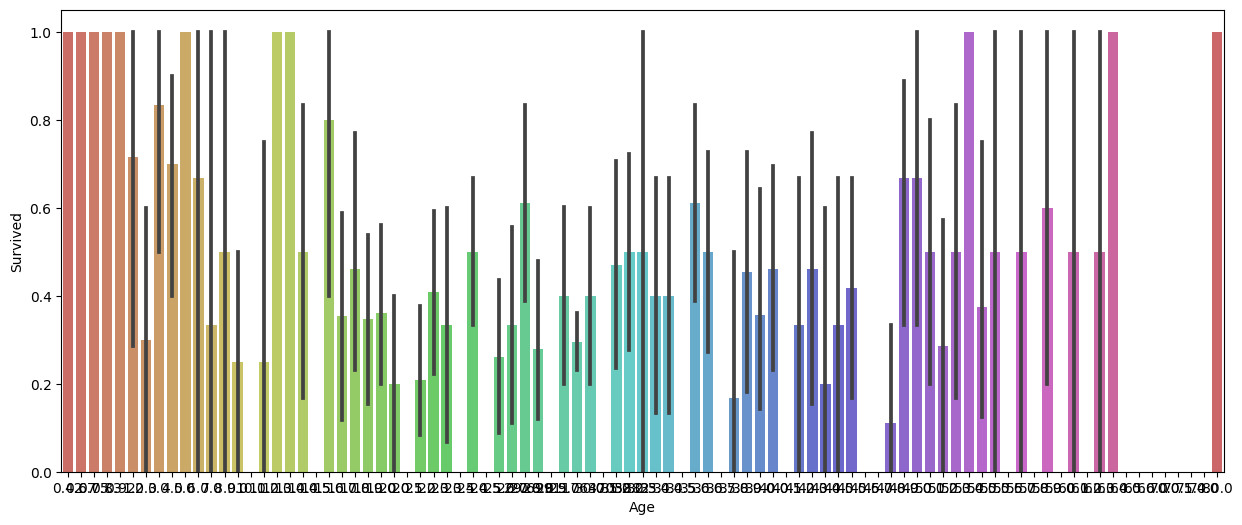

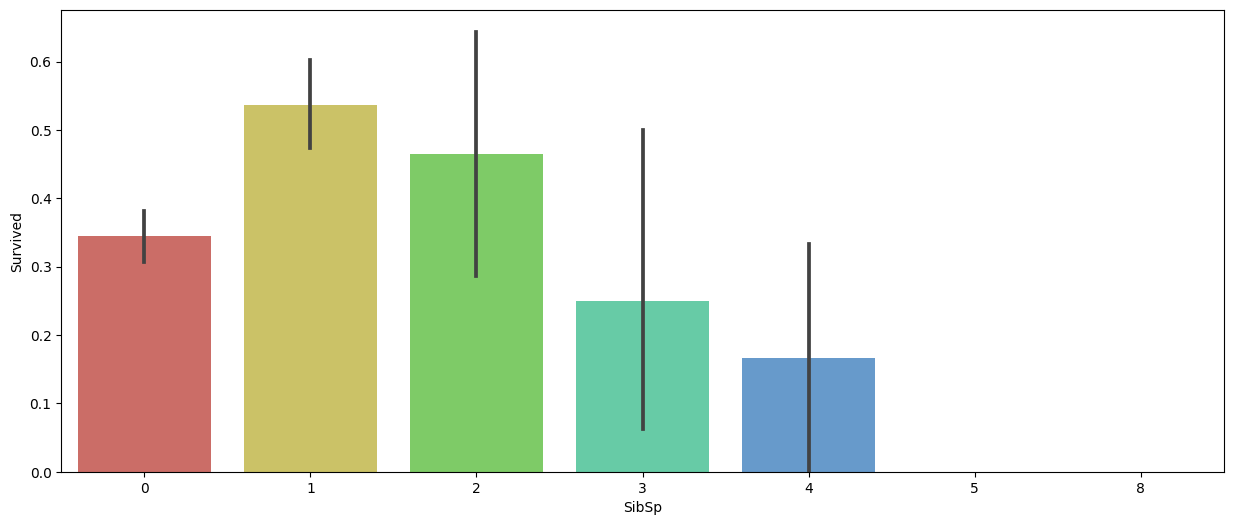

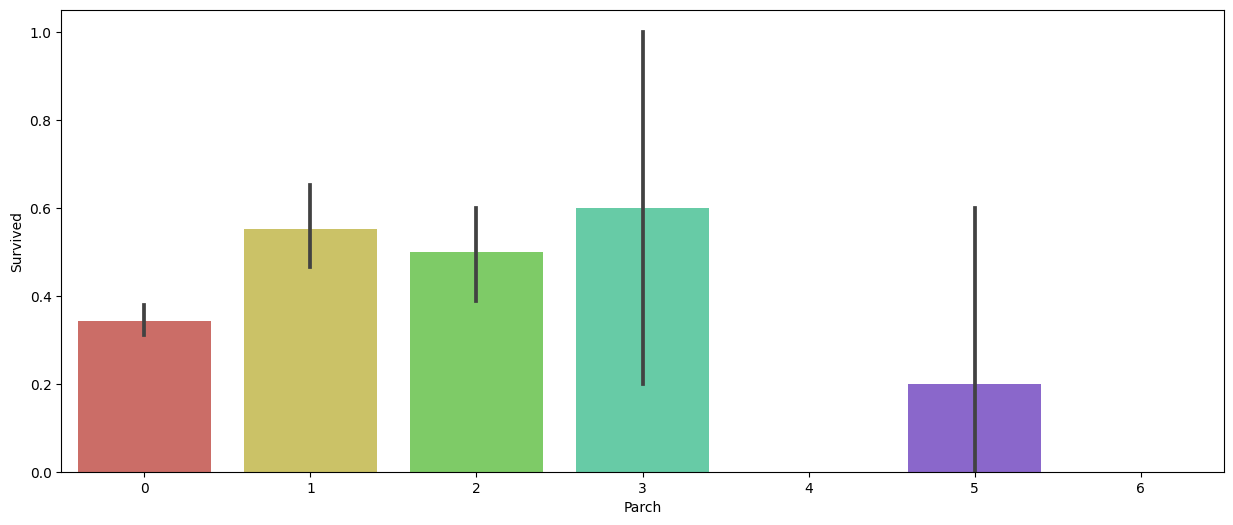

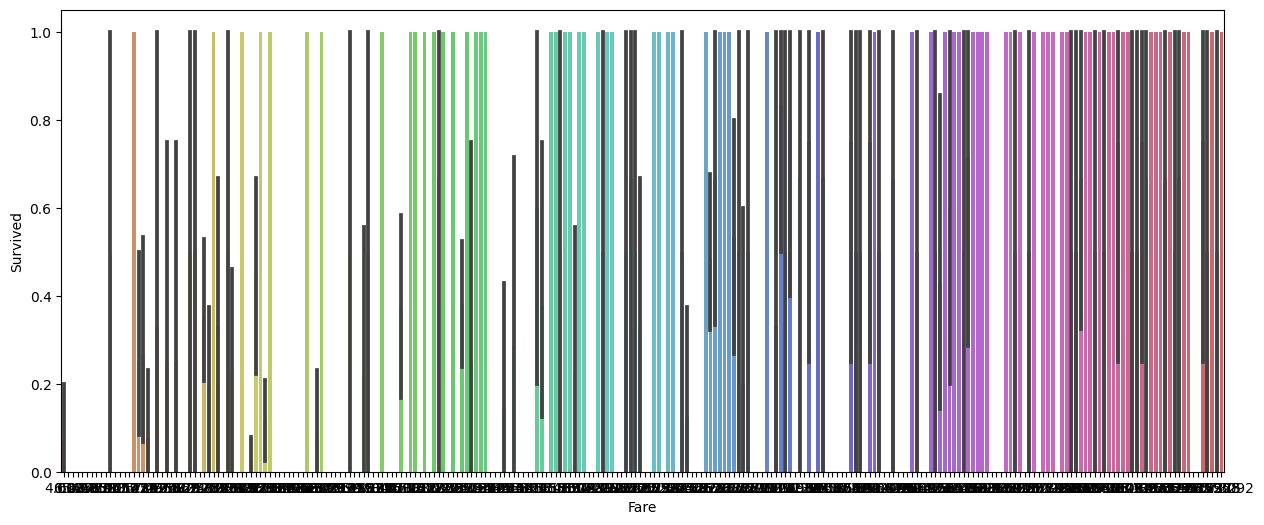

In [ ]:
for i in numerical_columns:
    plt.figure(figsize = (15,6))
    sns.barplot(x = df1[i], y = df1['Survived'], data =df1, palette = 'hls')
    plt.show()

Countplot for: Survived


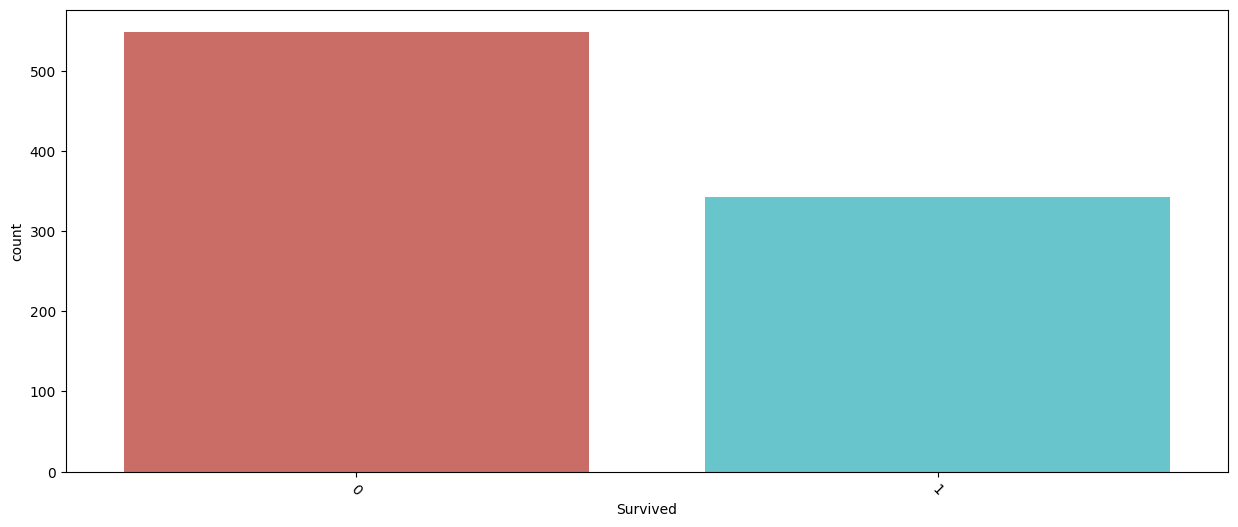

In [ ]:
print('Countplot for: Survived')
plt.figure(figsize=(15, 6))
sns.countplot(x='Survived', data=df, palette='hls')
plt.xticks(rotation=-45)
plt.show()


Countplot for: Pclass


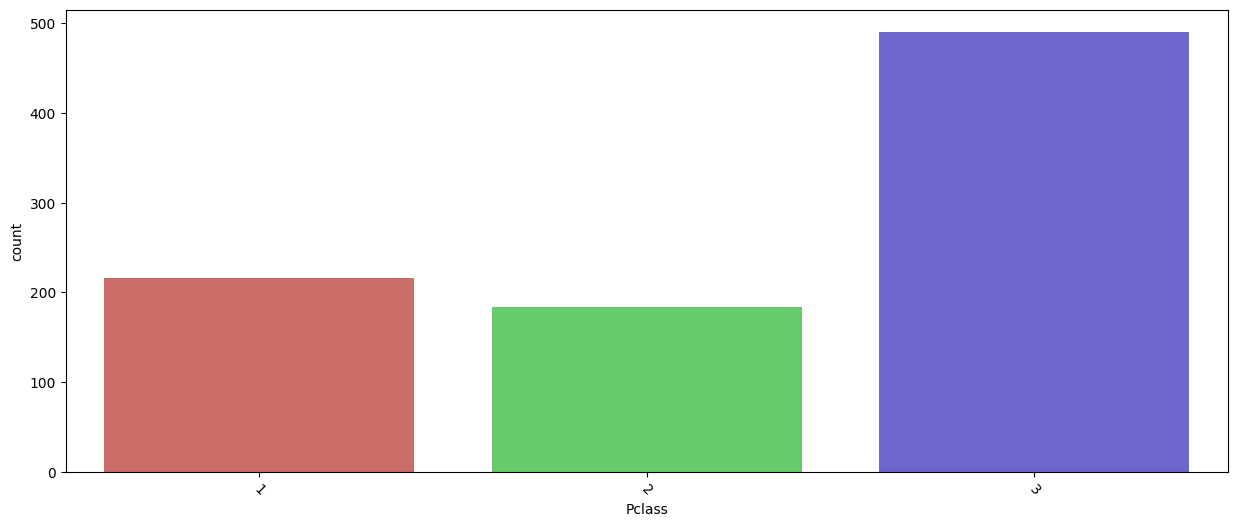

In [ ]:
print('Countplot for: Pclass')
plt.figure(figsize=(15, 6))
sns.countplot(x='Pclass', data=df, palette='hls')
plt.xticks(rotation=-45)
plt.show()

In [ ]:
numerical_columns

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

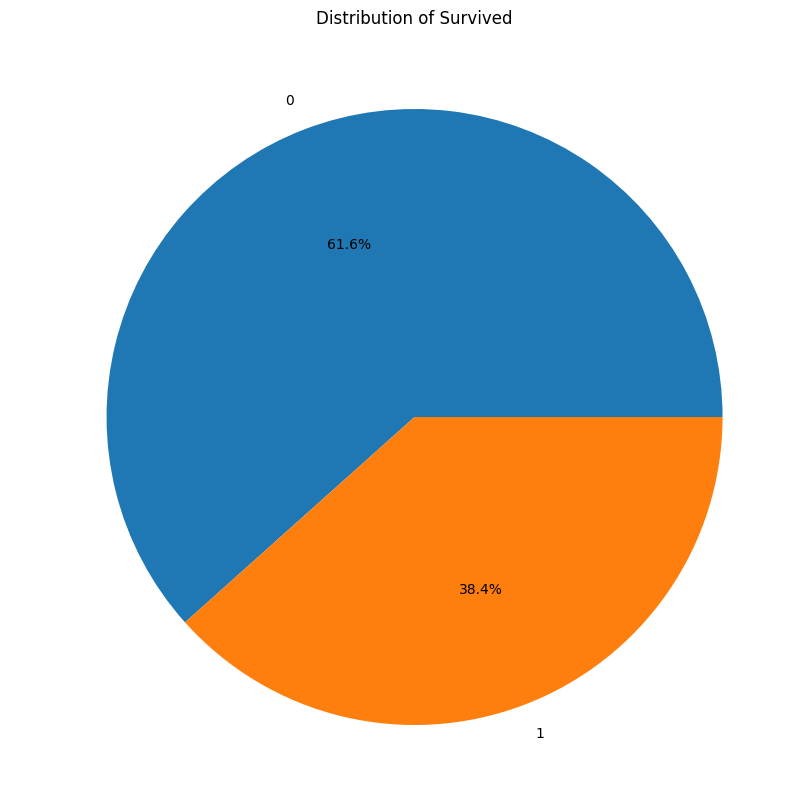

In [ ]:
plt.figure(figsize=(20, 10))
df['Survived'].value_counts().plot(kind = 'pie', autopct = "%1.1f%%" )
plt.title('Distribution of Survived')
plt.ylabel(' ')
plt.show()

PIVOT TABLE

In [ ]:
pd.pivot_table(df, index ='Survived',values = ['Age','SibSp','Parch','Pclass','Fare'])

Age       Fare     Parch    Pclass     SibSp
Survived                                                    
0         30.415100  22.117887  0.329690  2.531876  0.553734
1         28.549778  48.395408  0.464912  1.950292  0.473684

In [ ]:
df_new = df.copy()

In [ ]:
df_new.groupby('Sex')['Age'].mean()

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

In [ ]:
df_new.groupby('Pclass')['Age'].mean()

Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64

In [ ]:
df_new.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [ ]:
df

Survived  Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.000000      1      0   7.2500        S
1           1       1  female  38.000000      1      0  71.2833        C
2           1       3  female  26.000000      0      0   7.9250        S
3           1       1  female  35.000000      1      0  53.1000        S
4           0       3    male  35.000000      0      0   8.0500        S
..        ...     ...     ...        ...    ...    ...      ...      ...
886         0       2    male  27.000000      0      0  13.0000        S
887         1       1  female  19.000000      0      0  30.0000        S
888         0       3  female  29.699118      1      2  23.4500        S
889         1       1    male  26.000000      0      0  30.0000        C
890         0       3    male  32.000000      0      0   7.7500        Q

[891 rows x 8 columns]

In [ ]:
df = pd.get_dummies(df, columns = object_columns, drop_first = True)


In [ ]:
corr1 = df.corr()
print(corr1)

            Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.338481 -0.069809 -0.035322  0.081629  0.257307   
Pclass     -0.338481  1.000000 -0.331339  0.083081  0.018443 -0.549500   
Age        -0.069809 -0.331339  1.000000 -0.232625 -0.179191  0.091566   
SibSp      -0.035322  0.083081 -0.232625  1.000000  0.414838  0.159651   
Parch       0.081629  0.018443 -0.179191  0.414838  1.000000  0.216225   
Fare        0.257307 -0.549500  0.091566  0.159651  0.216225  1.000000   
Sex_male   -0.543351  0.131900  0.084153 -0.114631 -0.245489 -0.182333   
Embarked_Q  0.003650  0.221009 -0.013855 -0.026354 -0.081228 -0.117216   
Embarked_S -0.149683  0.074053 -0.019336  0.068734  0.060814 -0.162184   

            Sex_male  Embarked_Q  Embarked_S  
Survived   -0.543351    0.003650   -0.149683  
Pclass      0.131900    0.221009    0.074053  
Age         0.084153   -0.013855   -0.019336  
SibSp      -0.114631   -0.026354    0.068734  
Parch      -0.245489   -

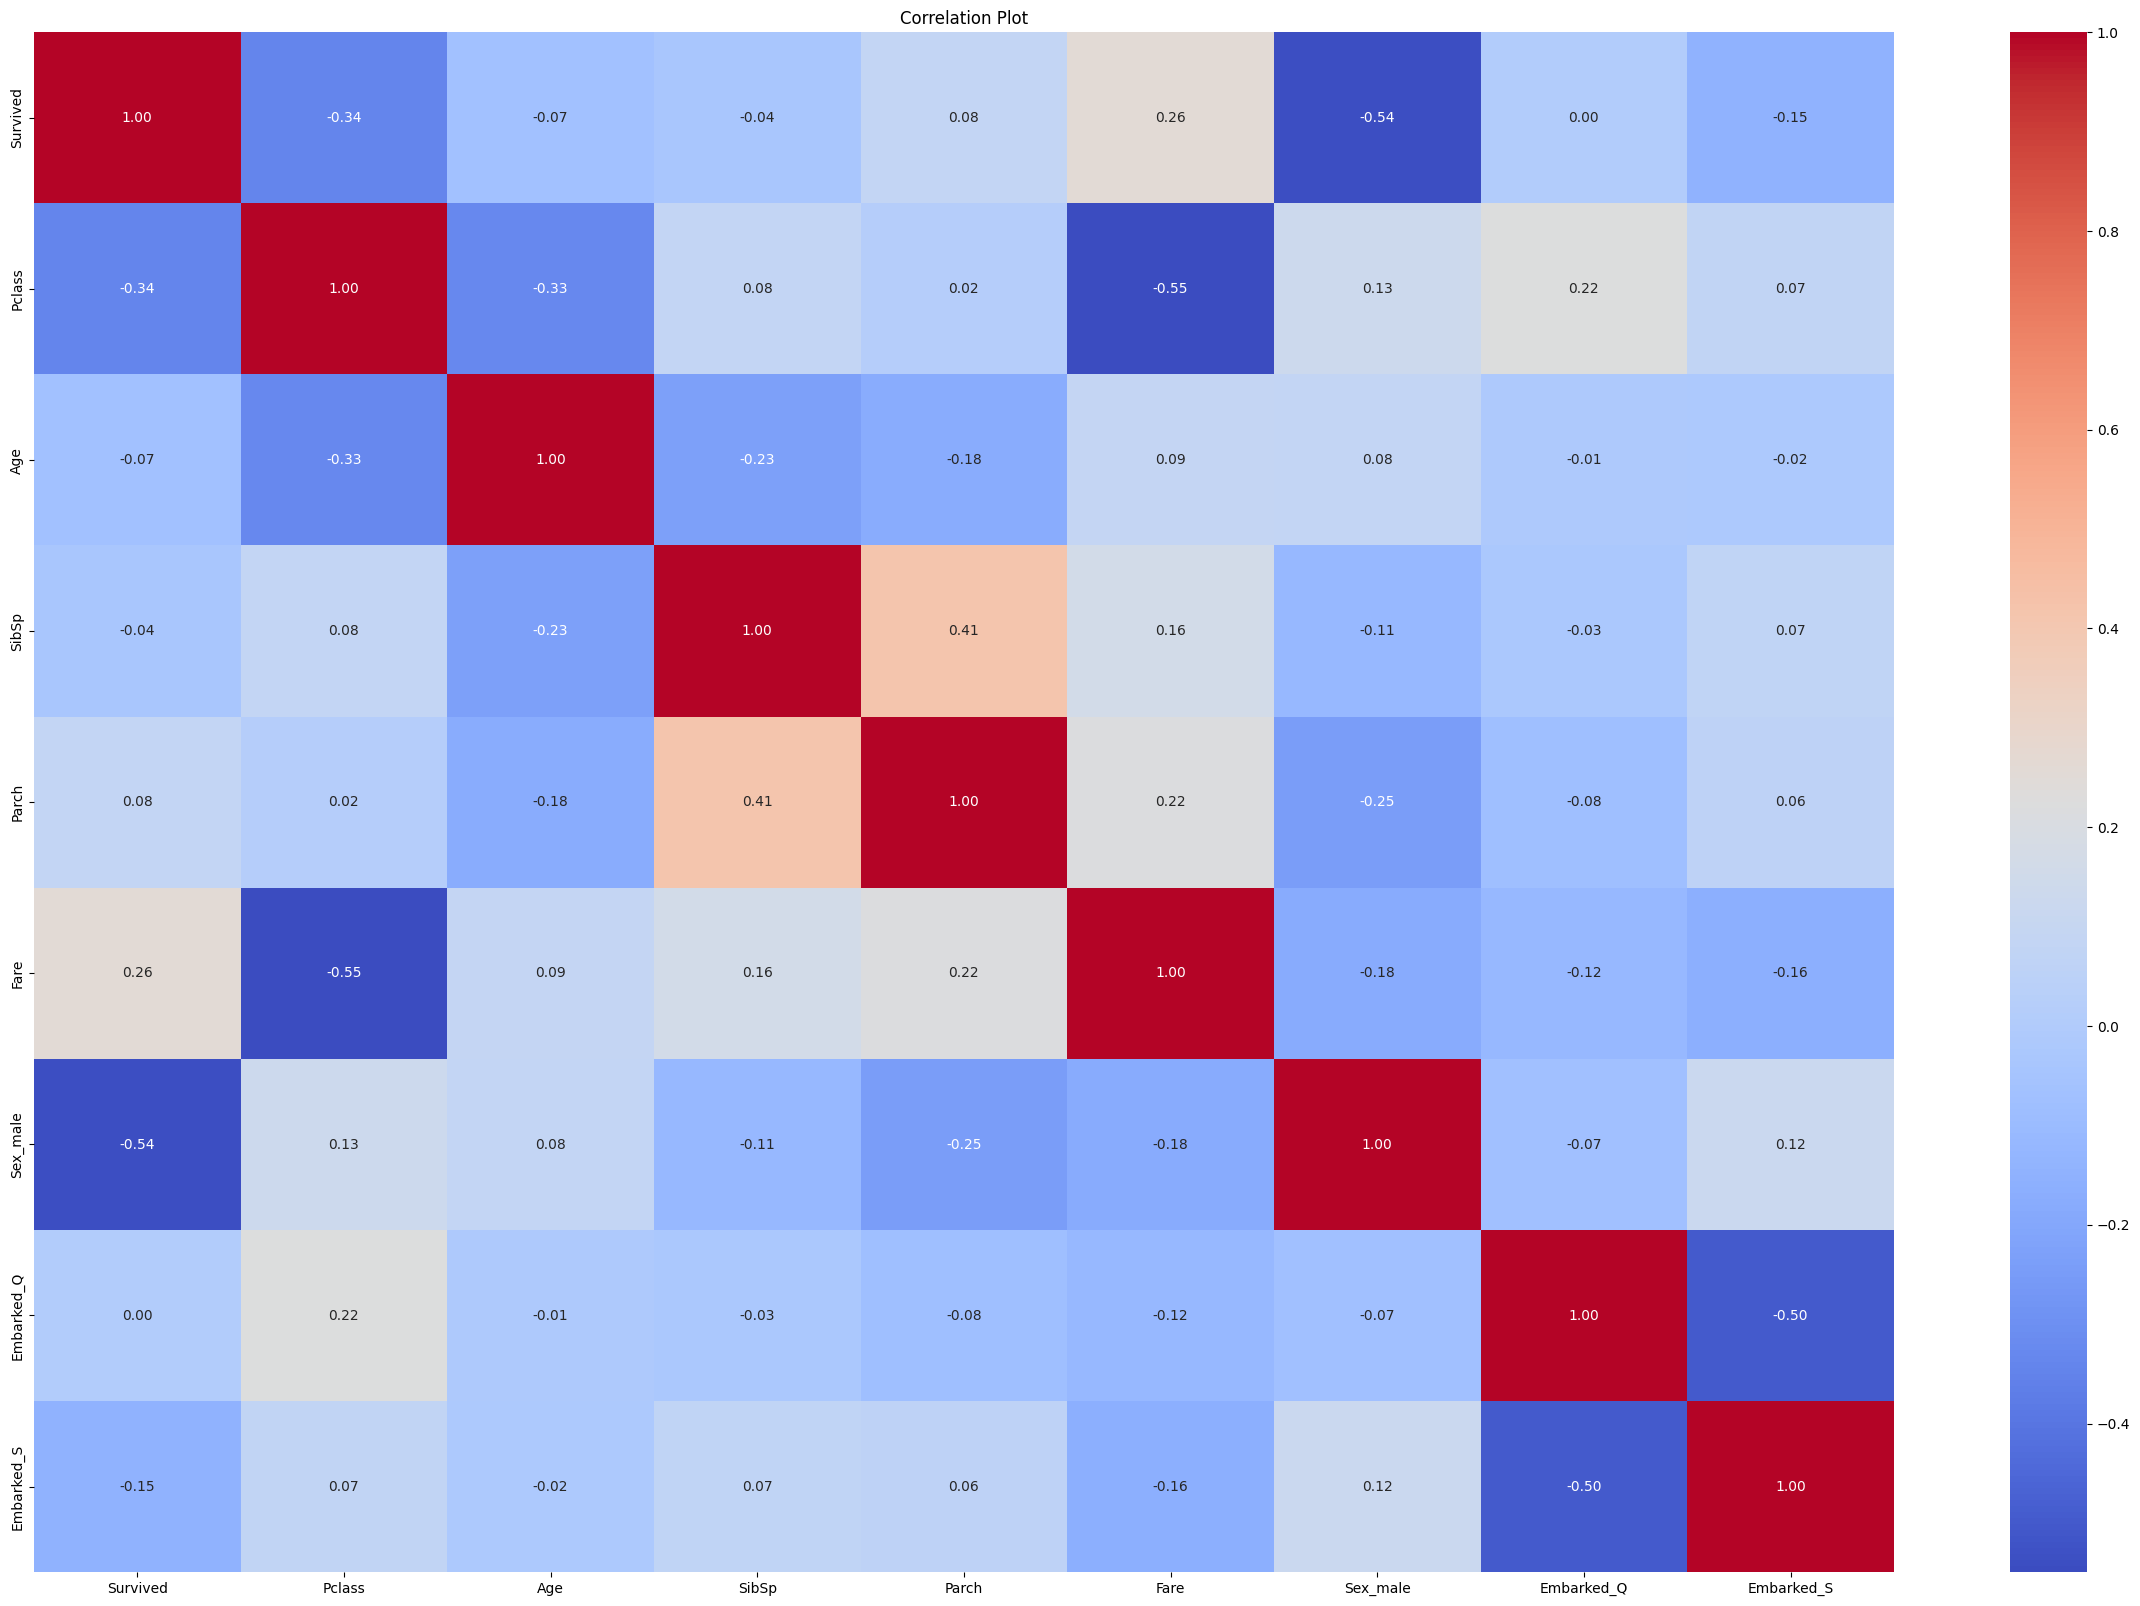

In [ ]:
plt.figure(figsize = (30,20))
sns.heatmap(corr1, annot = True, cmap = 'coolwarm',fmt = ".2f")
plt.title('Correlation Plot')
plt.show()

In [ ]:
columns_to_scale = ['Age','Fare']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



In [ ]:
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [ ]:
df

Survived  Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0           0       3  0.271174      1      0  0.014151         1           0   
1           1       1  0.472229      1      0  0.139136         0           0   
2           1       3  0.321438      0      0  0.015469         0           0   
3           1       1  0.434531      1      0  0.103644         0           0   
4           0       3  0.434531      0      0  0.015713         1           0   
..        ...     ...       ...    ...    ...       ...       ...         ...   
886         0       2  0.334004      0      0  0.025374         1           0   
887         1       1  0.233476      0      0  0.058556         0           0   
888         0       3  0.367921      1      2  0.045771         0           0   
889         1       1  0.321438      0      0  0.058556         1           0   
890         0       3  0.396833      0      0  0.015127         1           1   

     Embarked_S  
0             1  
1             0  
2             1  
3             1  
4             1  
..          ...  
886           1  
887           1  
888           1  
889           0  
890           0  

[891 rows x 9 columns]

STRATIFY

In [ ]:
corr1 = df.corr()
print(corr1)

            Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.338481 -0.069809 -0.035322  0.081629  0.257307   
Pclass     -0.338481  1.000000 -0.331339  0.083081  0.018443 -0.549500   
Age        -0.069809 -0.331339  1.000000 -0.232625 -0.179191  0.091566   
SibSp      -0.035322  0.083081 -0.232625  1.000000  0.414838  0.159651   
Parch       0.081629  0.018443 -0.179191  0.414838  1.000000  0.216225   
Fare        0.257307 -0.549500  0.091566  0.159651  0.216225  1.000000   
Sex_male   -0.543351  0.131900  0.084153 -0.114631 -0.245489 -0.182333   
Embarked_Q  0.003650  0.221009 -0.013855 -0.026354 -0.081228 -0.117216   
Embarked_S -0.149683  0.074053 -0.019336  0.068734  0.060814 -0.162184   

            Sex_male  Embarked_Q  Embarked_S  
Survived   -0.543351    0.003650   -0.149683  
Pclass      0.131900    0.221009    0.074053  
Age         0.084153   -0.013855   -0.019336  
SibSp      -0.114631   -0.026354    0.068734  
Parch      -0.245489   -

In [ ]:
correlation_threshold = 0.5

In [ ]:
good_features = corr1[corr1['Survived'].abs()>correlation_threshold]['Survived'].index.tolist()

In [ ]:
good_features.append('Survived')

In [ ]:
good_features

['Survived', 'Sex_male', 'Survived']

In [ ]:
df3 = pd.DataFrame(df[good_features])

In [ ]:
df3

Survived  Sex_male  Survived
0           0         1         0
1           1         0         1
2           1         0         1
3           1         0         1
4           0         1         0
..        ...       ...       ...
886         0         1         0
887         1         0         1
888         0         0         0
889         1         1         1
890         0         1         0

[891 rows x 3 columns]

In [ ]:
x = df3.drop(['Survived'], axis = 1)
y = df['Survived']

In [ ]:
print(x)
print(y)

     Sex_male
0           1
1           0
2           0
3           0
4           1
..        ...
886         1
887         0
888         0
889         1
890         1

[891 rows x 1 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1,random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)







In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8111111111111111


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
accuracy1 = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy1)

Accuracy: 0.8111111111111111


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:
f1 = f1_score(y_test, y_pred_rf)

In [ ]:
f1

0.7671232876712328

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

[[45  9]
 [ 8 28]]


In [ ]:
ps = precision_score(y_test, y_pred_rf)
print(ps)

0.7567567567567568


In [ ]:
rs = recall_score(y_test, y_pred_rf)
print(rs)

0.7777777777777778


In [ ]:
cr = classification_report(y_test, y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        54
           1       0.76      0.78      0.77        36

    accuracy                           0.81        90
   macro avg       0.80      0.81      0.80        90
weighted avg       0.81      0.81      0.81        90

